# NBaIoT SOM HYPEROPT CLASSIFY

## Device 9

- Training on device 9 (using both Mirai and Gafgyt).
- Testing on device 9 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

# from hyperopt import fmin, tpe, hp, STATUS_OK, rand, atpe, mix, anneal

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

/home/ladin/projects/research/iot-anomaly-detection


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_test_partial, process_train_partial, som_test, load_data_test, process_train_som_hyperopt

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/iot-anomaly-detection/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 9

In [8]:
train_index

9

## Set params (percentage, num_features)

In [9]:
# train_size = 0.5
# test_size = 0.5
# num_features = 29

# 1. Load data and preprocess data

In [10]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [11]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((19528, 115), (19528,)),
 ((316438, 115), (316438,)),
 ((514860, 115), (514860,)))

## Split data

In [12]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [13]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((13669, 115), (5859, 115), (13669,), (5859,))

In [14]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((221506, 115), (94932, 115), (221506,), (94932,))

In [15]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((360402, 115), (154458, 115), (360402,), (154458,))

## Set ratio

In [16]:
benign_size = 10000 # data_benign_train.shape[0], build va train voi 10K
print(benign_size)

10000


In [17]:
ratio_1 = int(1.0*benign_size)

In [18]:
# get train data
data_benign_train, _, target_benign_train, _ = train_test_split(data_benign_train, target_benign_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [19]:
data_benign_train.shape, target_benign_train.shape

((10000, 115), (10000,))

## Get train data of benign and gafgyt by ratio

In [20]:
# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [21]:
print(data_gafgyt_1.shape, target_gafgyt_1.shape)

(10000, 115) (10000,)


In [22]:
# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

In [23]:
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)

(20000, 115) (20000,)


## Get train data of benign and Mirai by ratio

In [24]:
# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [25]:
print(data_mirai_1.shape, target_mirai_1.shape)

(10000, 115) (10000,)


In [26]:
# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

In [27]:
print(X_train_mirai_1.shape, y_train_mirai_1.shape)

(20000, 115) (20000,)


## Get test data

Lay ra kich thuoc cua benign test.

Lay Mirai & Gafgyt cung bang kich thuoc cua benign test

In [28]:
benign_test_size = data_benign_test.shape[0]

In [29]:
benign_test_size

5859

### Gafgyt

In [30]:
data_gafgyt_test.shape

(94932, 115)

In [31]:
# split first
data_gafgyt_test, _, target_gafgyt_test, _ = train_test_split(data_gafgyt_test, target_gafgyt_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [32]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(11718, 115) (11718,)


In [33]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((5859, 115), (5859, 115), (5859,), (5859,))

## Mirai

In [34]:
# split first
data_mirai_test, _, target_mirai_test, _ = train_test_split(data_mirai_test, target_mirai_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [35]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(11718, 115) (11718,)


In [36]:
# X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [37]:
print(X_test_mirai.shape, y_test_mirai.shape)

(11718, 115) (11718,)



# 4. Normal SOM train and test


## 4.1.4. Ratio 1.0

### 1) Set 15

### Train

In [38]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.76568988e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.37436707e-33  3.14964745e-17]
 [ 3.38296254e-03  8.95522622e-02  6.05680534e-08 ...  2.83924740e-18
   1.89028862e-34  1.82417082e-17]
 [ 3.38296234e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.21864617e-35 -3.52366809e-19]
 ...
 [ 4.89499142e-03  2.02477295e-01  2.88488760e-02 ...  1.32880537e-01
  -4.11300692e-02 -2.50489213e-01]
 [ 6.76236251e-03  4.92537313e-01  2.08801208e-16 ...  7.15314266e-17
  -5.14786110e-21 -2.19819145e-05]
 [ 3.38296260e-03  8.95522695e-02  7.94140500e-08 ...  2.00067898e-18
  -1.15808196e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 3.0303592681884766


### Test on the same device

#### Test on gafgyt

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14335734 0.04019722 0.02133406 ... 1.19240265 1.16504508 1.16504509]
Visualize quantization error


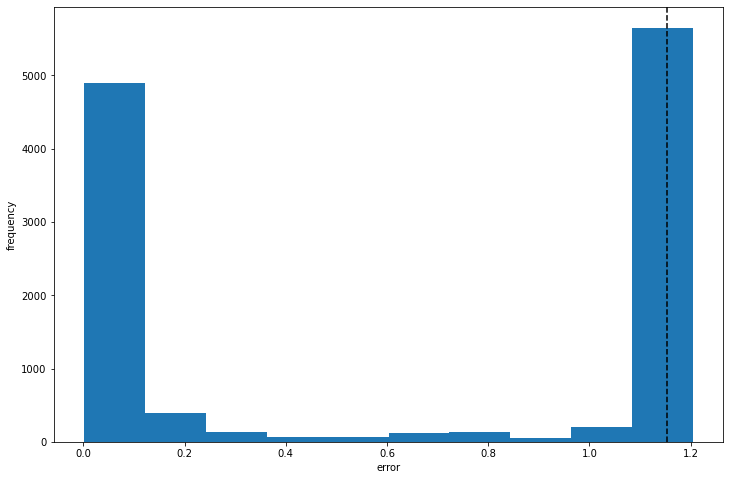

Outliers visualization


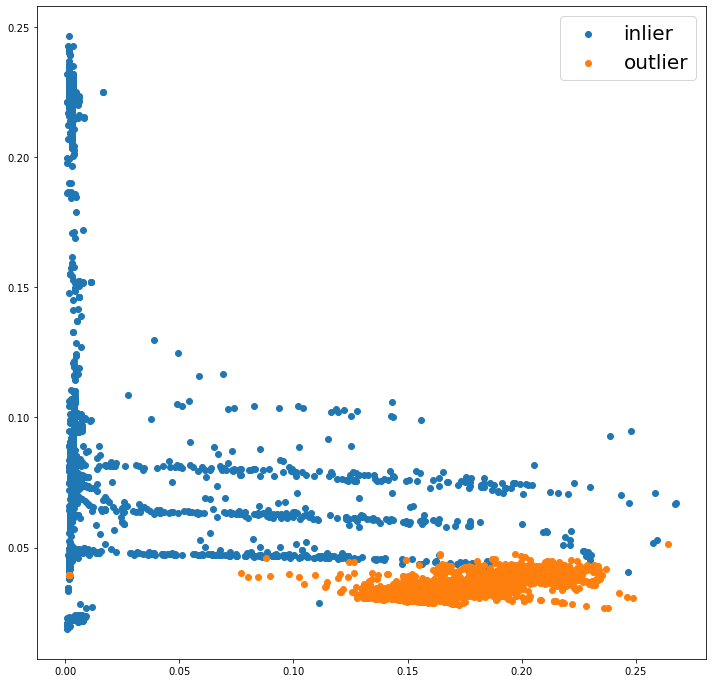

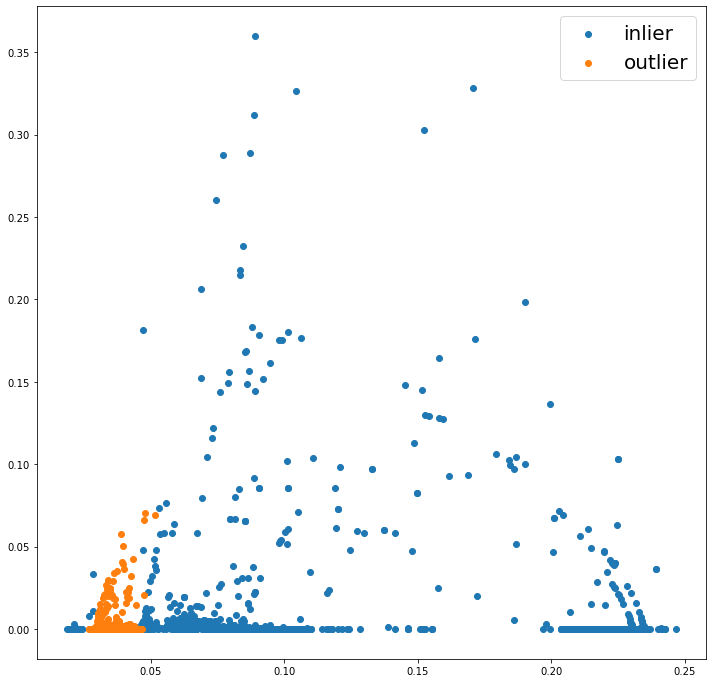

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.996     0.997      5859
           2      0.996     0.999     0.997      5859

    accuracy                          0.997     11718
   macro avg      0.997     0.997     0.997     11718
weighted avg      0.997     0.997     0.997     11718



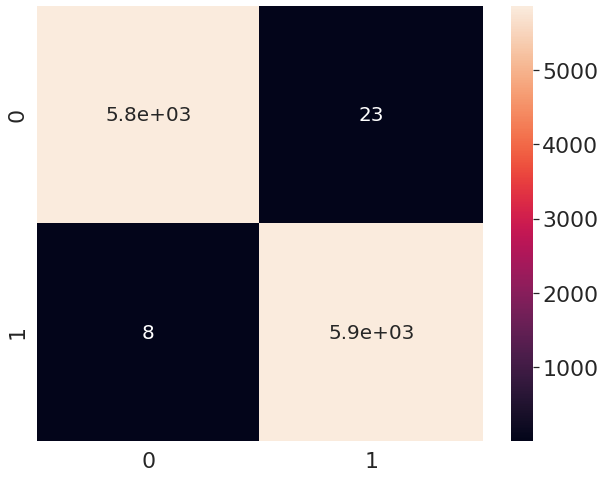

AUC score:  0.9973544973544973


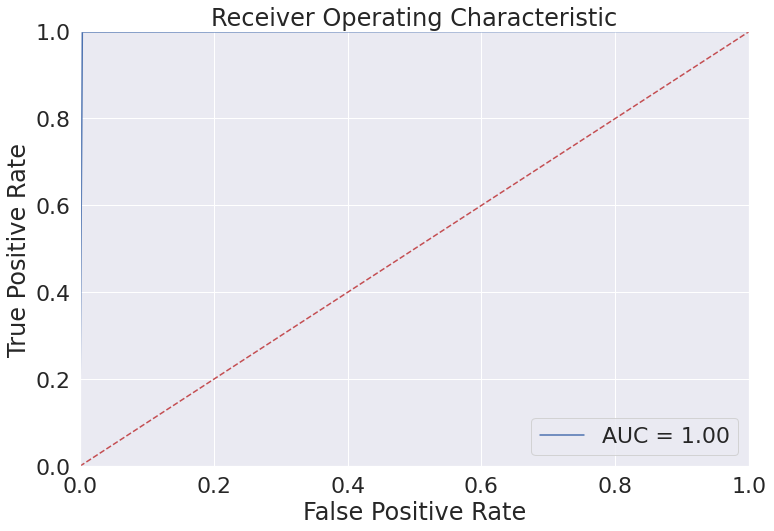

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [39]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14335734 0.04019722 0.02133406 ... 1.18319229 0.60560995 1.15690409]
Visualize quantization error


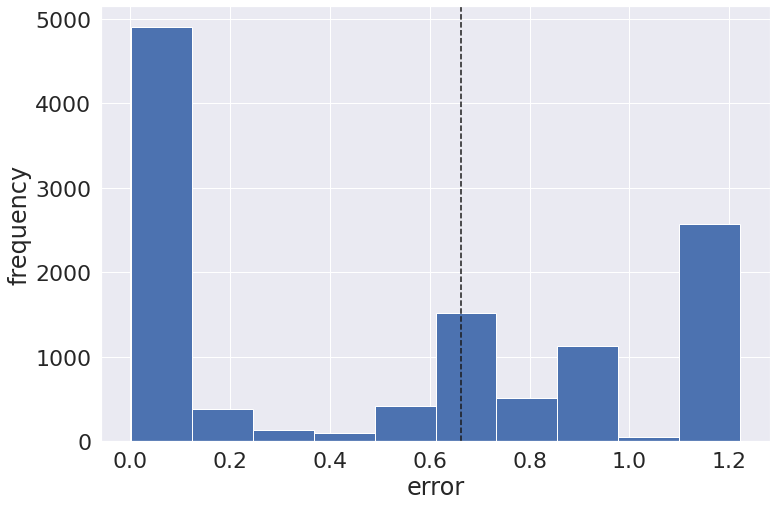

Outliers visualization


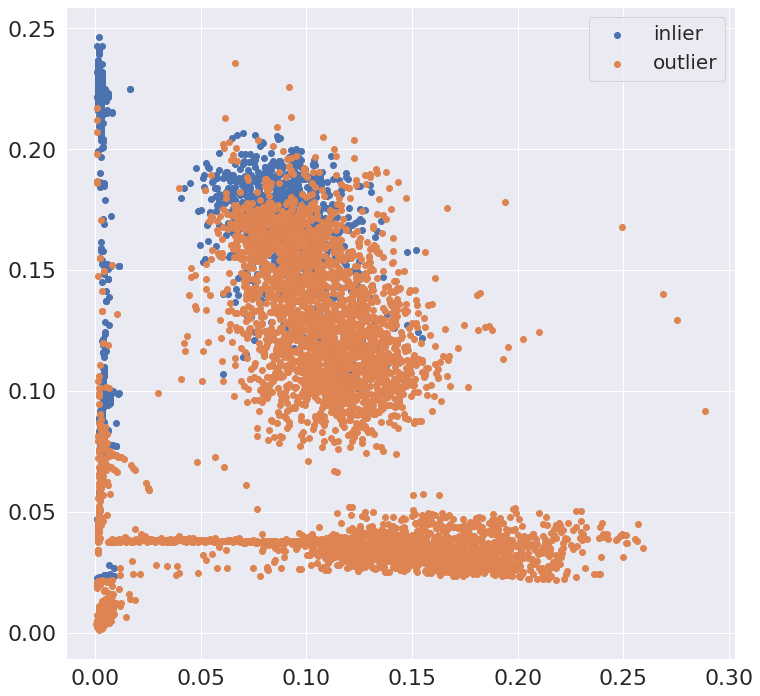

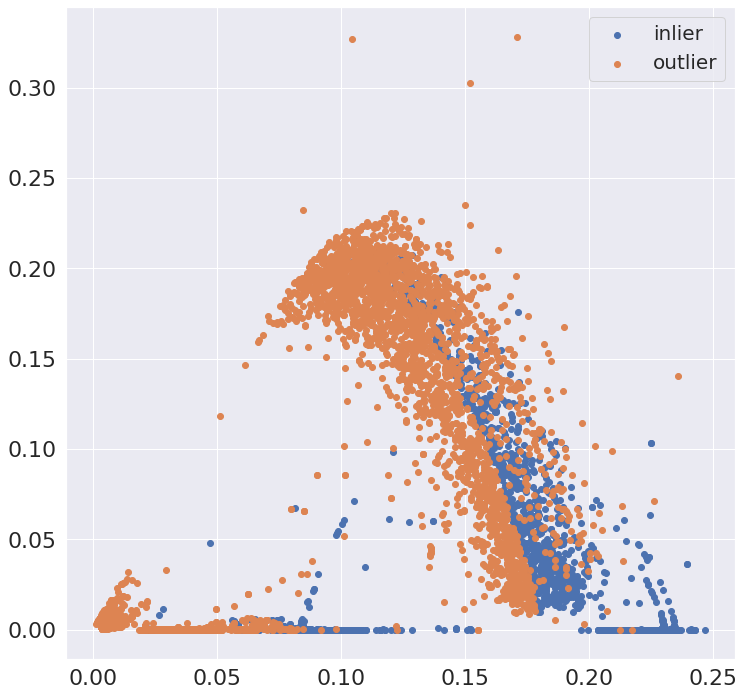

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.595     0.996     0.745      5859
           2      0.988     0.321     0.485      5859

    accuracy                          0.659     11718
   macro avg      0.791     0.659     0.615     11718
weighted avg      0.791     0.659     0.615     11718



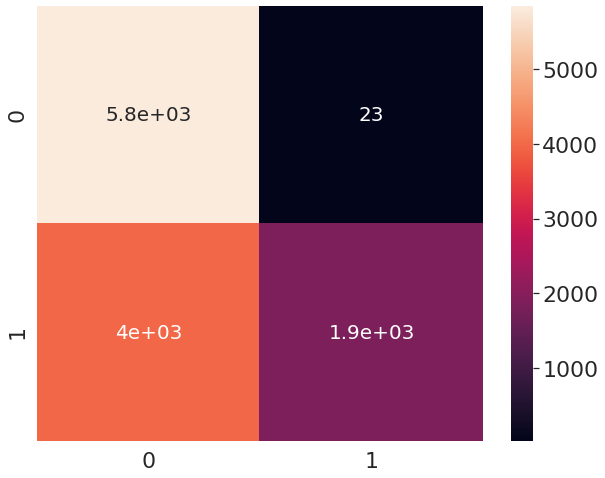

AUC score:  0.6586448199351426


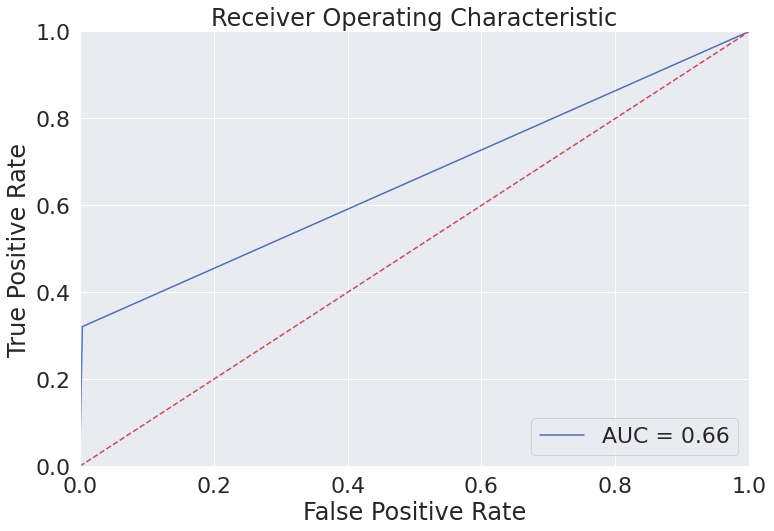

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [40]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [41]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.76568988e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.37436707e-33  3.14964745e-17]
 [ 3.38296254e-03  8.95522622e-02  6.05680534e-08 ...  2.83924740e-18
   1.89028862e-34  1.82417082e-17]
 [ 3.38296234e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.21864617e-35 -3.52366809e-19]
 ...
 [ 4.89499142e-03  2.02477295e-01  2.88488760e-02 ...  1.32880537e-01
  -4.11300692e-02 -2.50489213e-01]
 [ 6.76236251e-03  4.92537313e-01  2.08801208e-16 ...  7.15314266e-17
  -5.14786110e-21 -2.19819145e-05]
 [ 3.38296260e-03  8.95522695e-02  7.94140500e-08 ...  2.00067898e-18
  -1.15808196e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 4.856365203857422


### Test on the same device

#### Test on gafgyt

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.15715185 0.01166135 0.02879609 ... 1.18862129 1.13681979 1.1368198 ]
Visualize quantization error


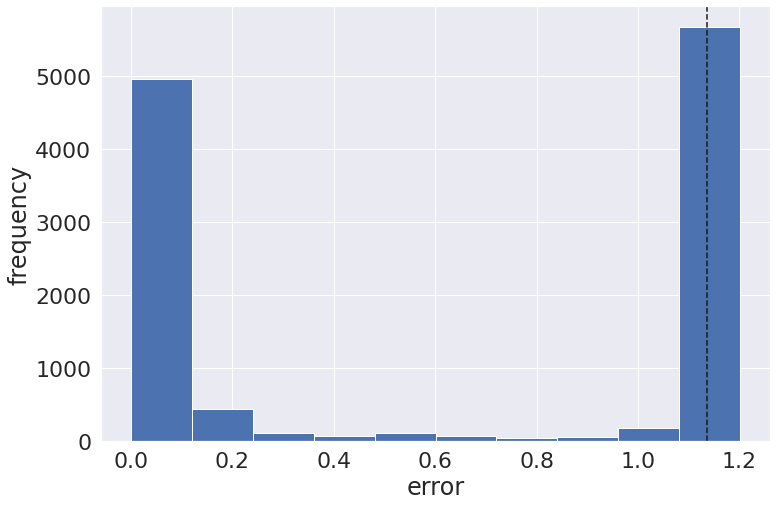

Outliers visualization


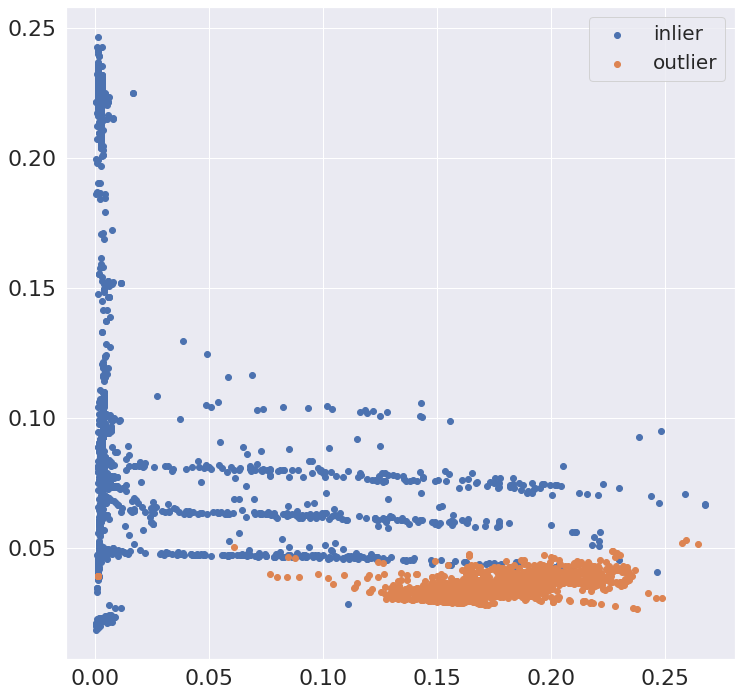

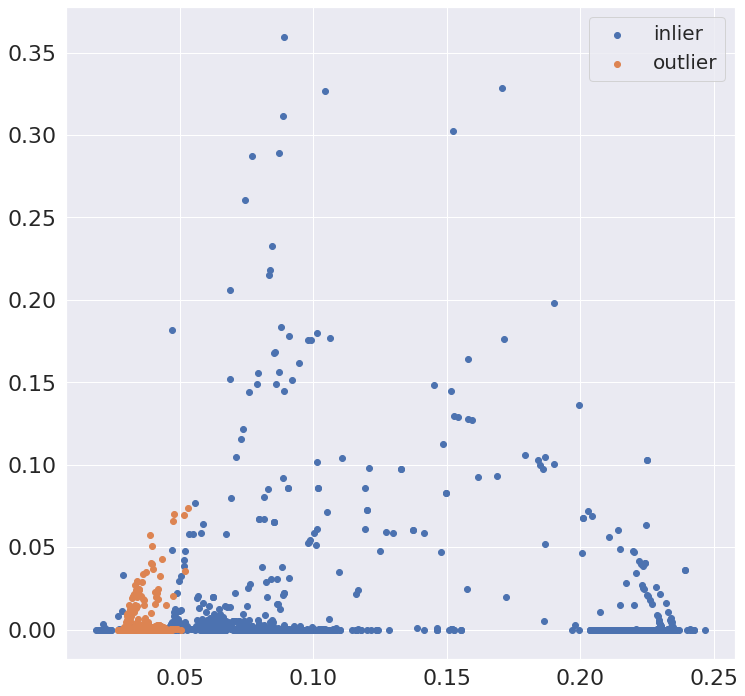

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.994     0.996      5859
           2      0.994     0.999     0.997      5859

    accuracy                          0.997     11718
   macro avg      0.997     0.997     0.997     11718
weighted avg      0.997     0.997     0.997     11718



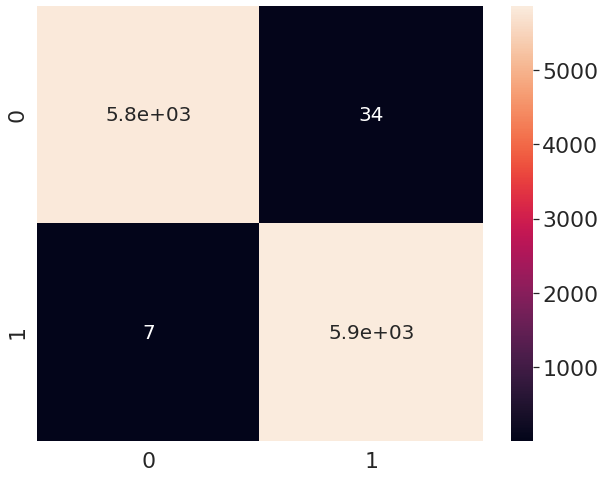

AUC score:  0.9965011094043352


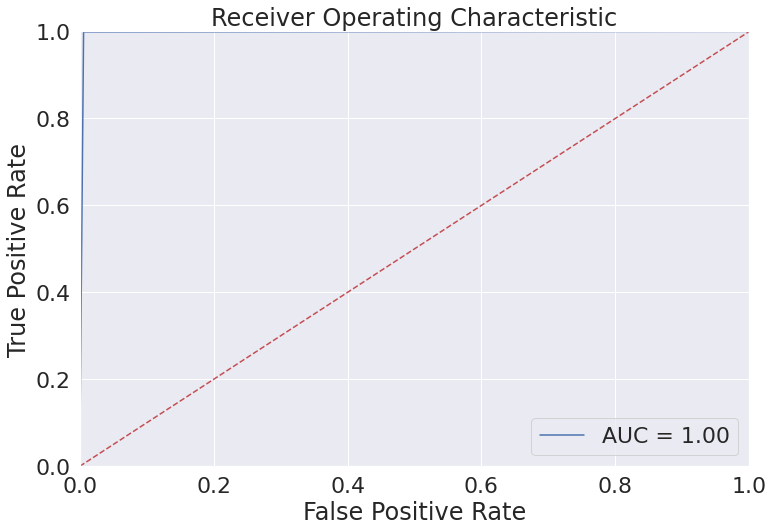

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.15715185 0.01166135 0.02879609 ... 1.17790477 0.63836236 0.9475992 ]
Visualize quantization error


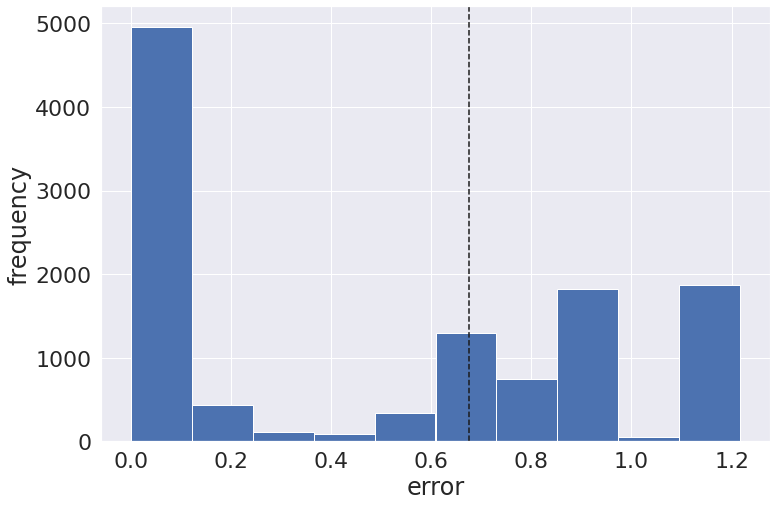

Outliers visualization


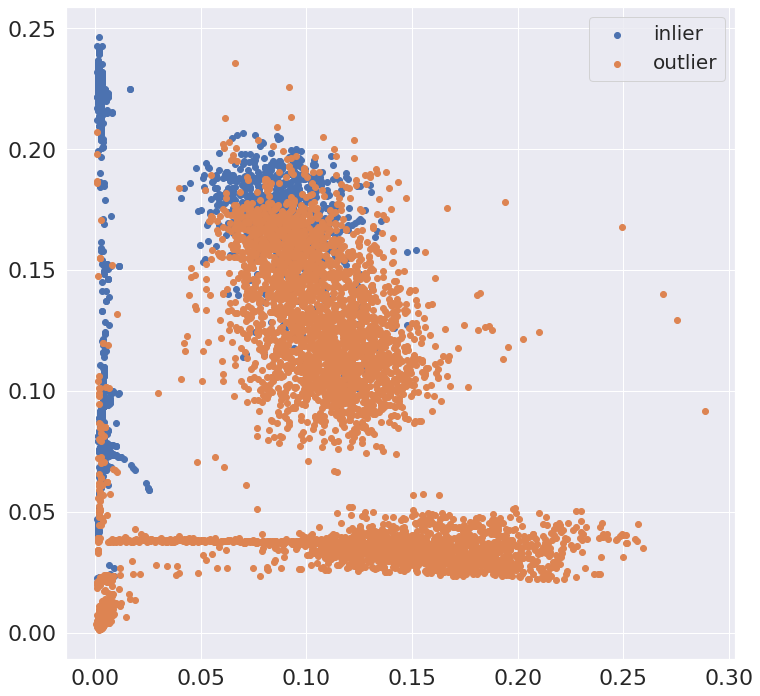

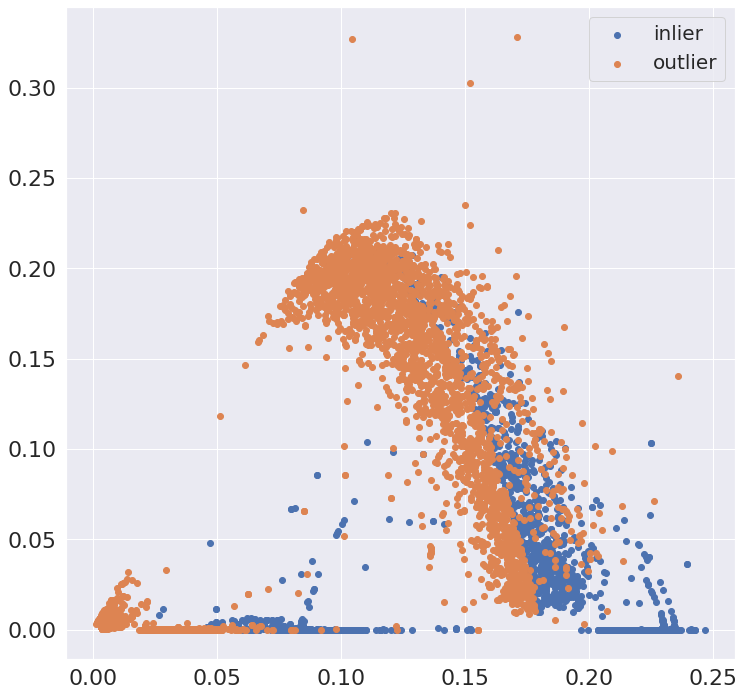

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.595     0.994     0.744      5859
           2      0.982     0.322     0.485      5859

    accuracy                          0.658     11718
   macro avg      0.788     0.658     0.614     11718
weighted avg      0.788     0.658     0.614     11718



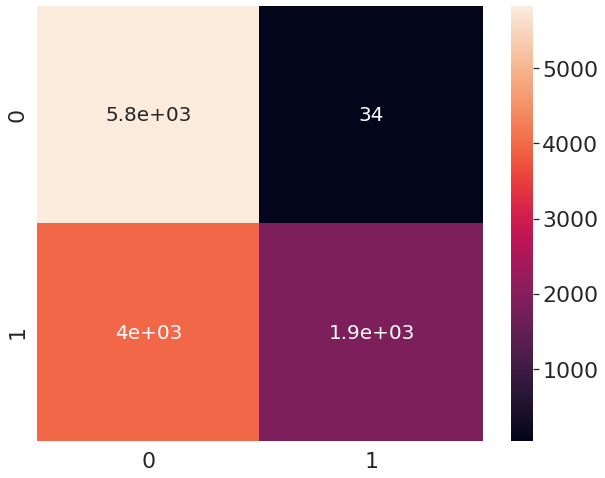

AUC score:  0.658047448370029


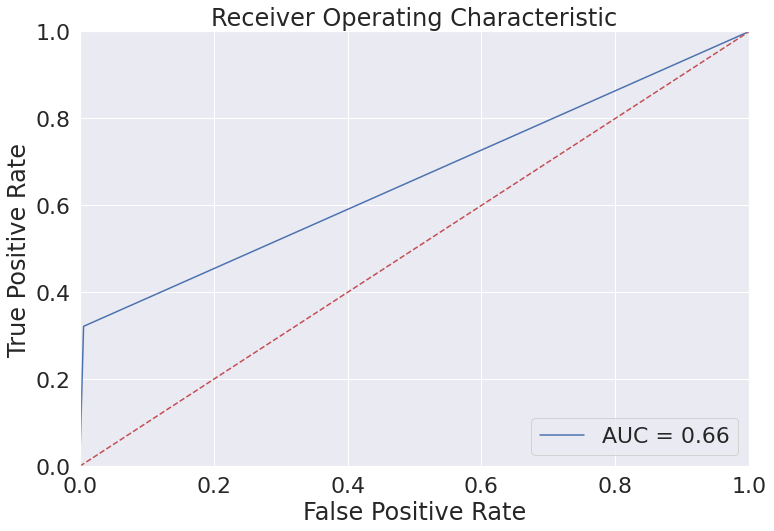

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Set 30

### Train

In [44]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.76568988e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.37436707e-33  3.14964745e-17]
 [ 3.38296254e-03  8.95522622e-02  6.05680534e-08 ...  2.83924740e-18
   1.89028862e-34  1.82417082e-17]
 [ 3.38296234e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.21864617e-35 -3.52366809e-19]
 ...
 [ 4.89499142e-03  2.02477295e-01  2.88488760e-02 ...  1.32880537e-01
  -4.11300692e-02 -2.50489213e-01]
 [ 6.76236251e-03  4.92537313e-01  2.08801208e-16 ...  7.15314266e-17
  -5.14786110e-21 -2.19819145e-05]
 [ 3.38296260e-03  8.95522695e-02  7.94140500e-08 ...  2.00067898e-18
  -1.15808196e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 7.7731921672821045


### Test on the same device

#### Test on gafgyt

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.06867938 0.02967963 0.02254513 ... 1.1359664  0.63570037 0.63570038]
Visualize quantization error


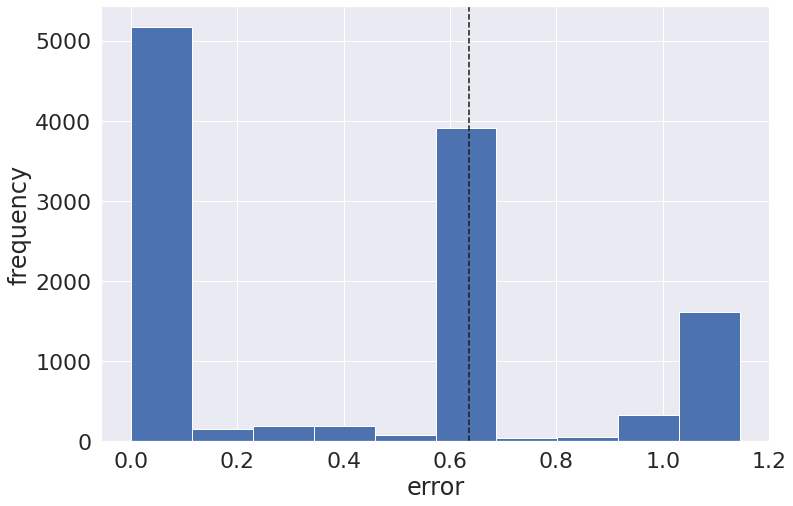

Outliers visualization


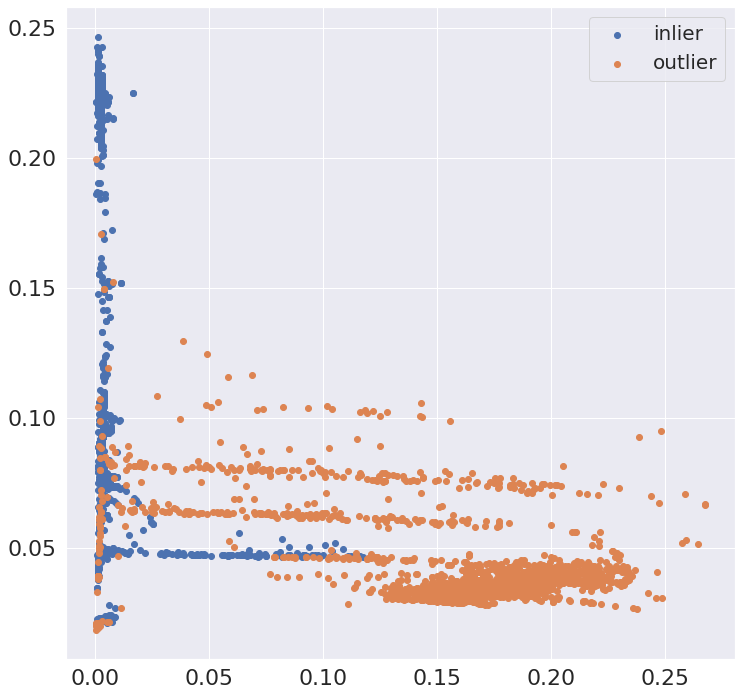

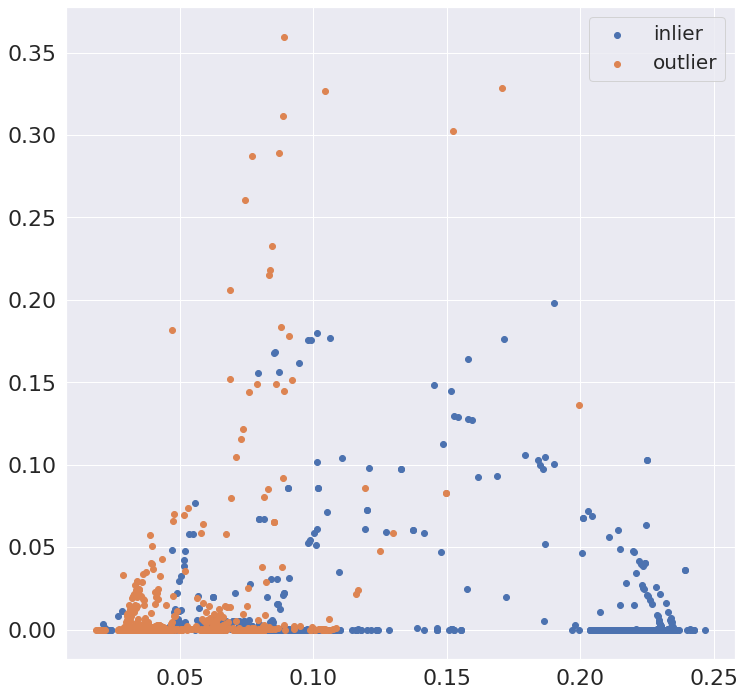

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.998      5859
           2      0.997     0.998     0.998      5859

    accuracy                          0.998     11718
   macro avg      0.998     0.998     0.998     11718
weighted avg      0.998     0.998     0.998     11718



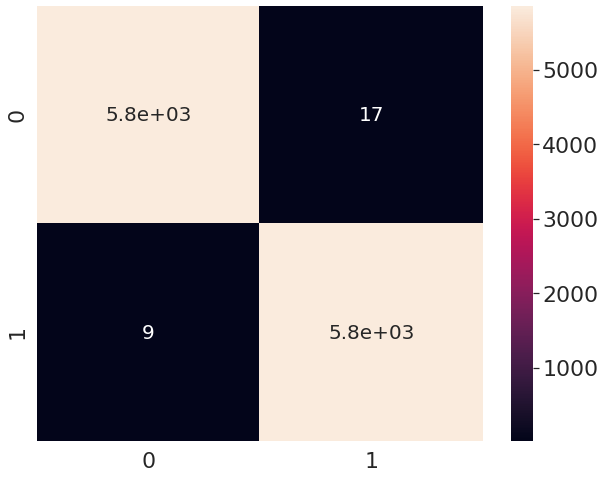

AUC score:  0.9977811913295784


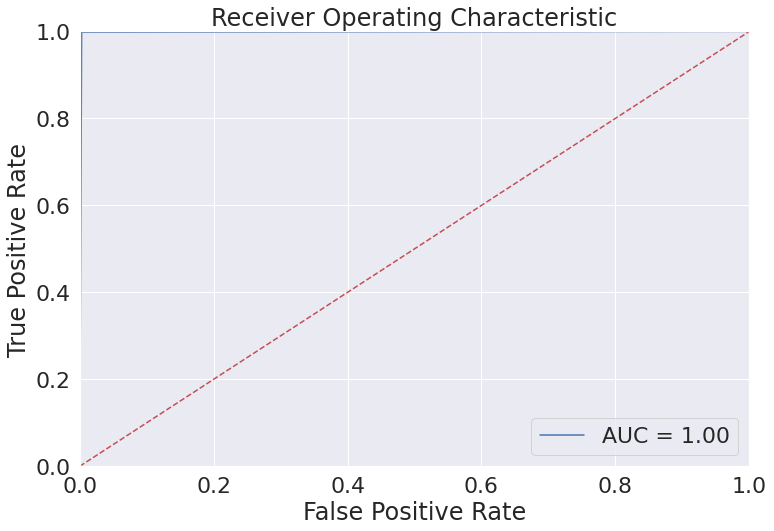

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [45]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.06867938 0.02967963 0.02254513 ... 1.12735246 0.59676232 0.93732891]
Visualize quantization error


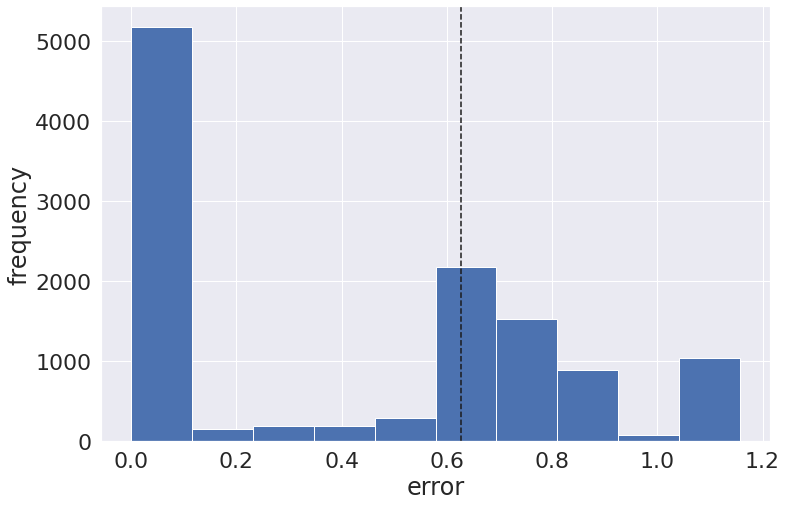

Outliers visualization


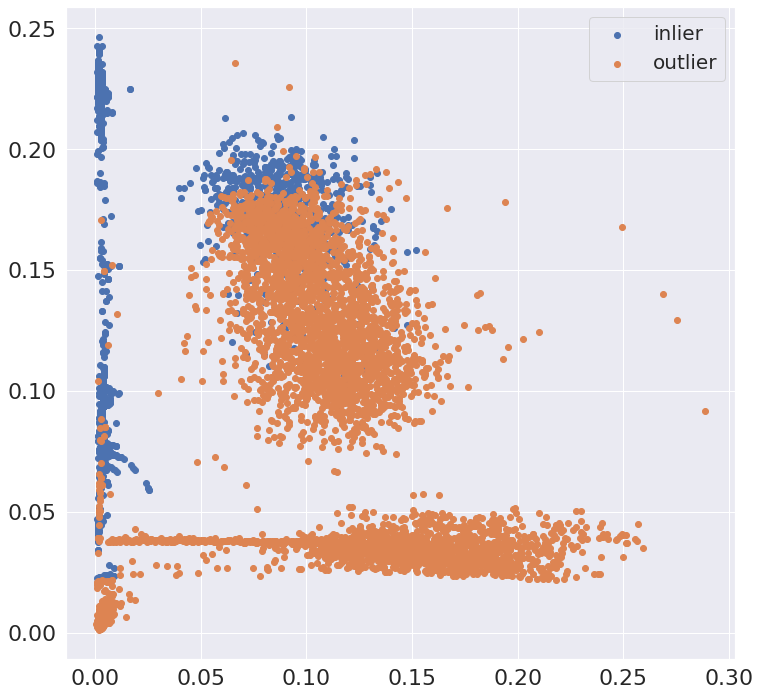

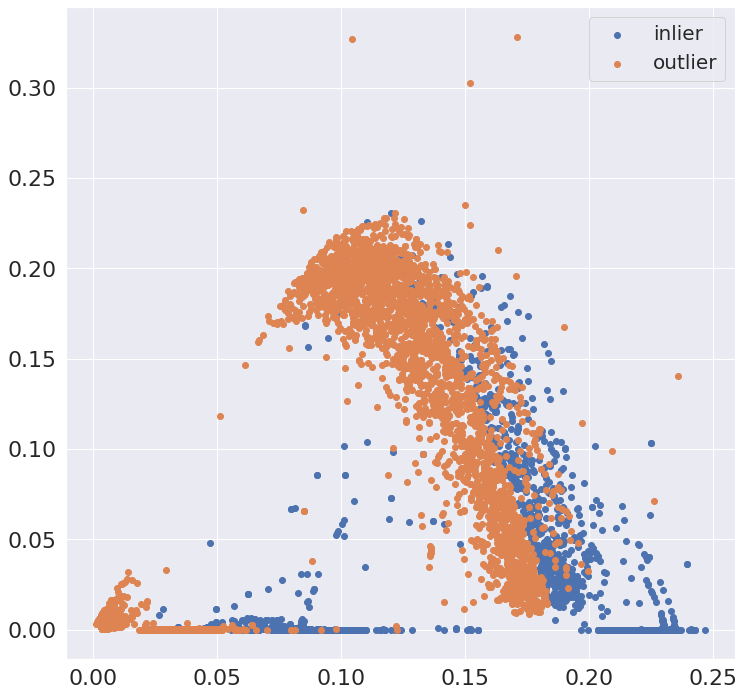

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.686     0.997     0.813      5859
           2      0.995     0.543     0.702      5859

    accuracy                          0.770     11718
   macro avg      0.840     0.770     0.758     11718
weighted avg      0.840     0.770     0.758     11718



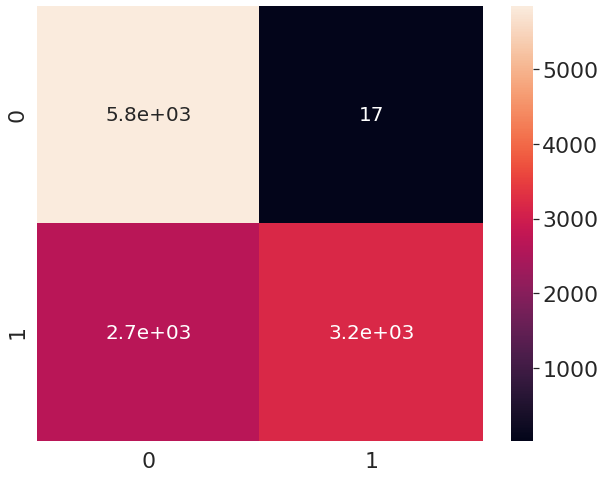

AUC score:  0.7700119474313023


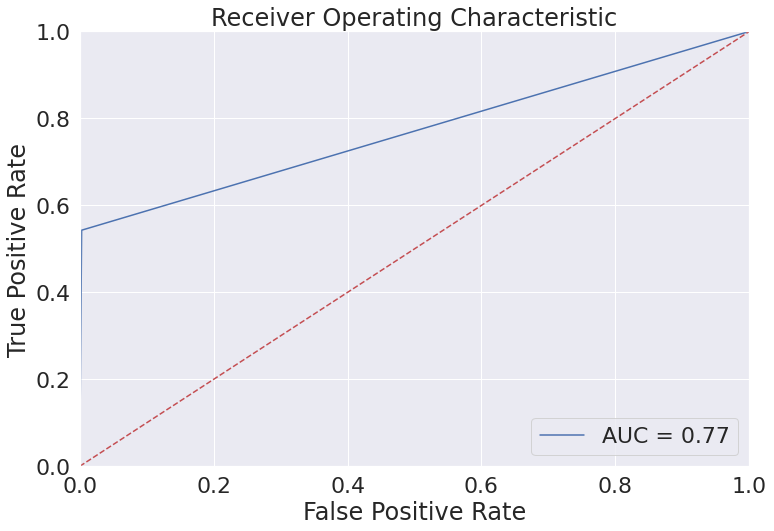

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Set 45

### Train

In [47]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.76568988e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.37436707e-33  3.14964745e-17]
 [ 3.38296254e-03  8.95522622e-02  6.05680534e-08 ...  2.83924740e-18
   1.89028862e-34  1.82417082e-17]
 [ 3.38296234e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.21864617e-35 -3.52366809e-19]
 ...
 [ 4.89499142e-03  2.02477295e-01  2.88488760e-02 ...  1.32880537e-01
  -4.11300692e-02 -2.50489213e-01]
 [ 6.76236251e-03  4.92537313e-01  2.08801208e-16 ...  7.15314266e-17
  -5.14786110e-21 -2.19819145e-05]
 [ 3.38296260e-03  8.95522695e-02  7.94140500e-08 ...  2.00067898e-18
  -1.15808196e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 16.48995351791382


### Test on the same device

#### Test on gafgyt

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.02430575 0.01319566 0.01440775 ... 1.13809872 0.25937287 0.25937288]
Visualize quantization error


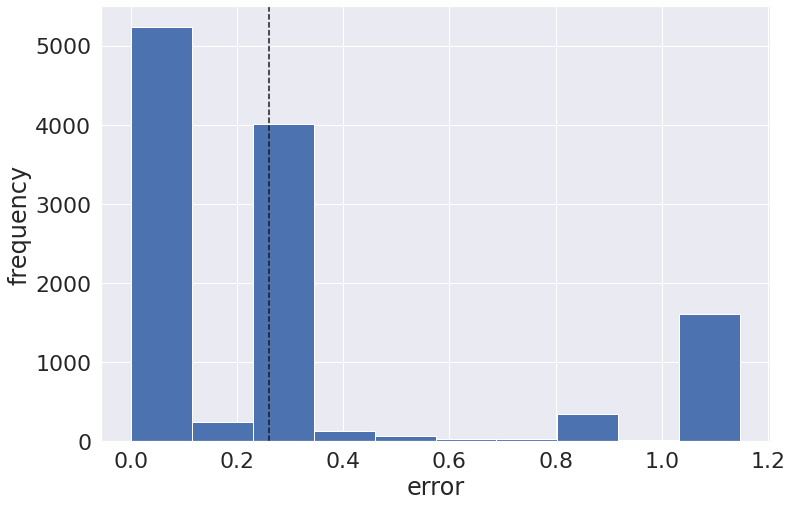

Outliers visualization


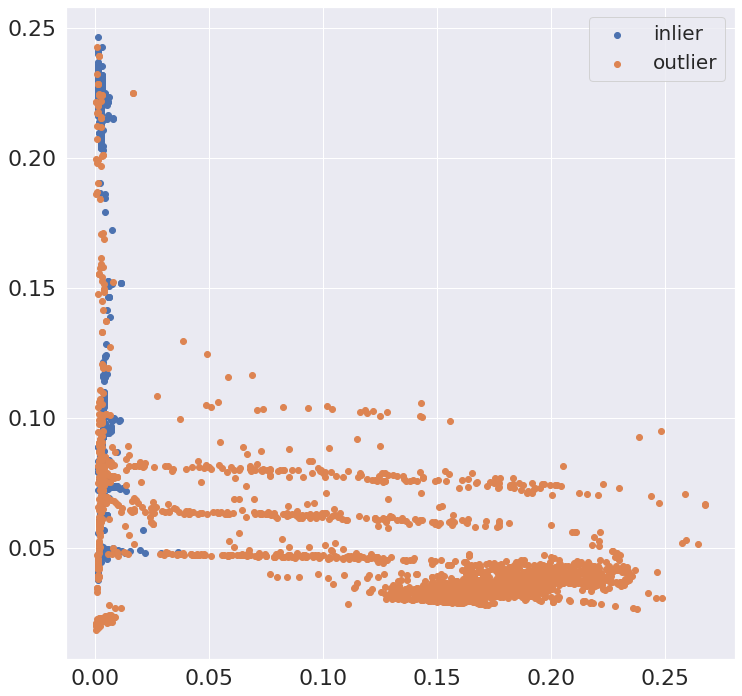

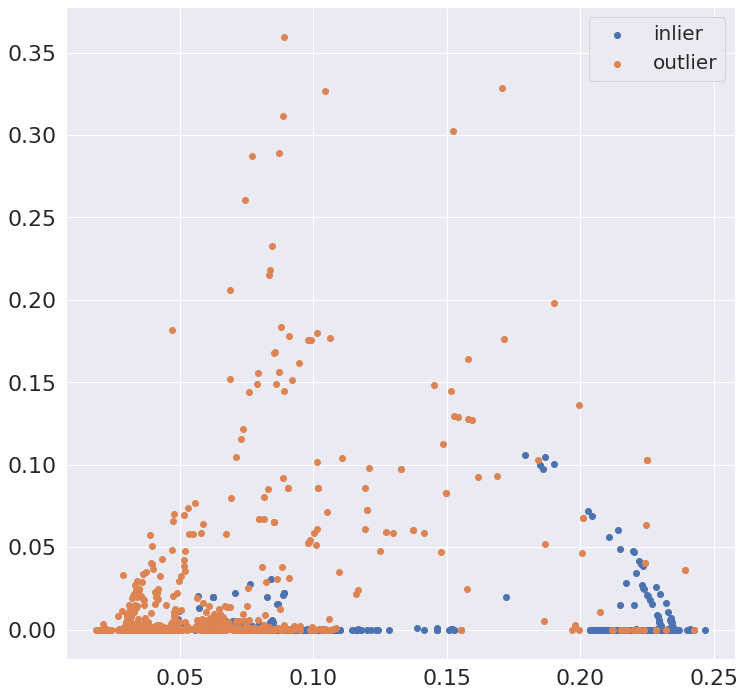

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.995     0.996      5859
           2      0.995     0.998     0.996      5859

    accuracy                          0.996     11718
   macro avg      0.996     0.996     0.996     11718
weighted avg      0.996     0.996     0.996     11718



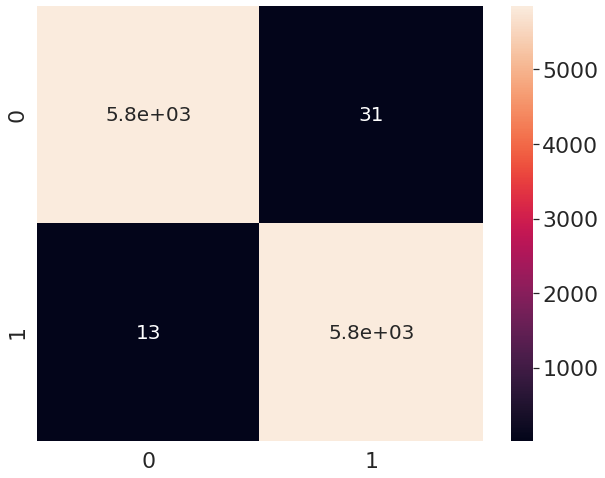

AUC score:  0.9962450930192865


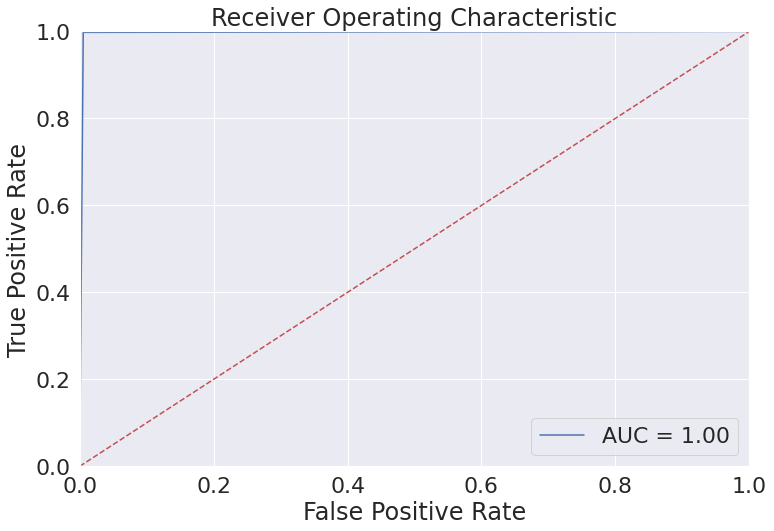

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.02430575 0.01319566 0.01440775 ... 1.12936416 0.64567713 0.92460997]
Visualize quantization error


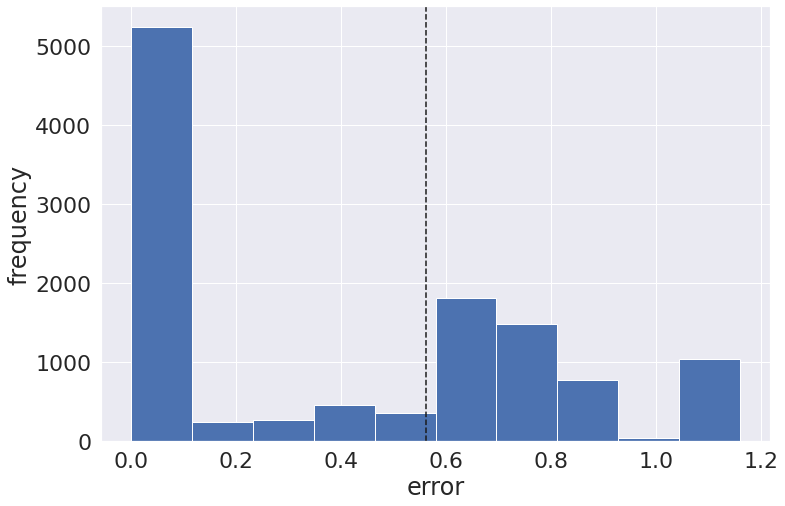

Outliers visualization


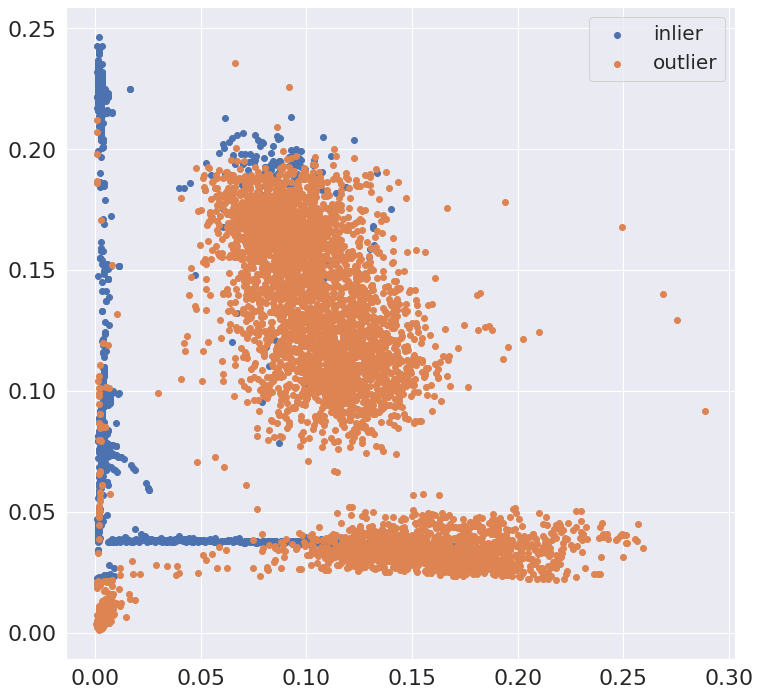

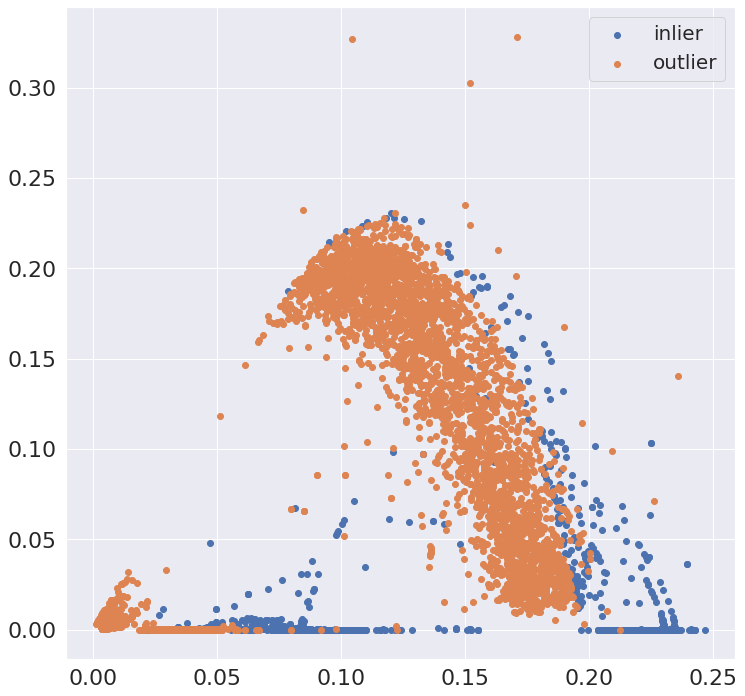

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.581     0.995     0.733      5859
           2      0.982     0.282     0.438      5859

    accuracy                          0.638     11718
   macro avg      0.781     0.638     0.586     11718
weighted avg      0.781     0.638     0.586     11718



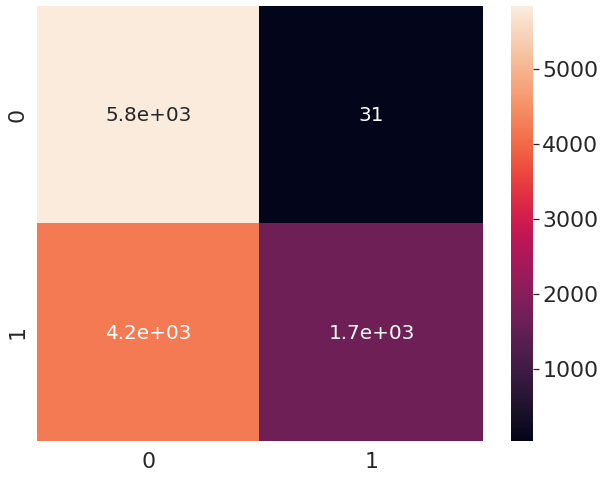

AUC score:  0.6382488479262672


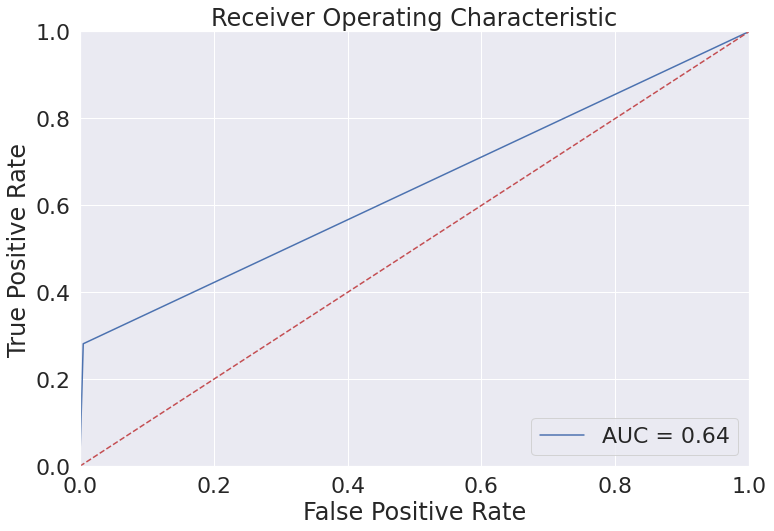

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)


### 1) Algo tpe

### Train

In [50]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.76568988e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.37436707e-33  3.14964745e-17]
 [ 3.38296254e-03  8.95522622e-02  6.05680534e-08 ...  2.83924740e-18
   1.89028862e-34  1.82417082e-17]
 [ 3.38296234e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.21864617e-35 -3.52366809e-19]
 ...
 [ 4.89499142e-03  2.02477295e-01  2.88488760e-02 ...  1.32880537e-01
  -4.11300692e-02 -2.50489213e-01]
 [ 6.76236251e-03  4.92537313e-01  2.08801208e-16 ...  7.15314266e-17
  -5.14786110e-21 -2.19819145e-05]
 [ 3.38296260e-03  8.95522695e-02  7.94140500e-08 ...  2.00067898e-18
  -1.15808196e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 91.38038444519043


### Test on the same device

#### Test on gafgyt

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.01812004 0.0115791  0.01384219 ... 1.15543049 0.93522524 0.93522525]
Visualize quantization error


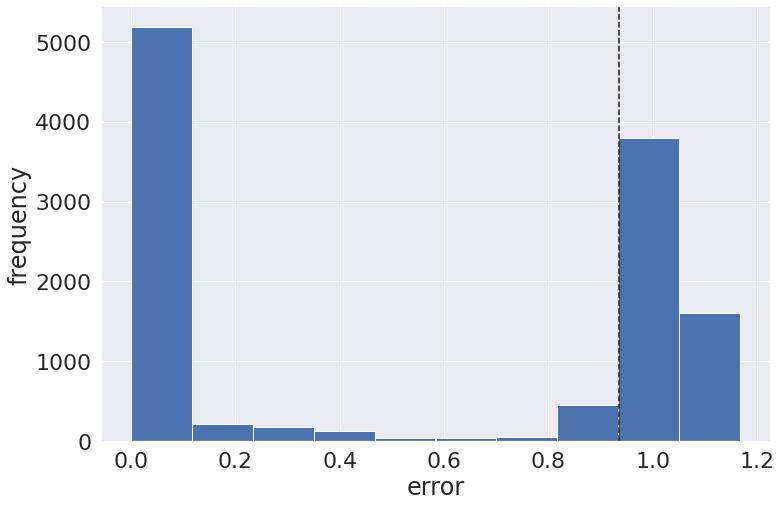

Outliers visualization


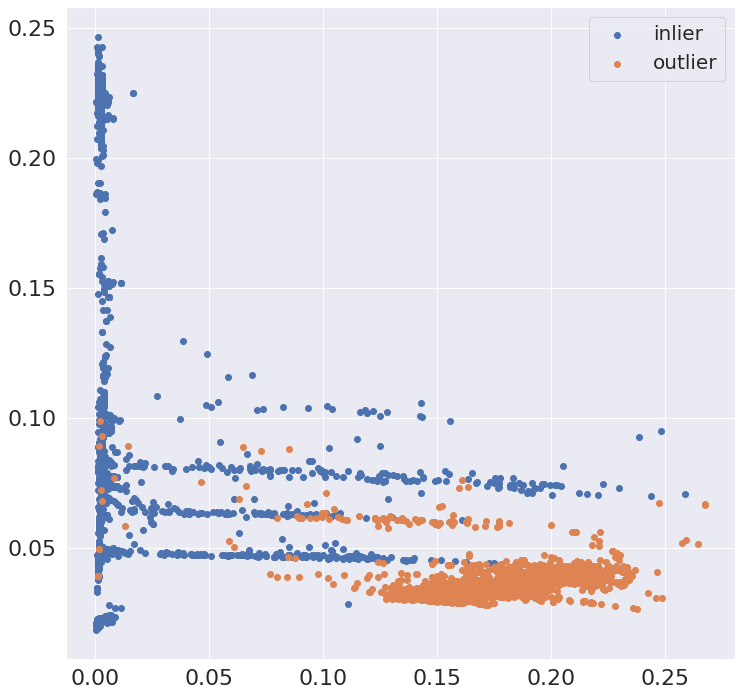

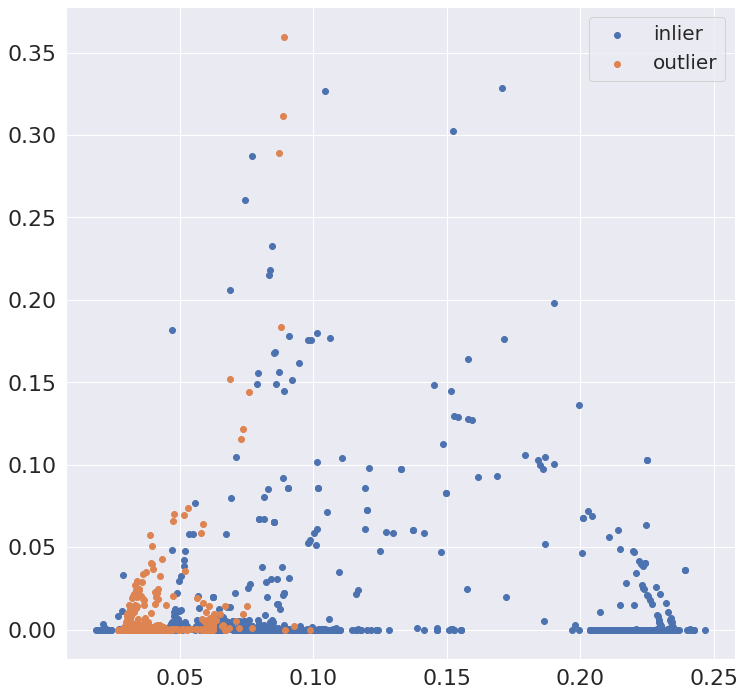

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.995     0.996      5859
           2      0.995     0.998     0.996      5859

    accuracy                          0.996     11718
   macro avg      0.996     0.996     0.996     11718
weighted avg      0.996     0.996     0.996     11718



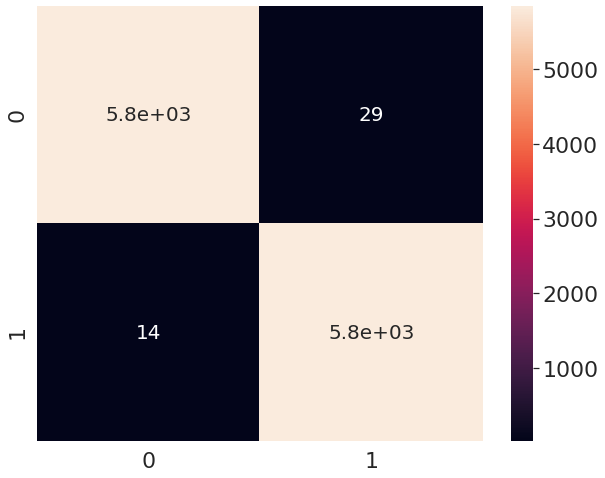

AUC score:  0.9963304318143028


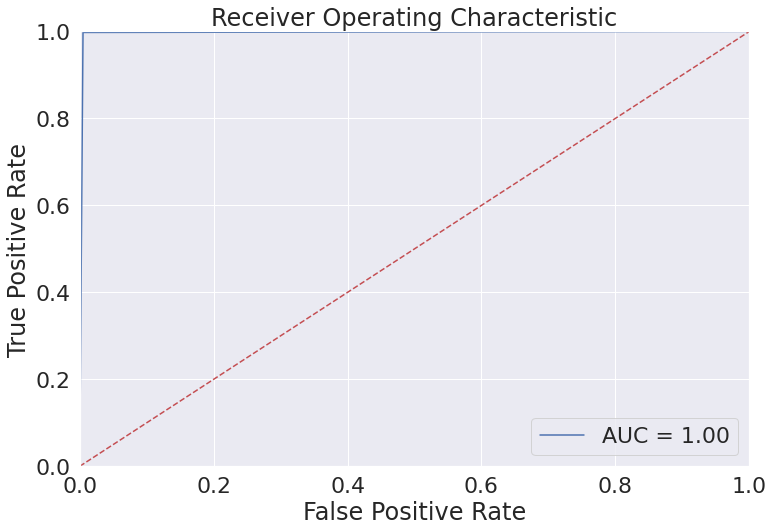

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [51]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.01812004 0.0115791  0.01384219 ... 1.14481432 0.61461829 0.92850927]
Visualize quantization error


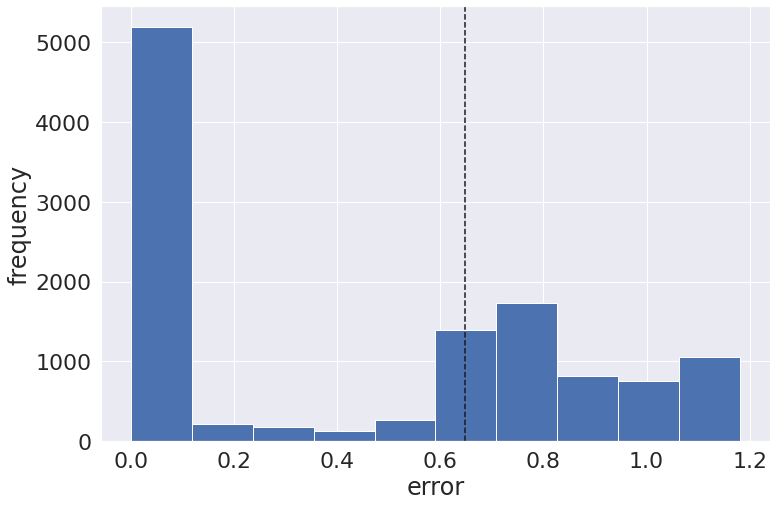

Outliers visualization


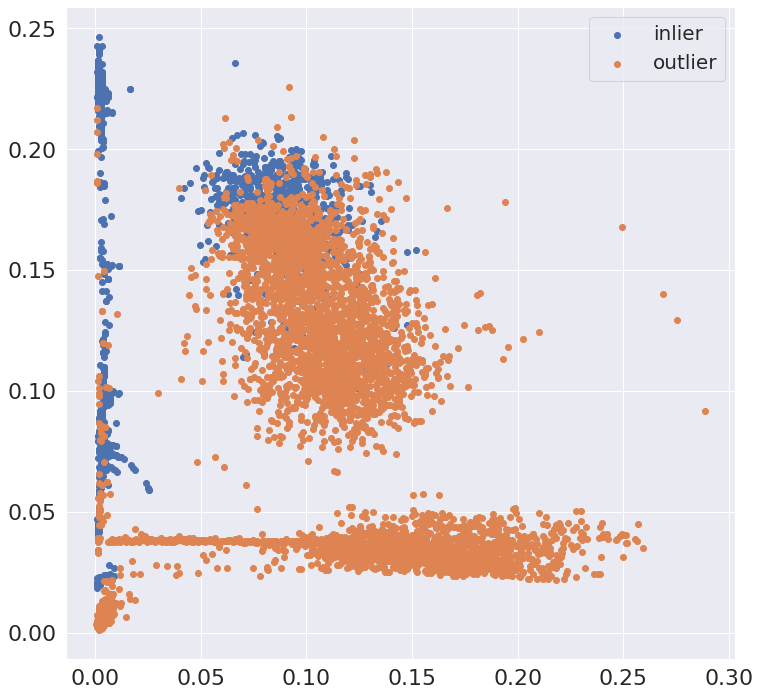

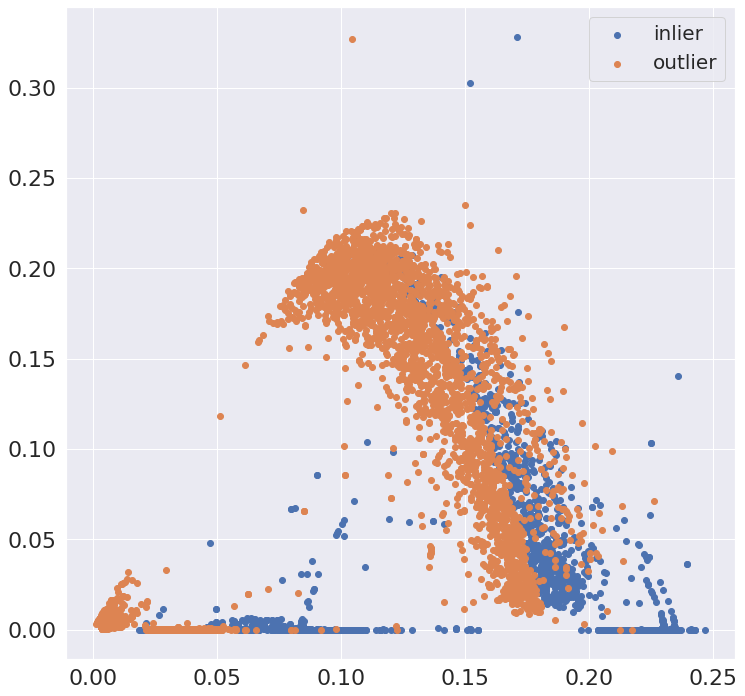

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.593     0.995     0.743      5859
           2      0.985     0.318     0.481      5859

    accuracy                          0.657     11718
   macro avg      0.789     0.657     0.612     11718
weighted avg      0.789     0.657     0.612     11718



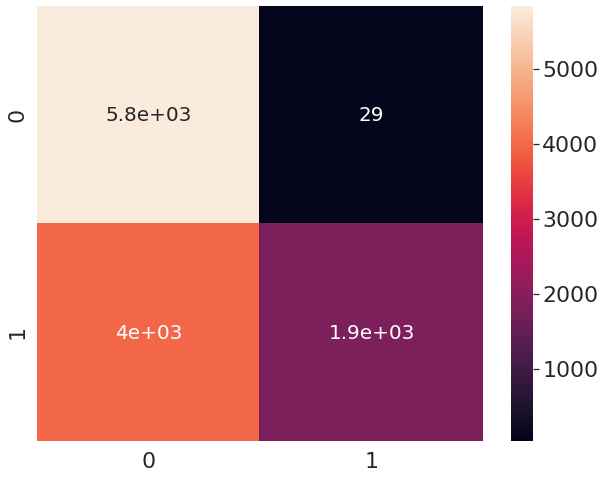

AUC score:  0.6566820276497697


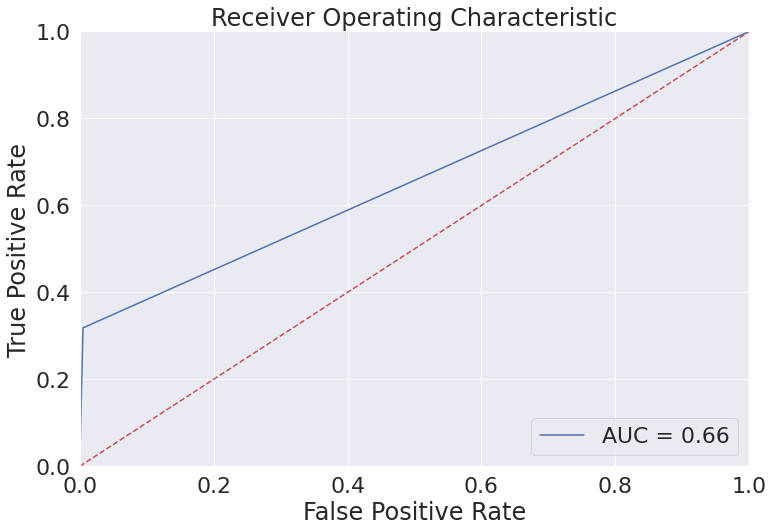

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [52]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Algo rand

### Train

In [53]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.76568988e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.37436707e-33  3.14964745e-17]
 [ 3.38296254e-03  8.95522622e-02  6.05680534e-08 ...  2.83924740e-18
   1.89028862e-34  1.82417082e-17]
 [ 3.38296234e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.21864617e-35 -3.52366809e-19]
 ...
 [ 4.89499142e-03  2.02477295e-01  2.88488760e-02 ...  1.32880537e-01
  -4.11300692e-02 -2.50489213e-01]
 [ 6.76236251e-03  4.92537313e-01  2.08801208e-16 ...  7.15314266e-17
  -5.14786110e-21 -2.19819145e-05]
 [ 3.38296260e-03  8.95522695e-02  7.94140500e-08 ...  2.00067898e-18
  -1.15808196e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 82.2492949962616


### Test Gafgyt

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.0069492  0.01171455 0.00732698 ... 1.15710668 0.21279817 0.21279818]
Visualize quantization error


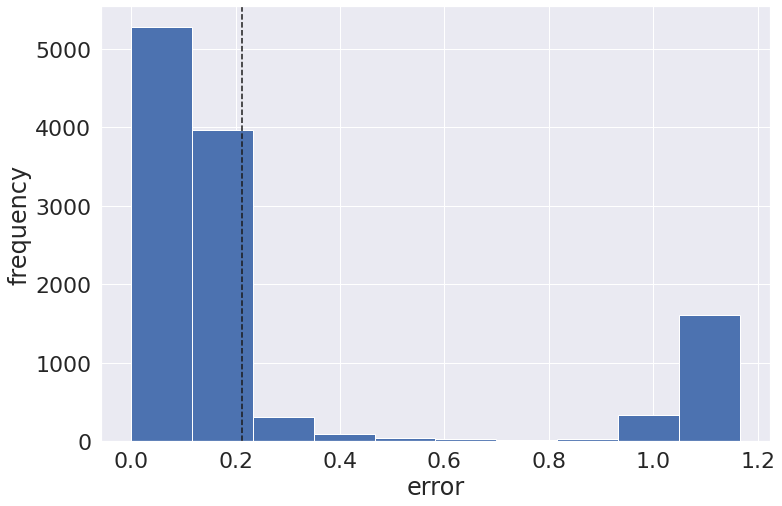

Outliers visualization


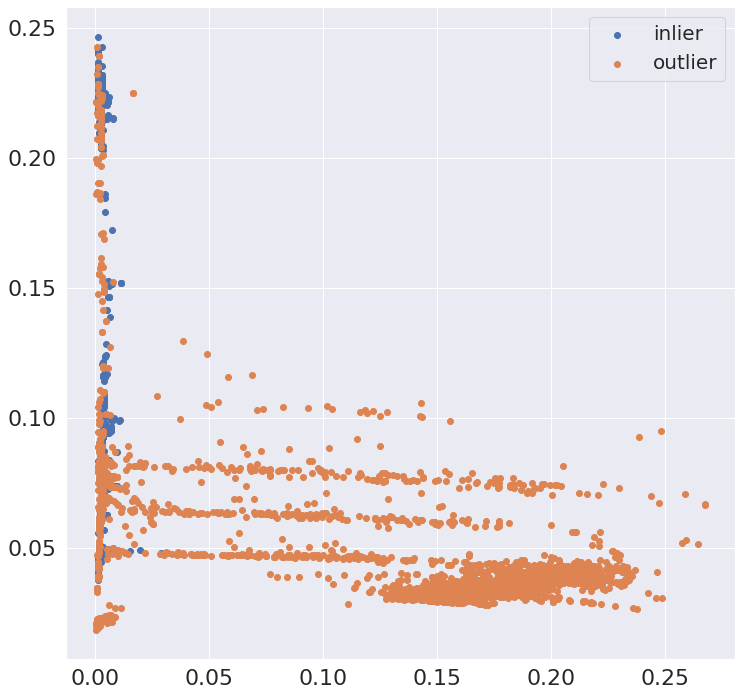

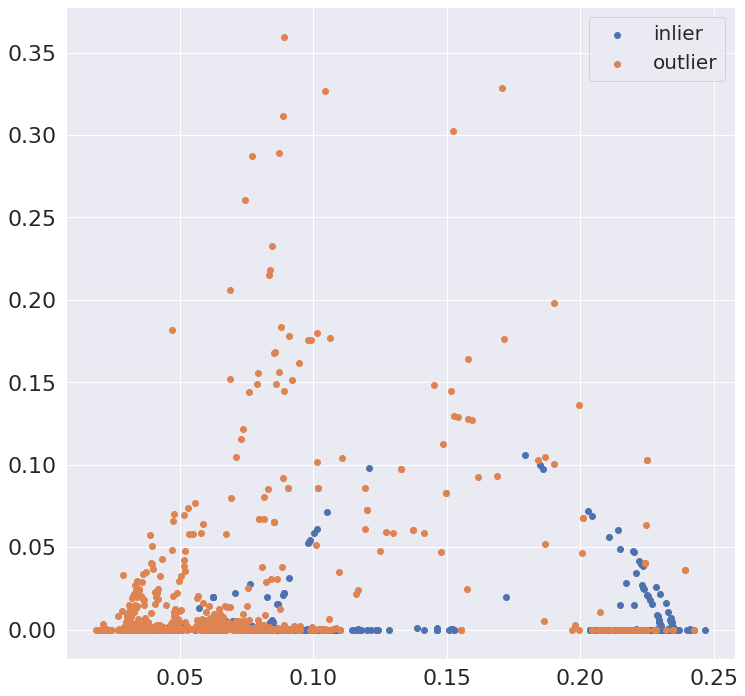

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.998     0.997      5859
           2      0.998     0.997     0.997      5859

    accuracy                          0.997     11718
   macro avg      0.997     0.997     0.997     11718
weighted avg      0.997     0.997     0.997     11718



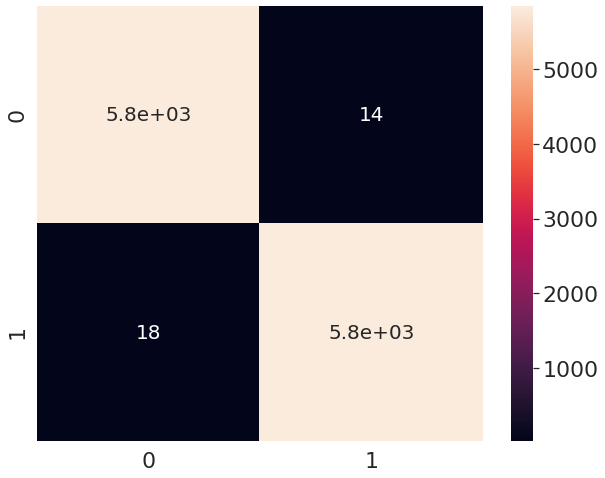

AUC score:  0.9972691585594812


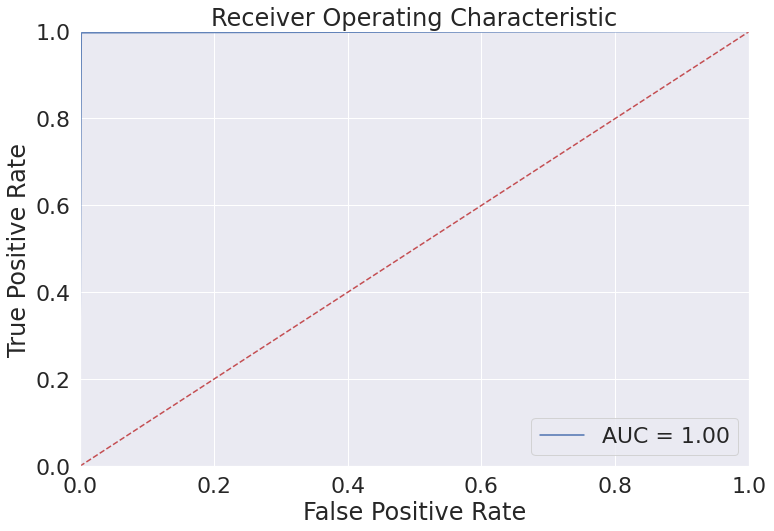

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [54]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### Test Mirai

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.0069492  0.01171455 0.00732698 ... 1.15087117 0.61581147 0.93567485]
Visualize quantization error


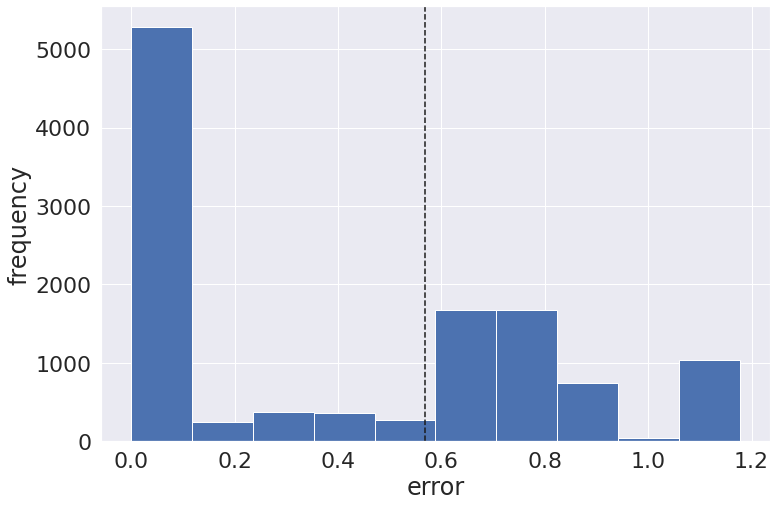

Outliers visualization


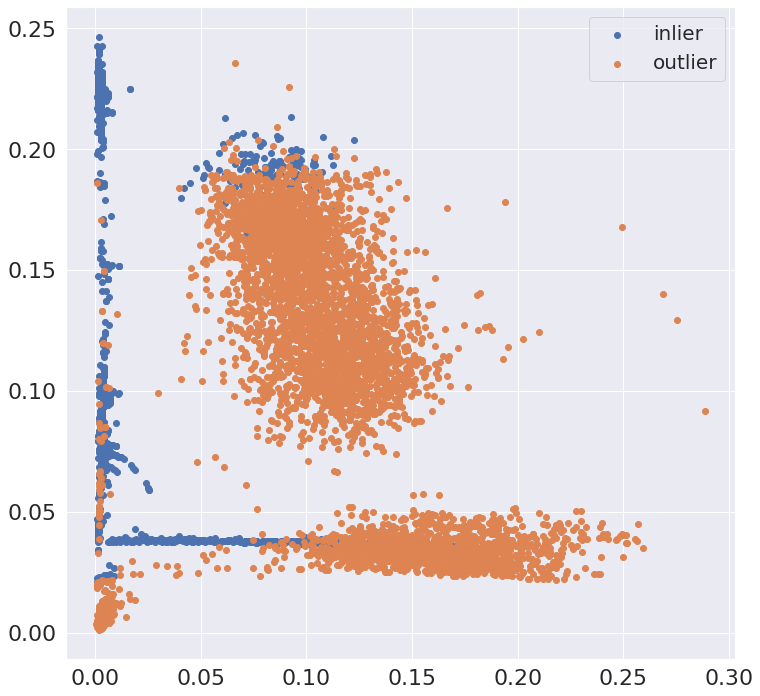

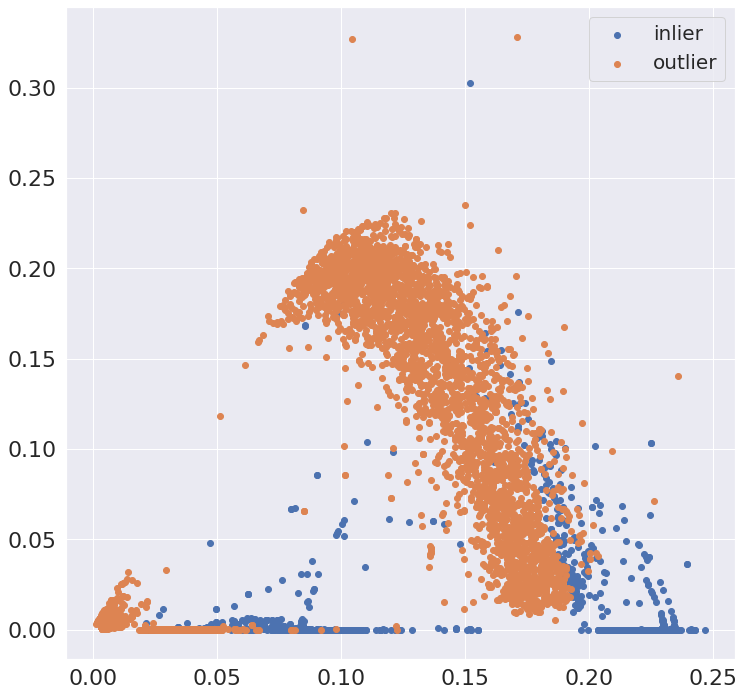

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.585     0.998     0.738      5859
           2      0.992     0.294     0.453      5859

    accuracy                          0.646     11718
   macro avg      0.789     0.646     0.595     11718
weighted avg      0.789     0.646     0.595     11718



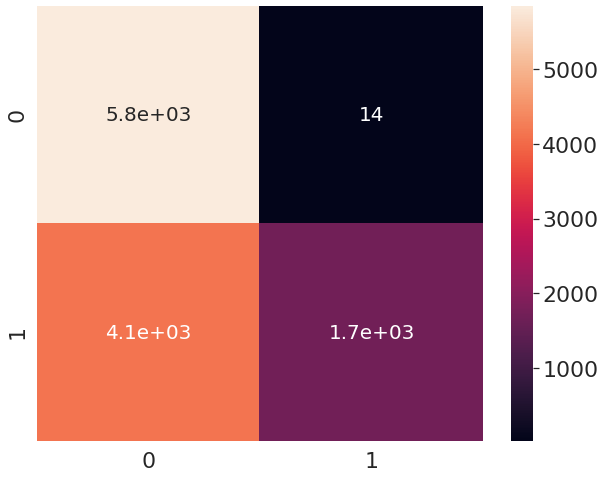

AUC score:  0.6455879842976618


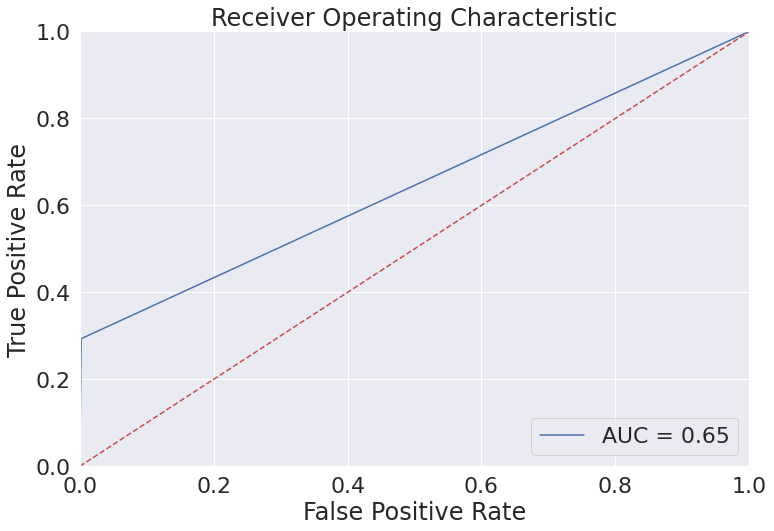

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [55]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Algo atpe

In [56]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.76568988e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.37436707e-33  3.14964745e-17]
 [ 3.38296254e-03  8.95522622e-02  6.05680534e-08 ...  2.83924740e-18
   1.89028862e-34  1.82417082e-17]
 [ 3.38296234e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.21864617e-35 -3.52366809e-19]
 ...
 [ 4.89499142e-03  2.02477295e-01  2.88488760e-02 ...  1.32880537e-01
  -4.11300692e-02 -2.50489213e-01]
 [ 6.76236251e-03  4.92537313e-01  2.08801208e-16 ...  7.15314266e-17
  -5.14786110e-21 -2.19819145e-05]
 [ 3.38296260e-03  8.95522695e-02  7.94140500e-08 ...  2.00067898e-18
  -1.15808196e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00577354 0.00264604 0.00581881 ... 1.13186127 0.20287187 0.20287188]
Visualize quantization error


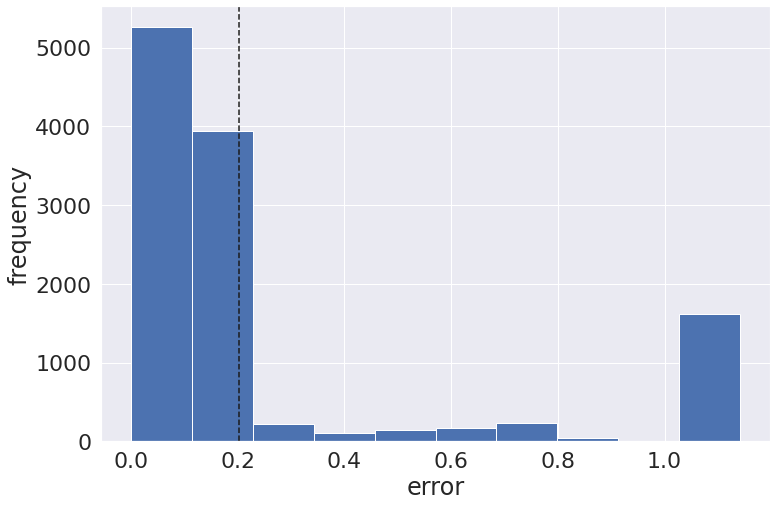

Outliers visualization


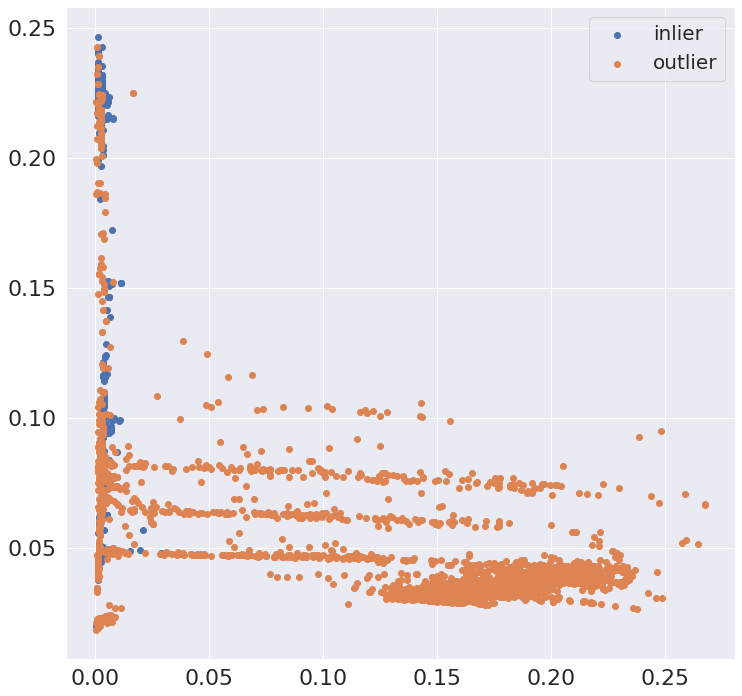

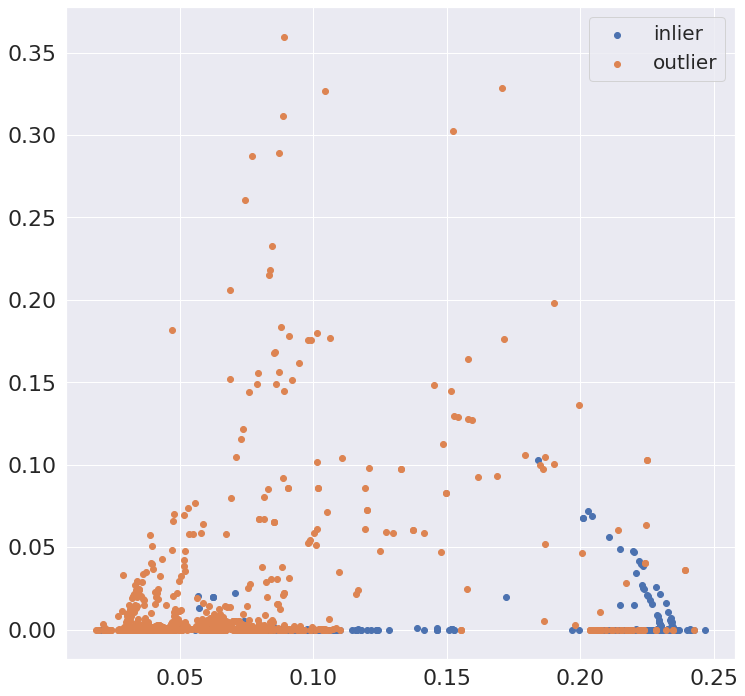

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.994     0.996      5859
           2      0.994     0.998     0.996      5859

    accuracy                          0.996     11718
   macro avg      0.996     0.996     0.996     11718
weighted avg      0.996     0.996     0.996     11718



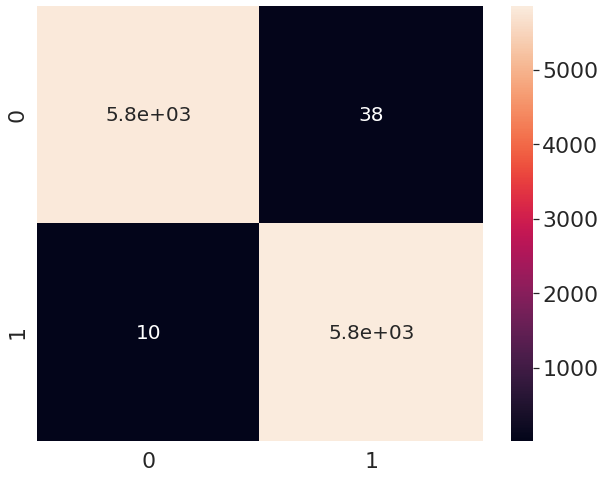

AUC score:  0.9959037378392217


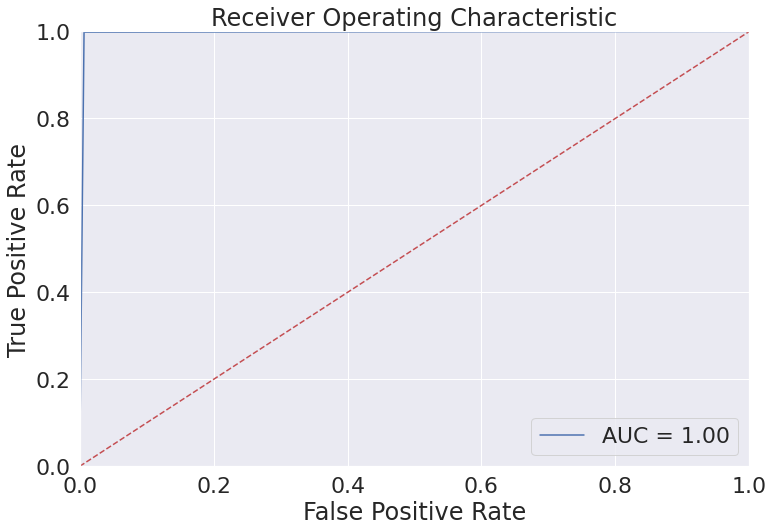

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [57]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00577354 0.00264604 0.00581881 ... 1.12315703 0.6480309  0.89367861]
Visualize quantization error


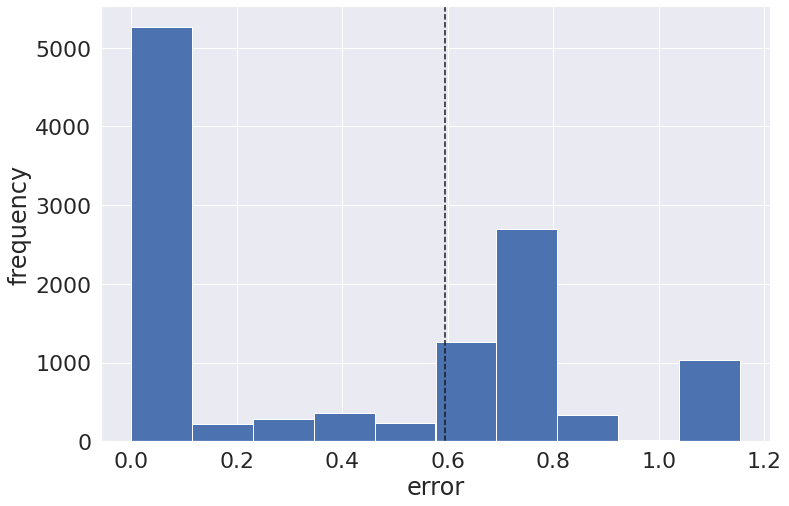

Outliers visualization


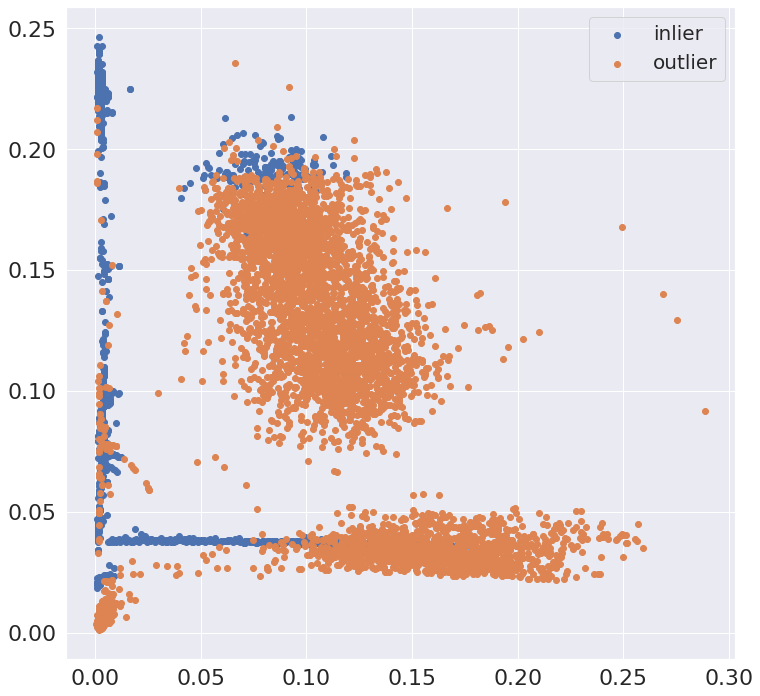

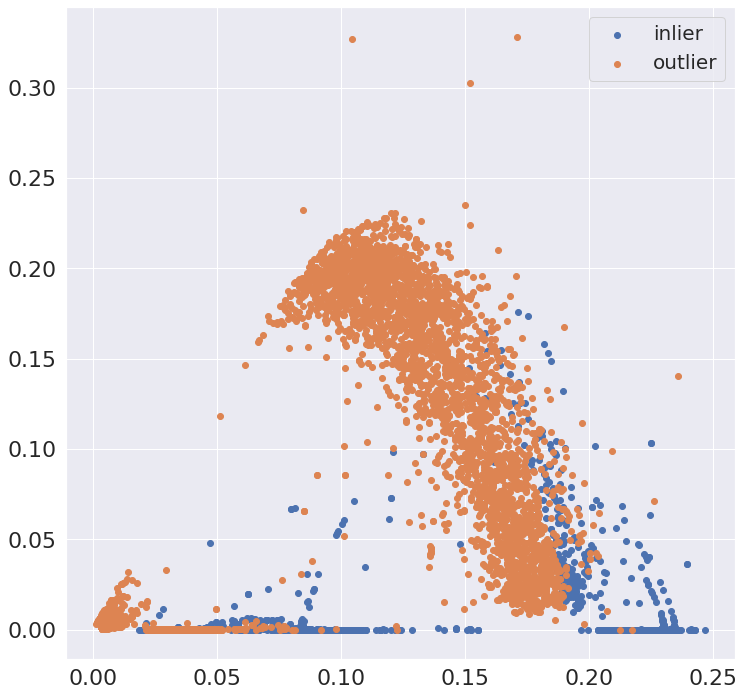

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.574     0.994     0.727      5859
           2      0.976     0.262     0.413      5859

    accuracy                          0.628     11718
   macro avg      0.775     0.628     0.570     11718
weighted avg      0.775     0.628     0.570     11718



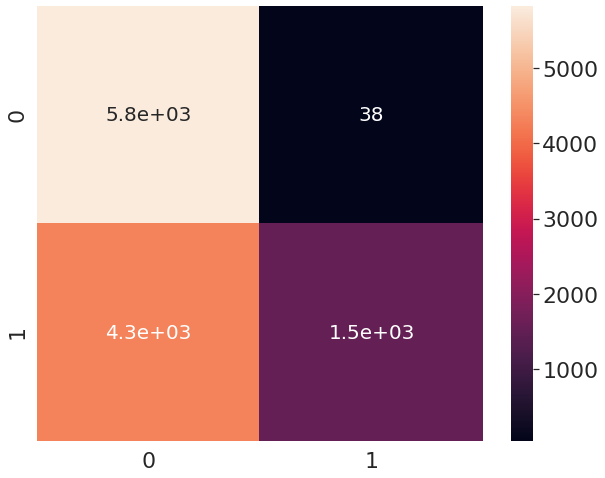

AUC score:  0.6278375149342892


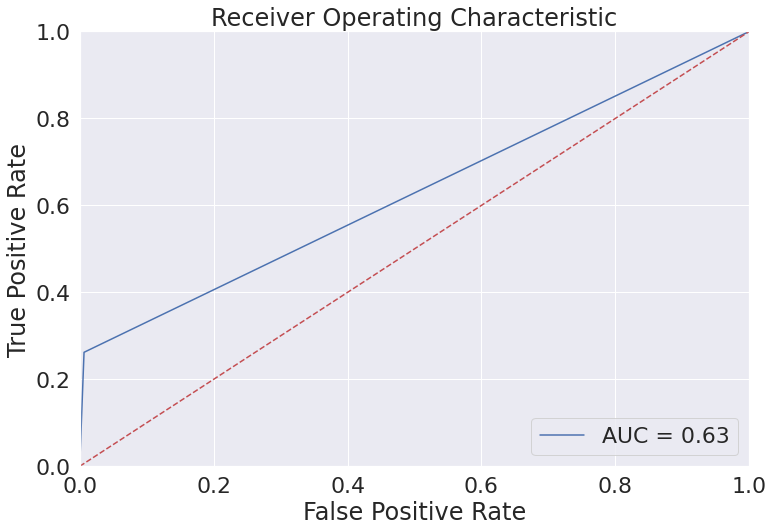

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [58]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Algo anneal

In [59]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.76568988e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.37436707e-33  3.14964745e-17]
 [ 3.38296254e-03  8.95522622e-02  6.05680534e-08 ...  2.83924740e-18
   1.89028862e-34  1.82417082e-17]
 [ 3.38296234e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.21864617e-35 -3.52366809e-19]
 ...
 [ 4.89499142e-03  2.02477295e-01  2.88488760e-02 ...  1.32880537e-01
  -4.11300692e-02 -2.50489213e-01]
 [ 6.76236251e-03  4.92537313e-01  2.08801208e-16 ...  7.15314266e-17
  -5.14786110e-21 -2.19819145e-05]
 [ 3.38296260e-03  8.95522695e-02  7.94140500e-08 ...  2.00067898e-18
  -1.15808196e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.02622231 0.01155906 0.00637901 ... 1.16970324 0.37658476 0.37658477]
Visualize quantization error


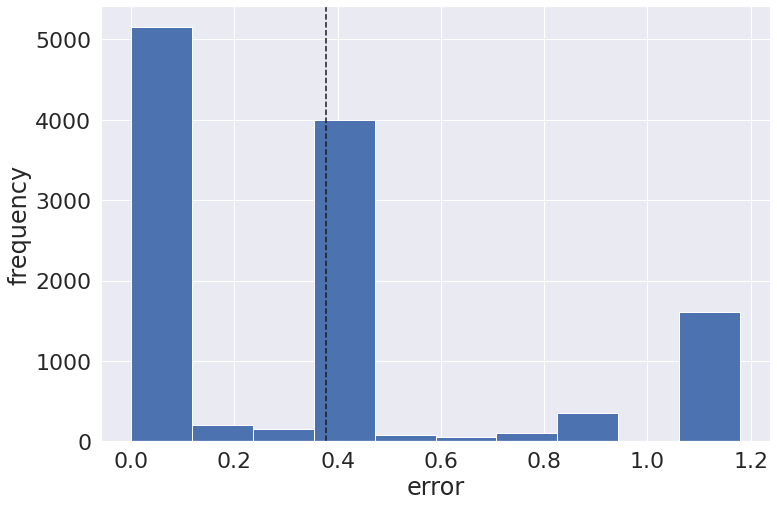

Outliers visualization


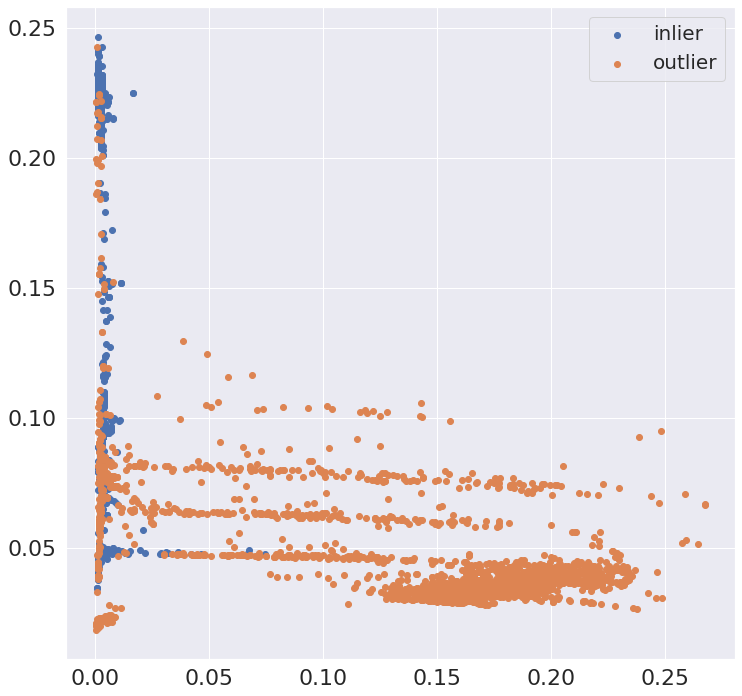

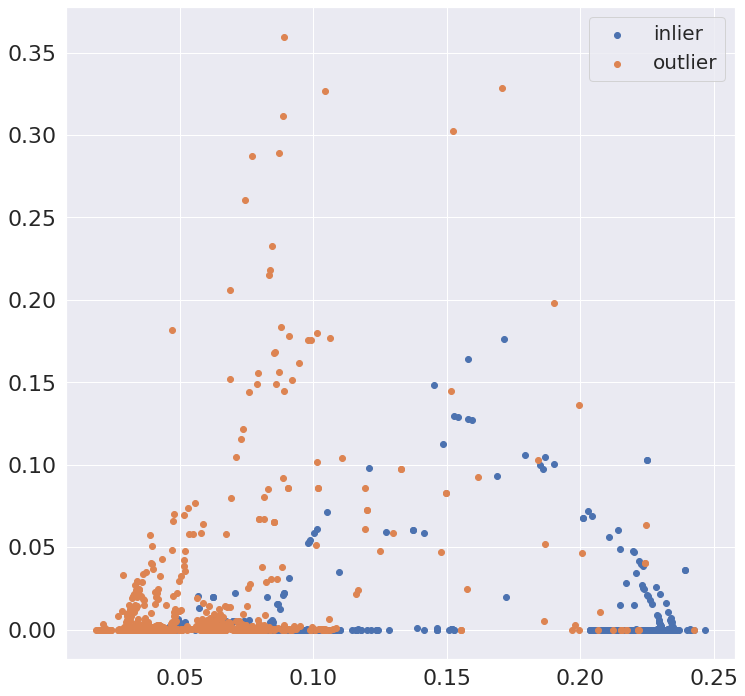

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.992     0.996      5859
           2      0.993     0.999     0.996      5859

    accuracy                          0.996     11718
   macro avg      0.996     0.996     0.996     11718
weighted avg      0.996     0.996     0.996     11718



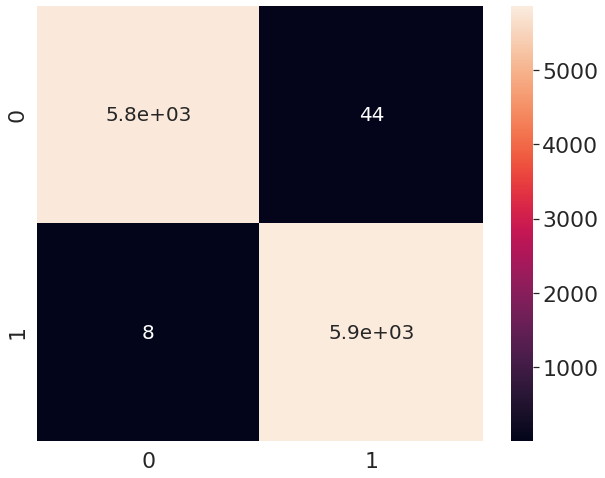

AUC score:  0.9955623826591569


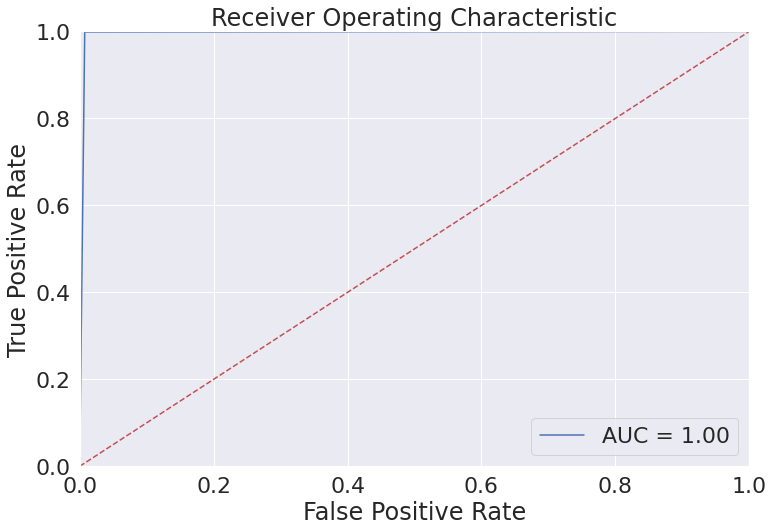

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [60]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.02622231 0.01155906 0.00637901 ... 1.15995386 0.61468969 1.0829832 ]
Visualize quantization error


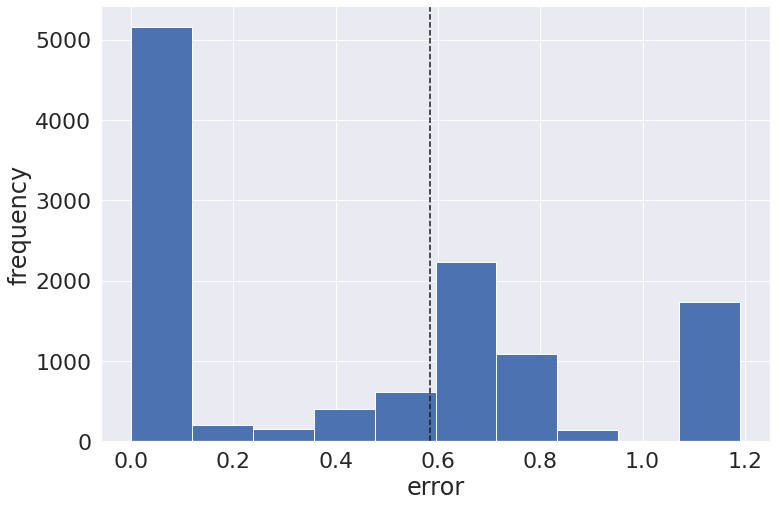

Outliers visualization


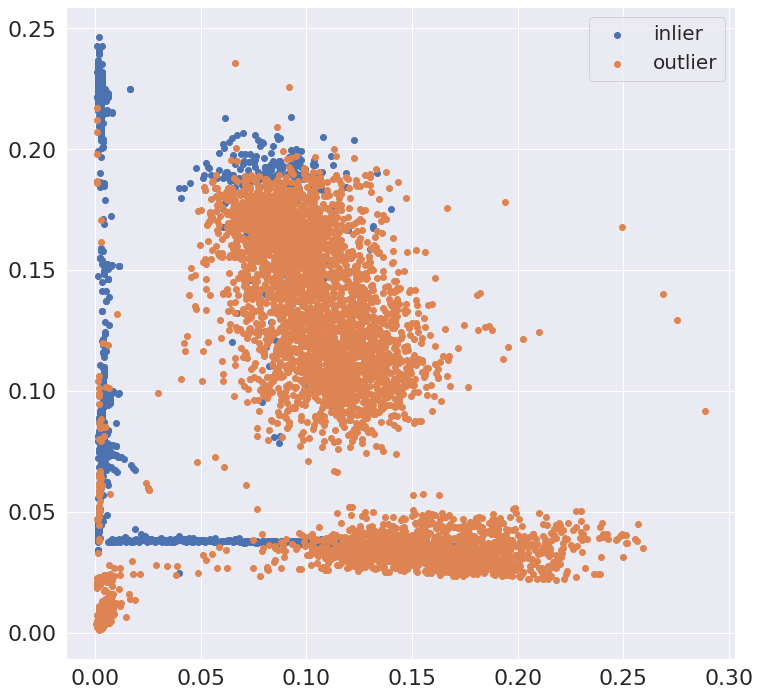

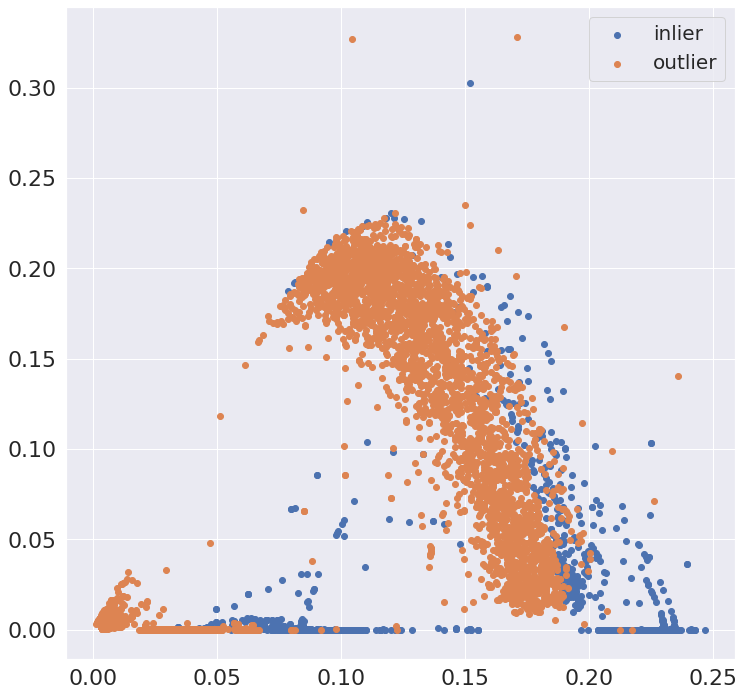

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.593     0.992     0.742      5859
           2      0.977     0.318     0.480      5859

    accuracy                          0.655     11718
   macro avg      0.785     0.655     0.611     11718
weighted avg      0.785     0.655     0.611     11718



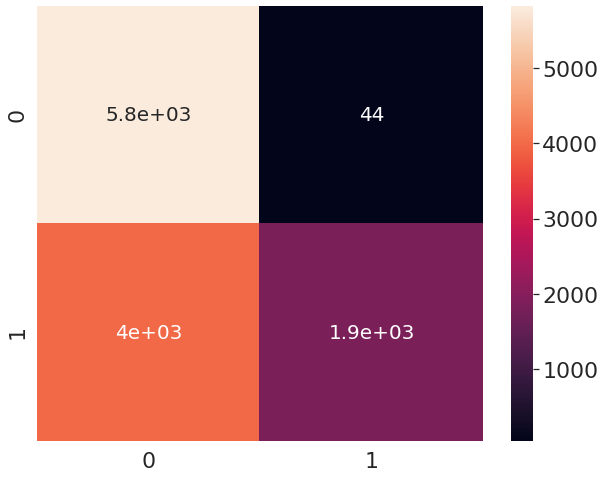

AUC score:  0.6554872845195425


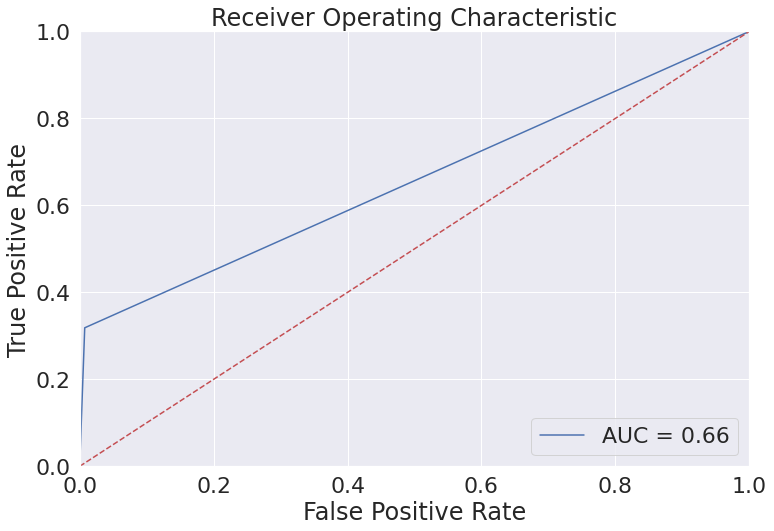

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [61]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

## 4.2. Train Mirai


## 4.2.4. Ratio 1.0

### 1) Set 15

### Train

In [62]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 5.14693625e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.90054386e-33  3.69407619e-17]
 [ 2.57355758e-03  8.95522622e-02  6.61641031e-08 ...  2.83924740e-18
   2.02516474e-34  2.13948580e-17]
 [ 2.57355743e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.80506408e-35 -4.13274774e-19]
 ...
 [ 3.72381963e-03  2.02477295e-01  3.15143034e-02 ...  1.32880537e-01
  -4.40647872e-02 -2.93787242e-01]
 [ 5.14440498e-03  4.92537313e-01  2.28092929e-16 ...  7.15314266e-17
  -5.51517196e-21 -2.57815734e-05]
 [ 2.57355763e-03  8.95522695e-02  8.67513334e-08 ...  2.00067898e-18
  -1.24071358e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14831442 0.05086488 0.05069362 ... 1.20522778 1.20009109 1.2000911 ]
Visualize quantization error


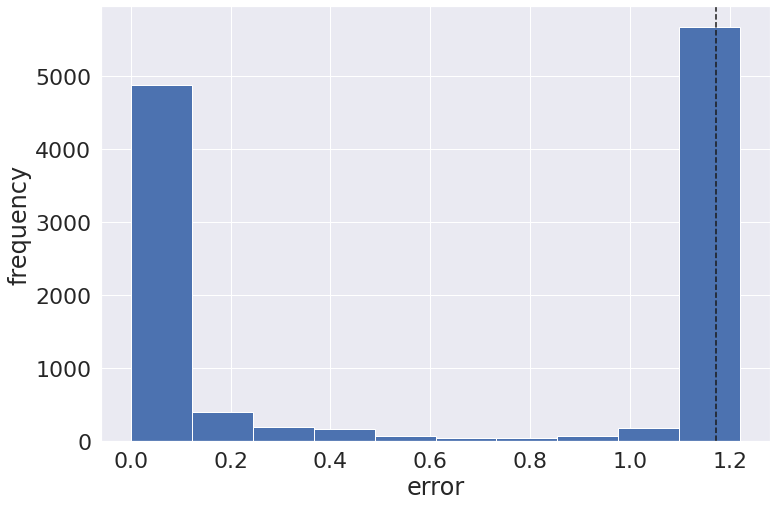

Outliers visualization


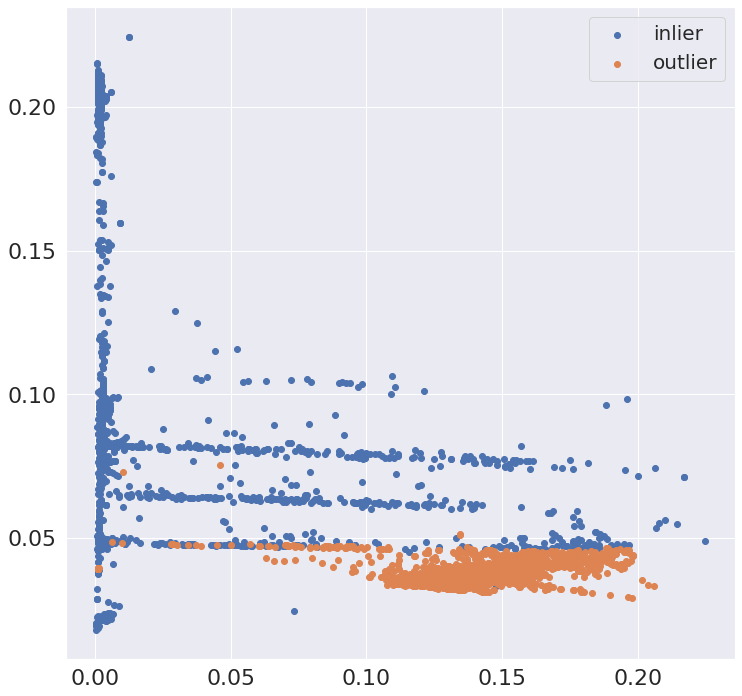

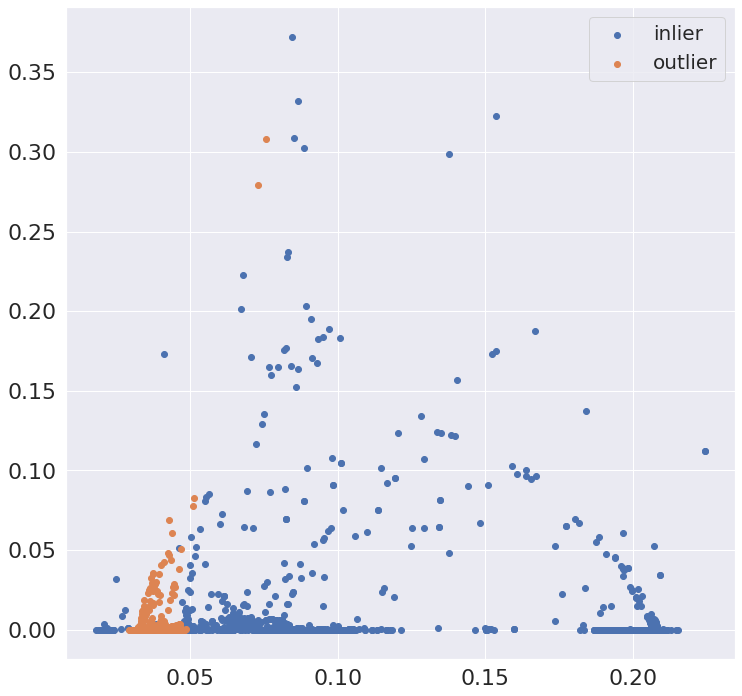

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.961     0.991     0.976      5859
           2      0.990     0.960     0.975      5859

    accuracy                          0.975     11718
   macro avg      0.976     0.975     0.975     11718
weighted avg      0.976     0.975     0.975     11718



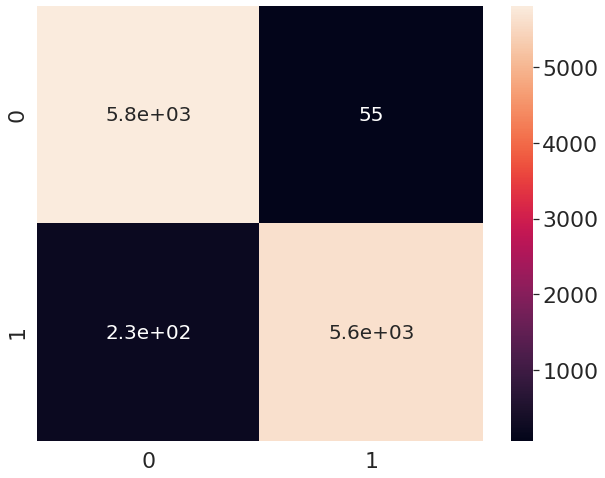

AUC score:  0.9754224270353302


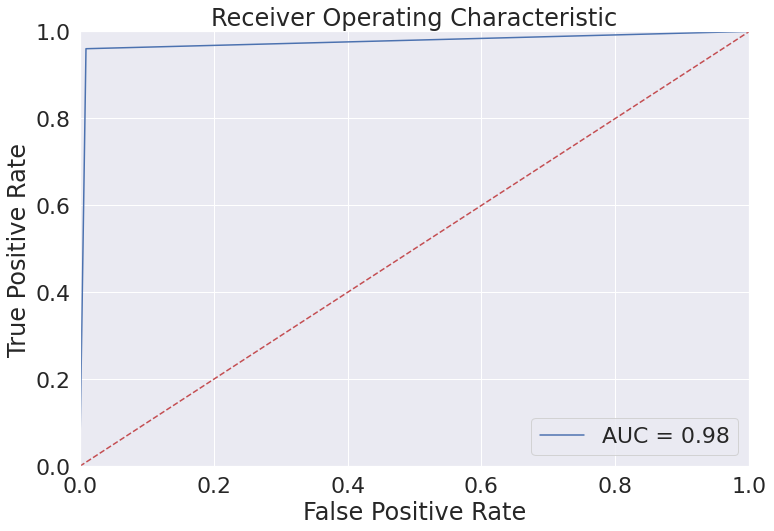

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [63]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14831442 0.05086488 0.05069362 ... 1.18187917 0.54960838 0.41054347]
Visualize quantization error


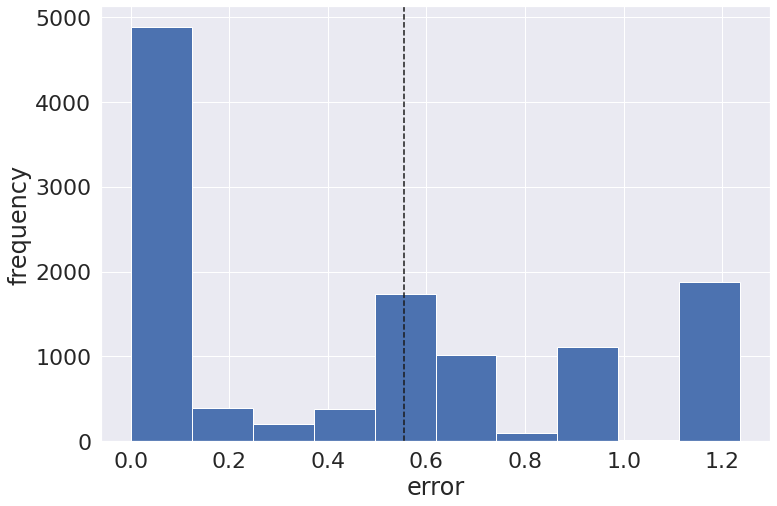

Outliers visualization


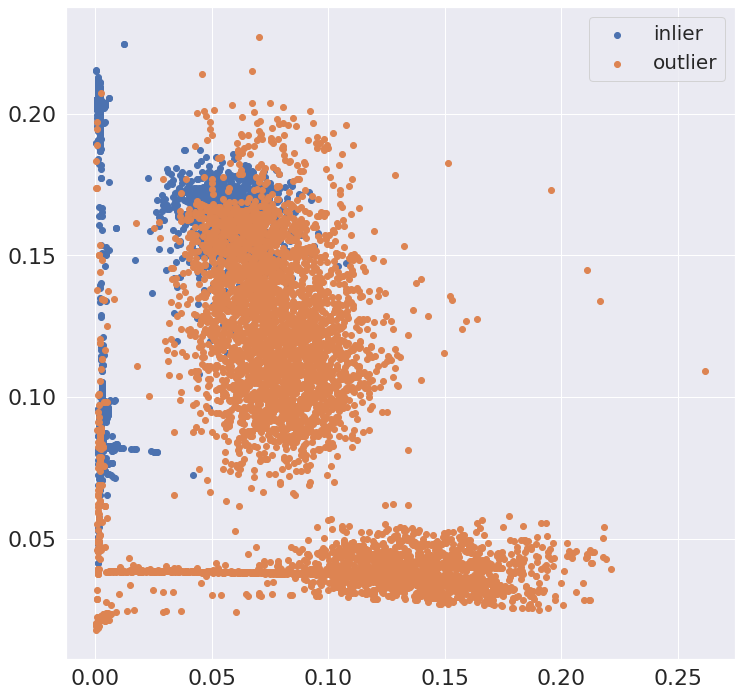

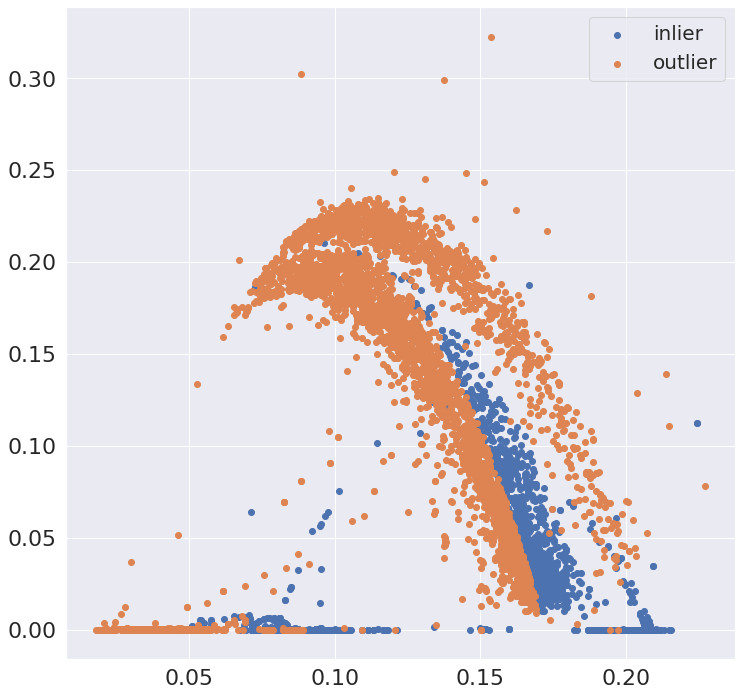

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.991     0.994      5859
           2      0.991     0.998     0.994      5859

    accuracy                          0.994     11718
   macro avg      0.994     0.994     0.994     11718
weighted avg      0.994     0.994     0.994     11718



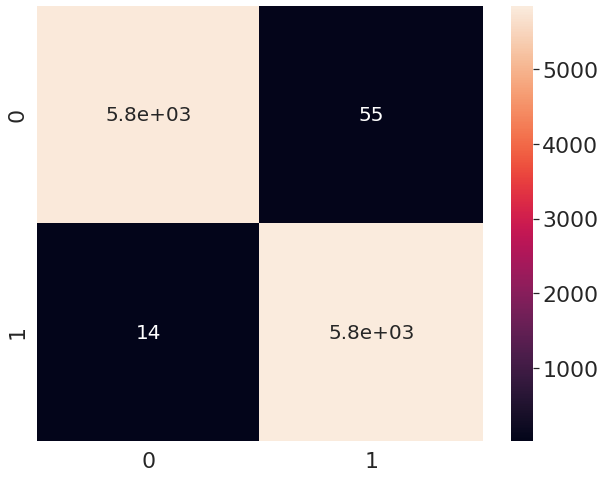

AUC score:  0.9941116231438812


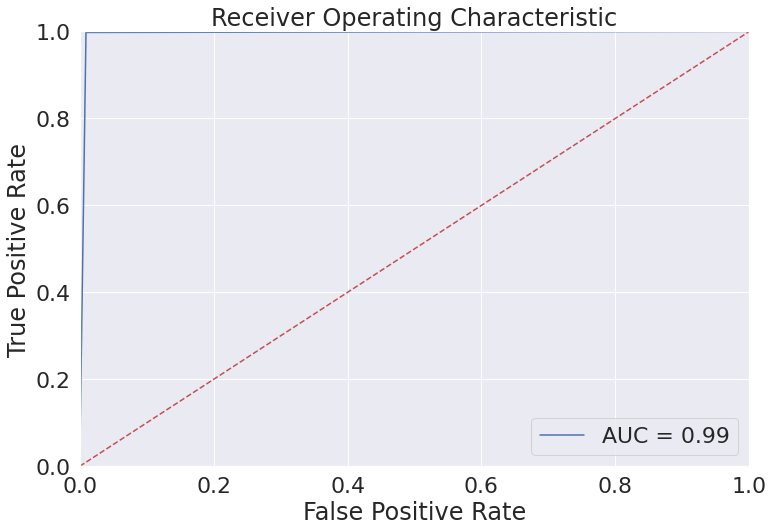

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [64]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [65]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 5.14693625e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.90054386e-33  3.69407619e-17]
 [ 2.57355758e-03  8.95522622e-02  6.61641031e-08 ...  2.83924740e-18
   2.02516474e-34  2.13948580e-17]
 [ 2.57355743e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.80506408e-35 -4.13274774e-19]
 ...
 [ 3.72381963e-03  2.02477295e-01  3.15143034e-02 ...  1.32880537e-01
  -4.40647872e-02 -2.93787242e-01]
 [ 5.14440498e-03  4.92537313e-01  2.28092929e-16 ...  7.15314266e-17
  -5.51517196e-21 -2.57815734e-05]
 [ 2.57355763e-03  8.95522695e-02  8.67513334e-08 ...  2.00067898e-18
  -1.24071358e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.22226981 0.0283494  0.03433067 ... 1.13785711 0.68347404 0.68347405]
Visualize quantization error


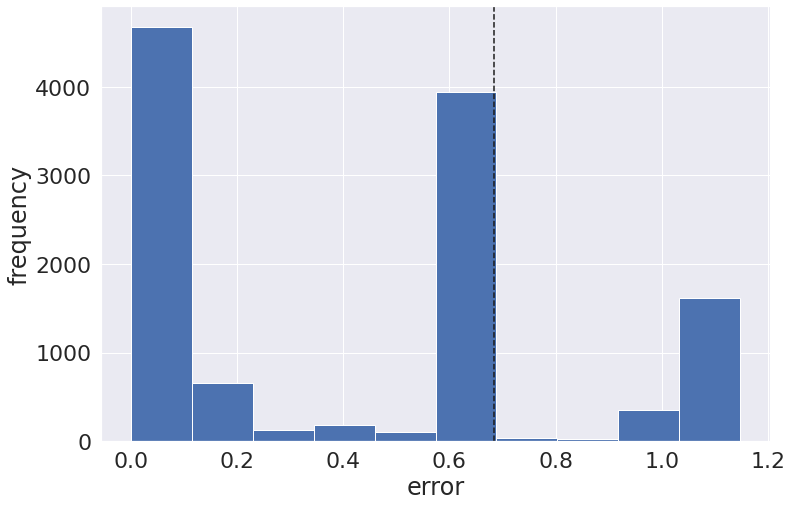

Outliers visualization


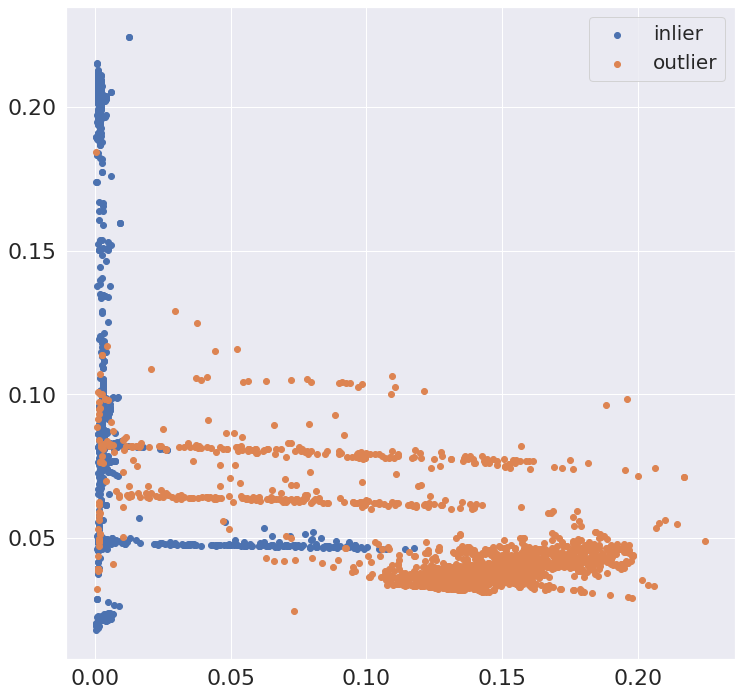

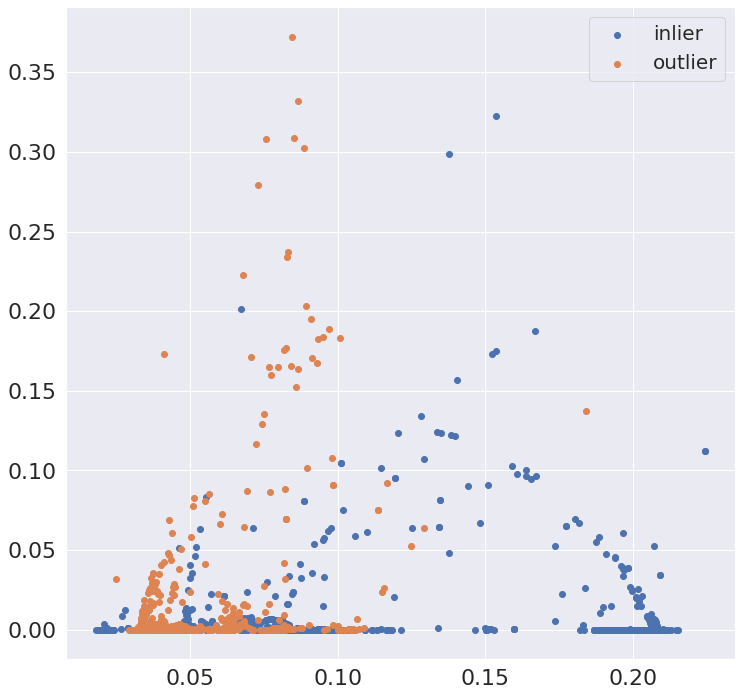

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.971     0.994     0.982      5859
           2      0.994     0.970     0.982      5859

    accuracy                          0.982     11718
   macro avg      0.983     0.982     0.982     11718
weighted avg      0.983     0.982     0.982     11718



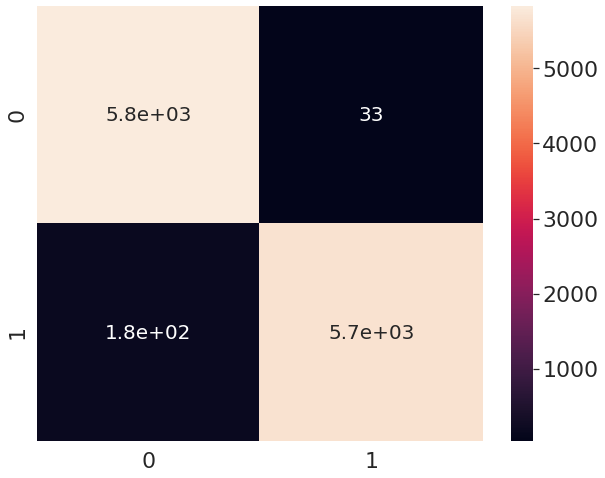

AUC score:  0.9822495306366275


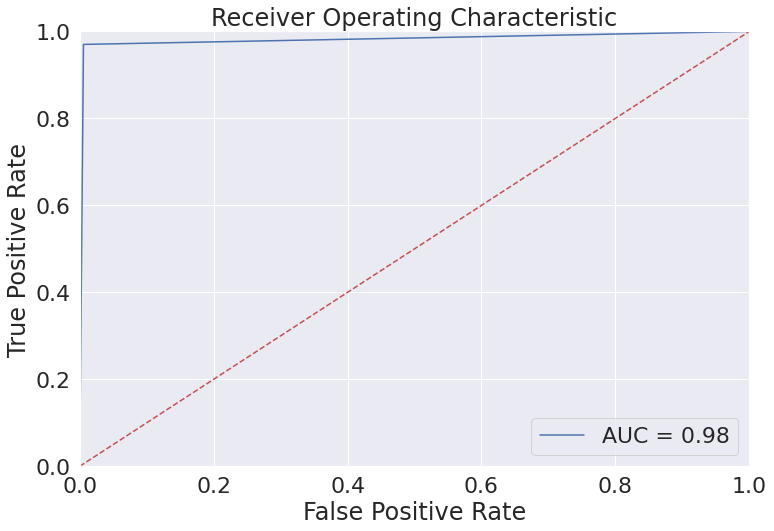

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [66]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.22226981 0.0283494  0.03433067 ... 1.12351688 0.53183013 0.43023306]
Visualize quantization error


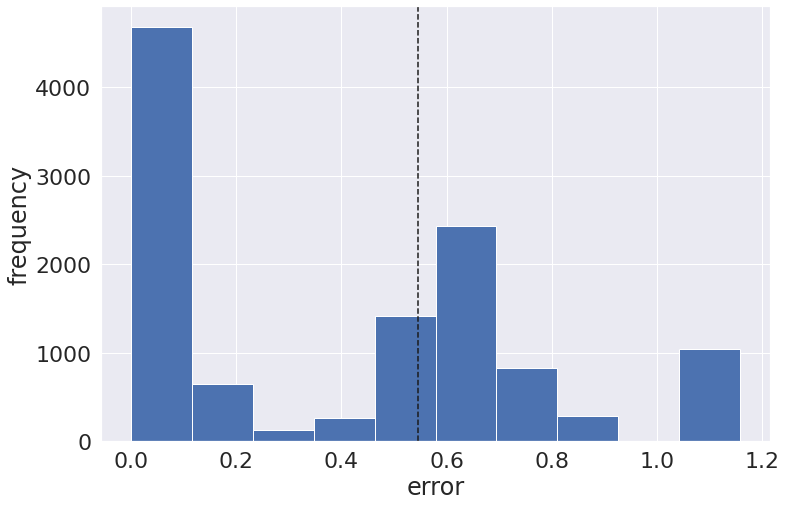

Outliers visualization


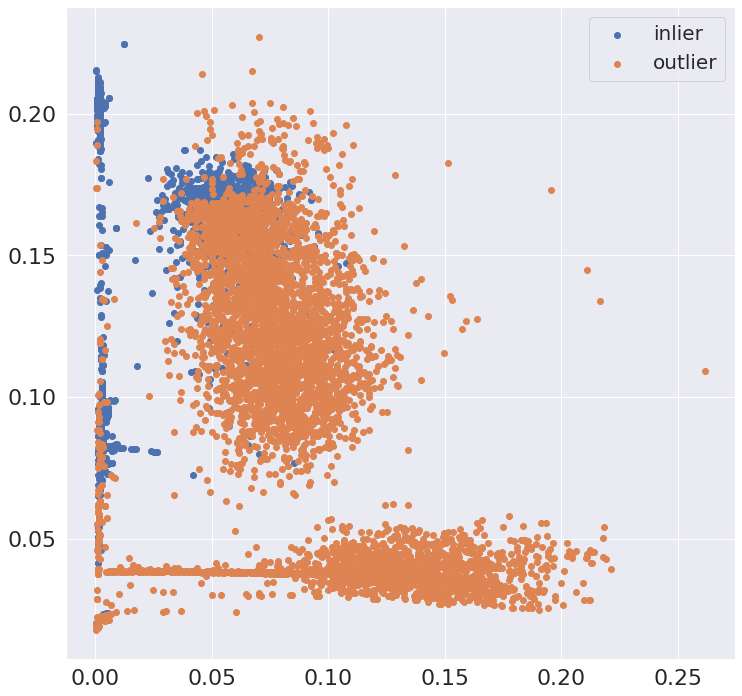

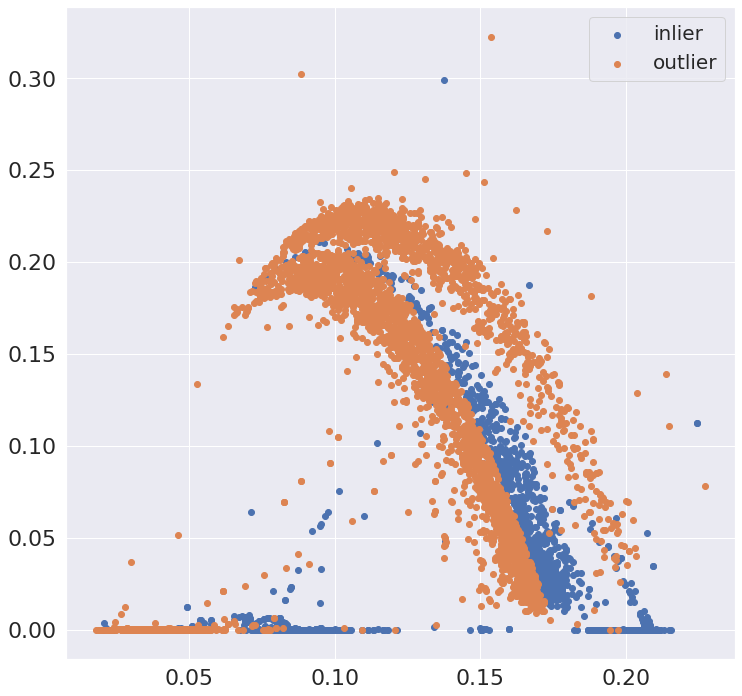

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.994     0.996      5859
           2      0.994     0.997     0.996      5859

    accuracy                          0.996     11718
   macro avg      0.996     0.996     0.996     11718
weighted avg      0.996     0.996     0.996     11718



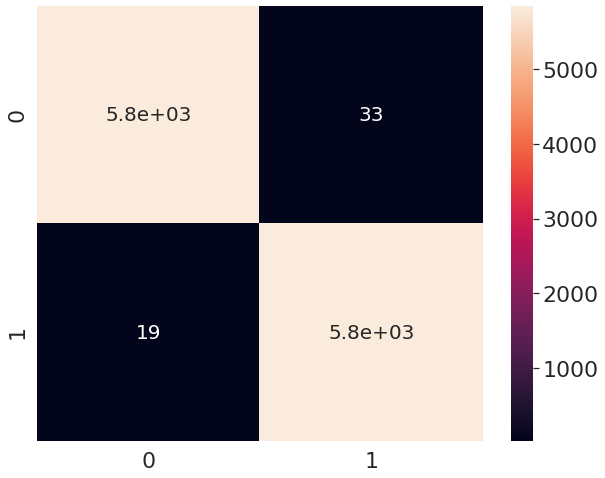

AUC score:  0.9955623826591569


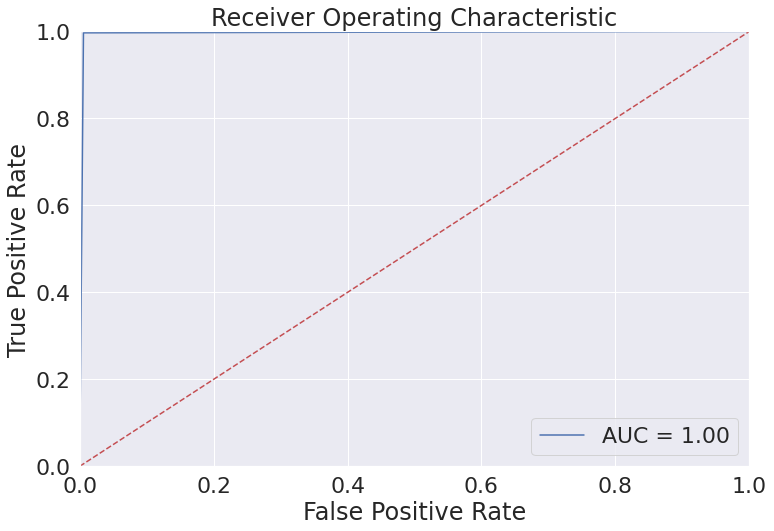

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Set 30

### Train

In [68]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 5.14693625e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.90054386e-33  3.69407619e-17]
 [ 2.57355758e-03  8.95522622e-02  6.61641031e-08 ...  2.83924740e-18
   2.02516474e-34  2.13948580e-17]
 [ 2.57355743e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.80506408e-35 -4.13274774e-19]
 ...
 [ 3.72381963e-03  2.02477295e-01  3.15143034e-02 ...  1.32880537e-01
  -4.40647872e-02 -2.93787242e-01]
 [ 5.14440498e-03  4.92537313e-01  2.28092929e-16 ...  7.15314266e-17
  -5.51517196e-21 -2.57815734e-05]
 [ 2.57355763e-03  8.95522695e-02  8.67513334e-08 ...  2.00067898e-18
  -1.24071358e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.02445411 0.02107926 0.02323626 ... 1.13884229 0.8926079  0.89260791]
Visualize quantization error


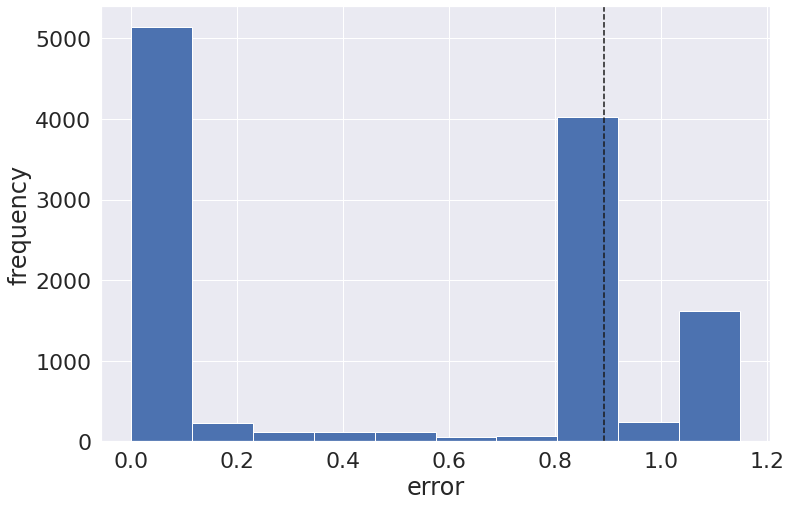

Outliers visualization


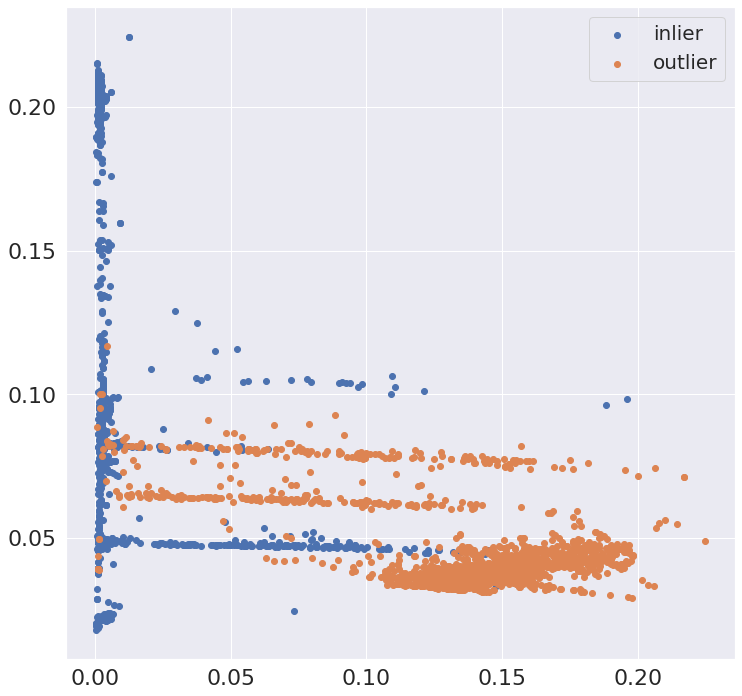

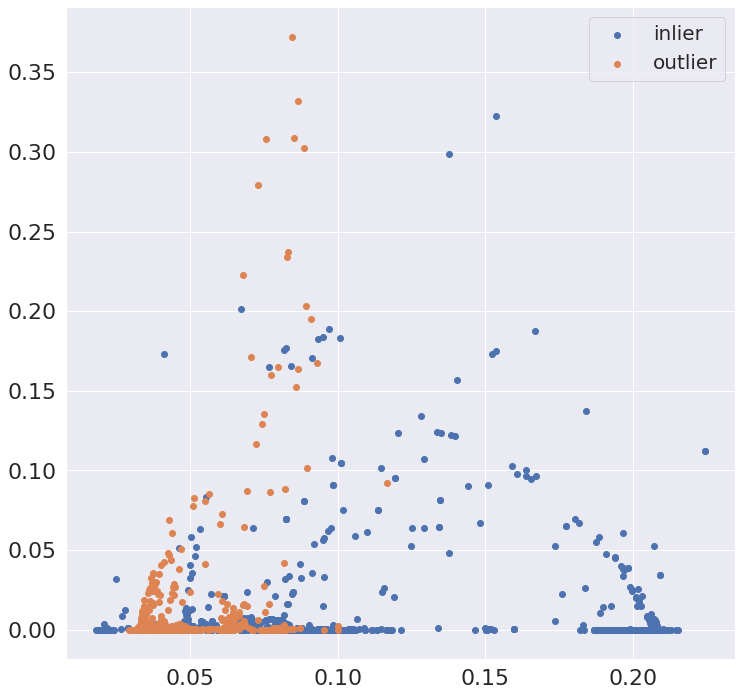

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.942     0.994     0.967      5859
           2      0.993     0.939     0.966      5859

    accuracy                          0.966     11718
   macro avg      0.968     0.966     0.966     11718
weighted avg      0.968     0.966     0.966     11718



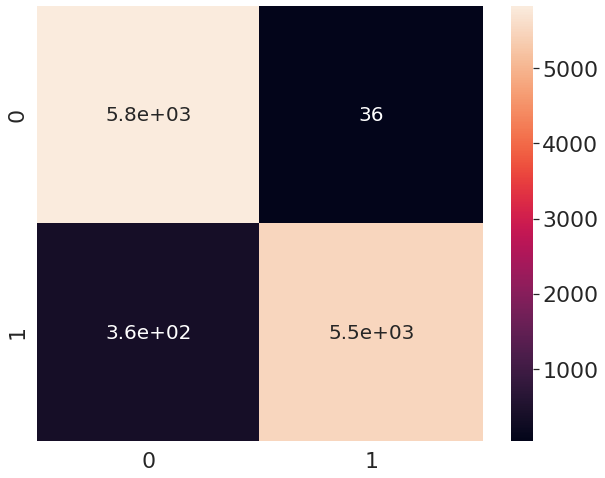

AUC score:  0.9664618535586277


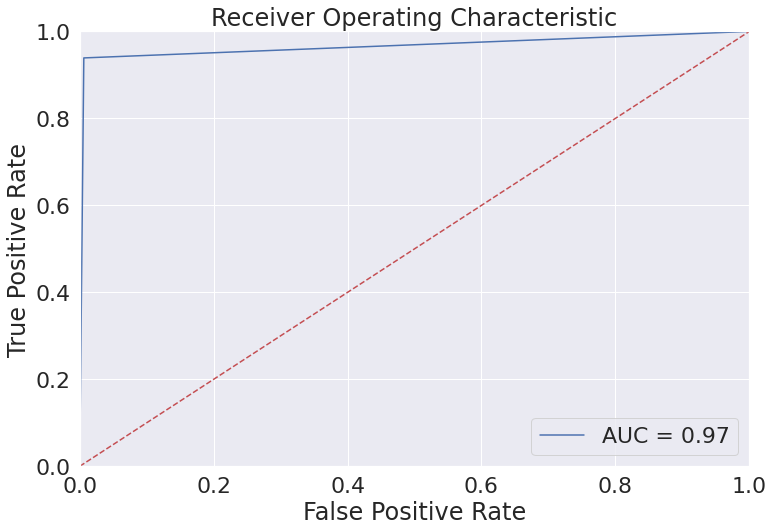

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.02445411 0.02107926 0.02323626 ... 1.12317732 0.57349421 0.42635689]
Visualize quantization error


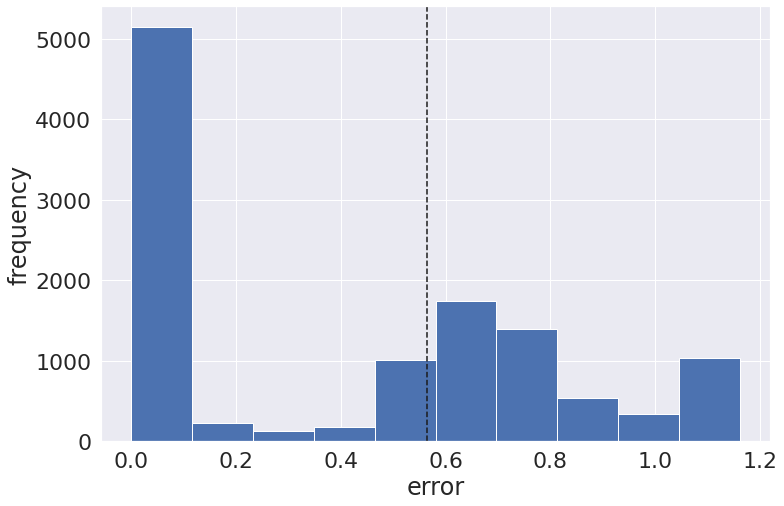

Outliers visualization


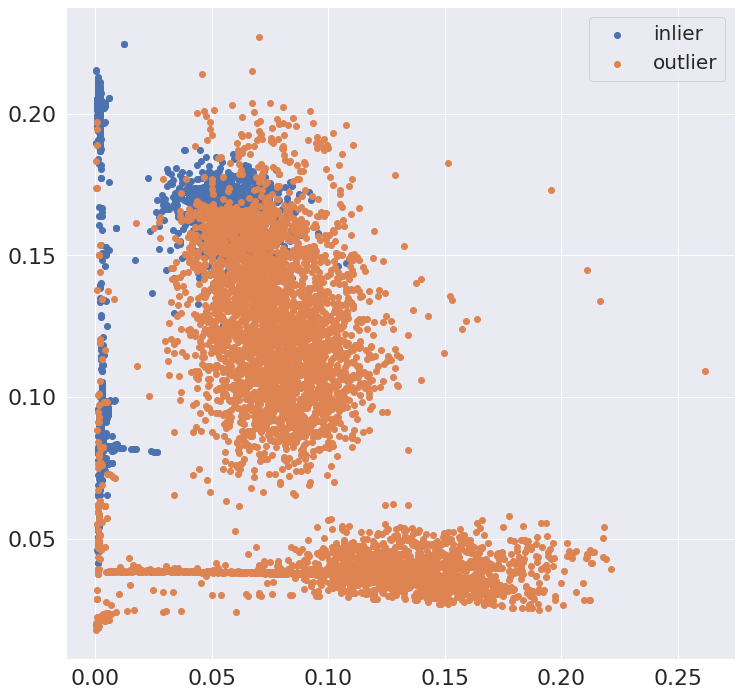

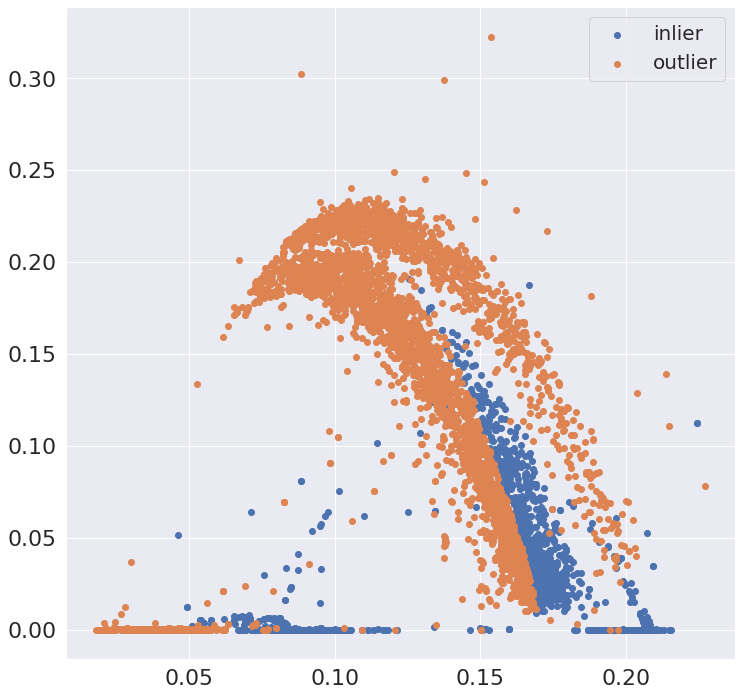

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.994     0.996      5859
           2      0.994     0.999     0.996      5859

    accuracy                          0.996     11718
   macro avg      0.996     0.996     0.996     11718
weighted avg      0.996     0.996     0.996     11718



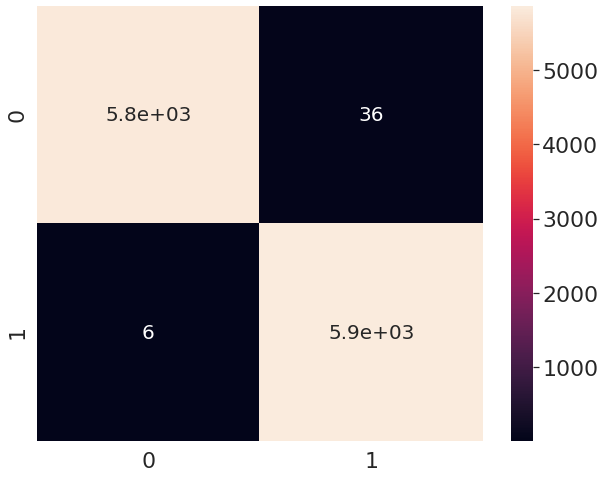

AUC score:  0.9964157706093191


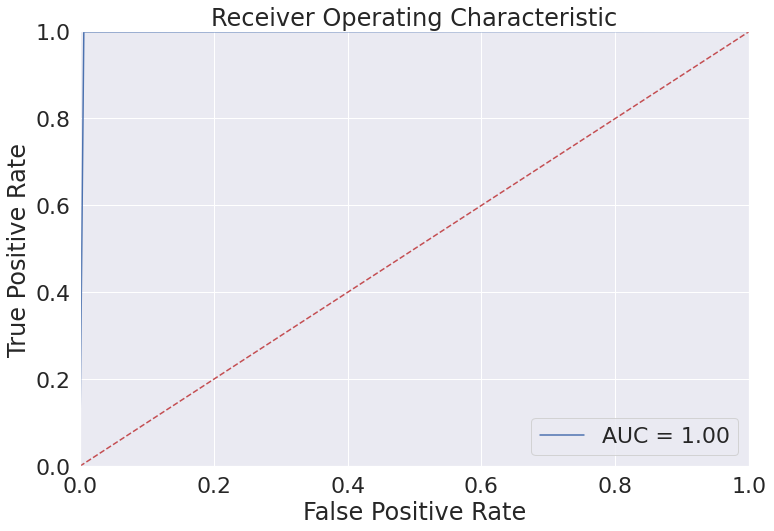

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Set 45

### Train

In [71]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 5.14693625e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.90054386e-33  3.69407619e-17]
 [ 2.57355758e-03  8.95522622e-02  6.61641031e-08 ...  2.83924740e-18
   2.02516474e-34  2.13948580e-17]
 [ 2.57355743e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.80506408e-35 -4.13274774e-19]
 ...
 [ 3.72381963e-03  2.02477295e-01  3.15143034e-02 ...  1.32880537e-01
  -4.40647872e-02 -2.93787242e-01]
 [ 5.14440498e-03  4.92537313e-01  2.28092929e-16 ...  7.15314266e-17
  -5.51517196e-21 -2.57815734e-05]
 [ 2.57355763e-03  8.95522695e-02  8.67513334e-08 ...  2.00067898e-18
  -1.24071358e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.02310379 0.01159449 0.02107787 ... 1.1296968  0.17621433 0.17621434]
Visualize quantization error


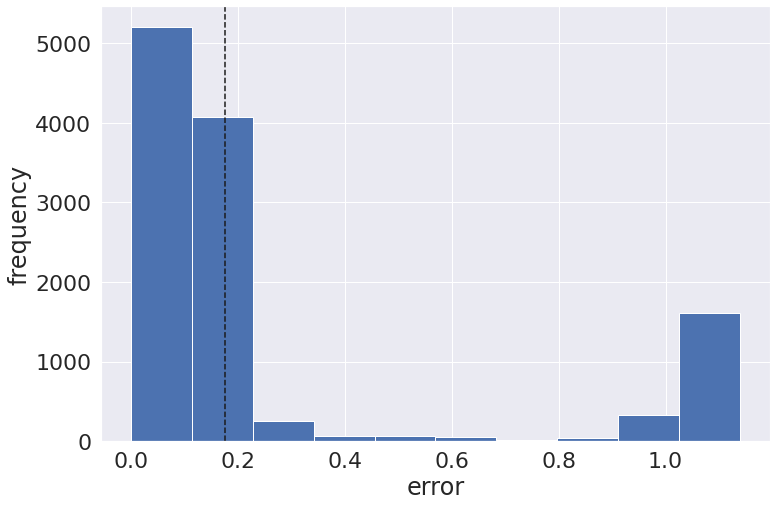

Outliers visualization


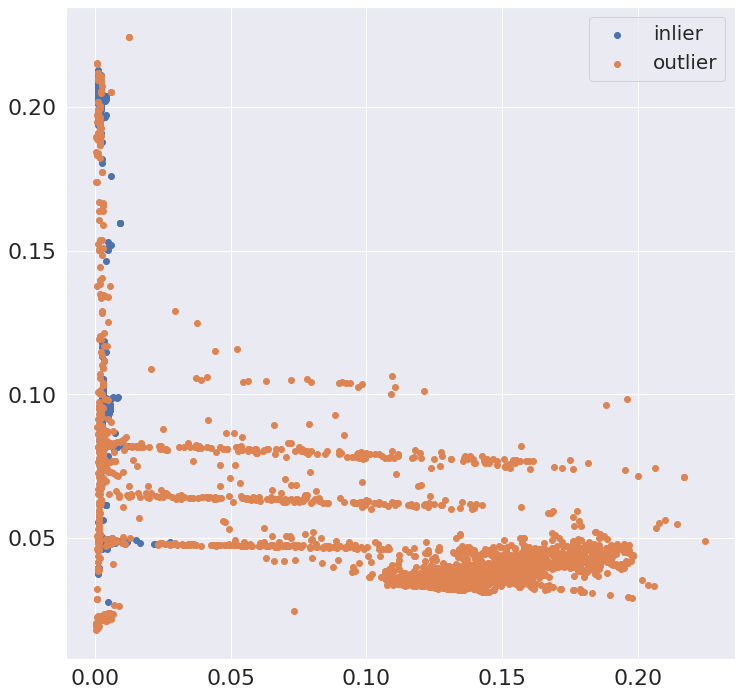

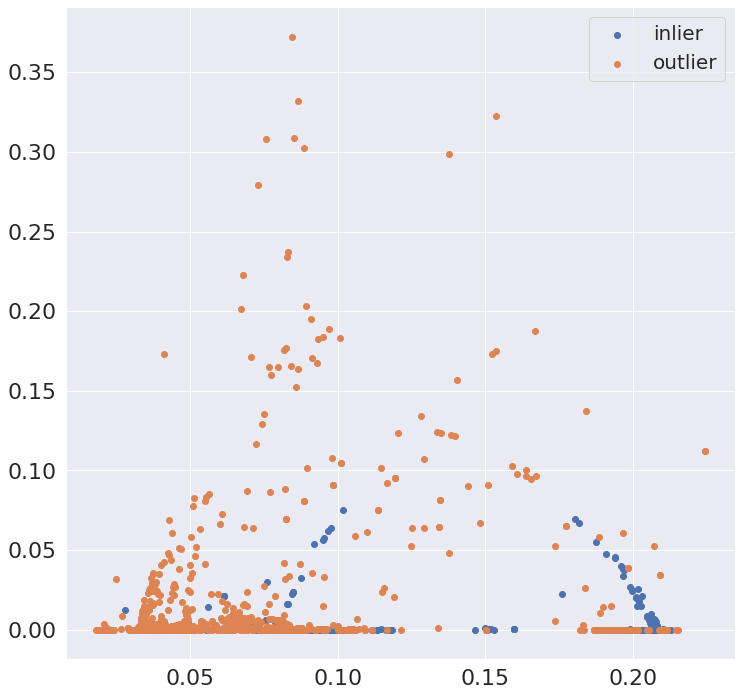

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.941     0.998     0.969      5859
           2      0.998     0.938     0.967      5859

    accuracy                          0.968     11718
   macro avg      0.969     0.968     0.968     11718
weighted avg      0.969     0.968     0.968     11718



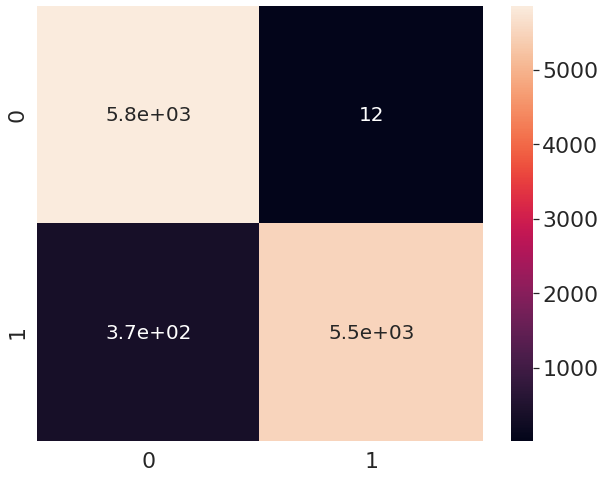

AUC score:  0.9677419354838709


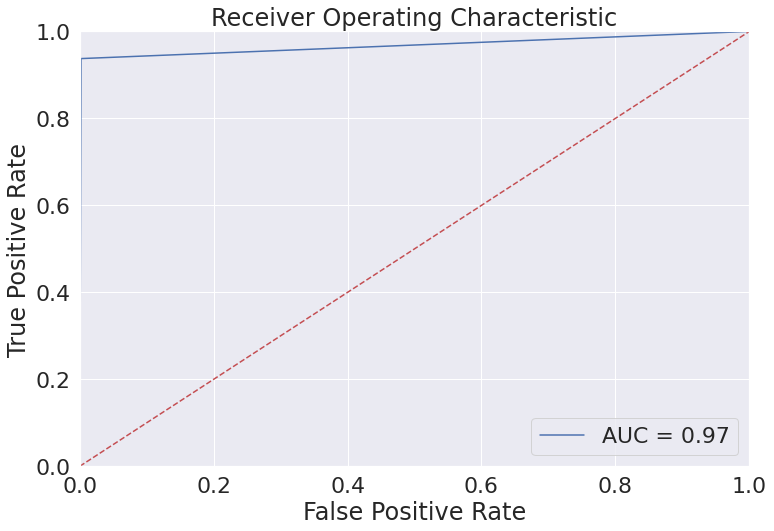

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [72]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.02310379 0.01159449 0.02107787 ... 1.11669865 0.56240253 0.42889547]
Visualize quantization error


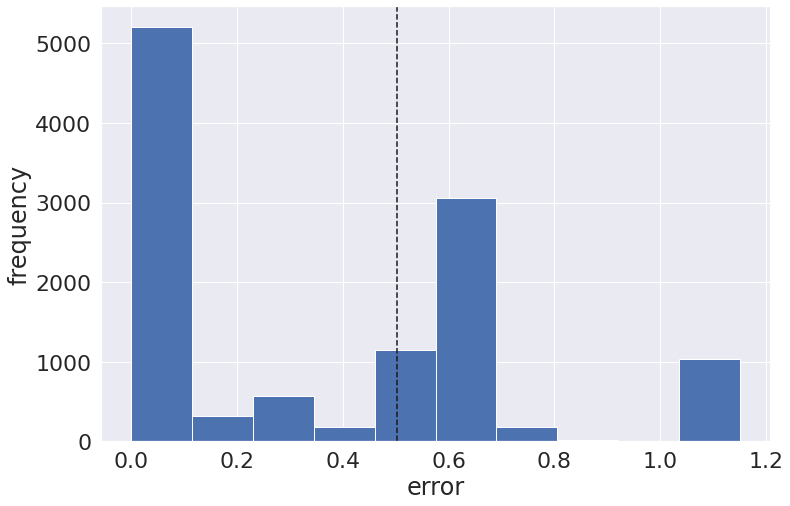

Outliers visualization


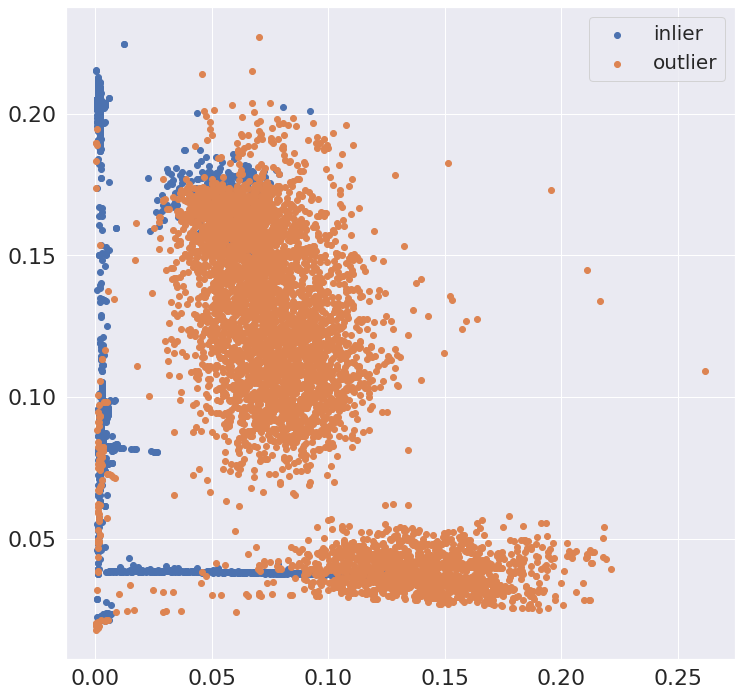

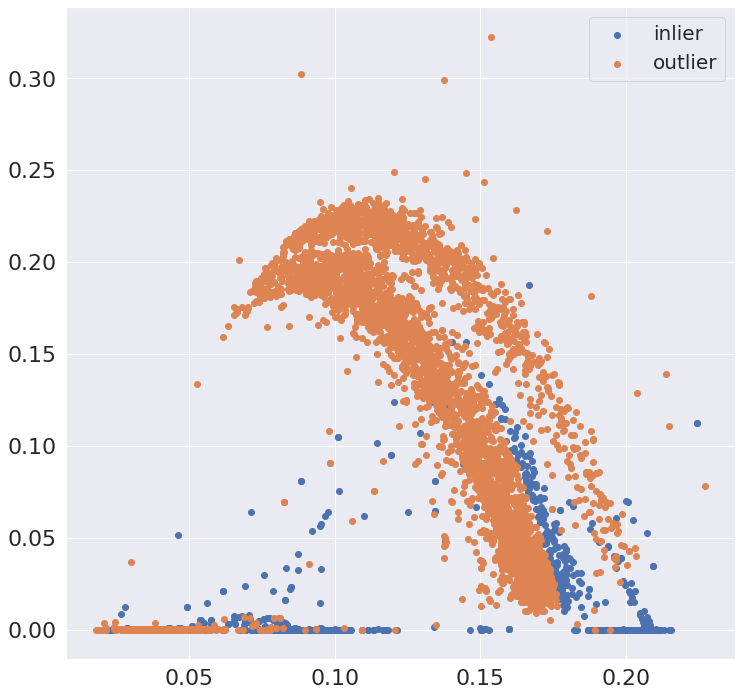

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.998     0.998      5859
           2      0.998     0.997     0.998      5859

    accuracy                          0.998     11718
   macro avg      0.998     0.998     0.998     11718
weighted avg      0.998     0.998     0.998     11718



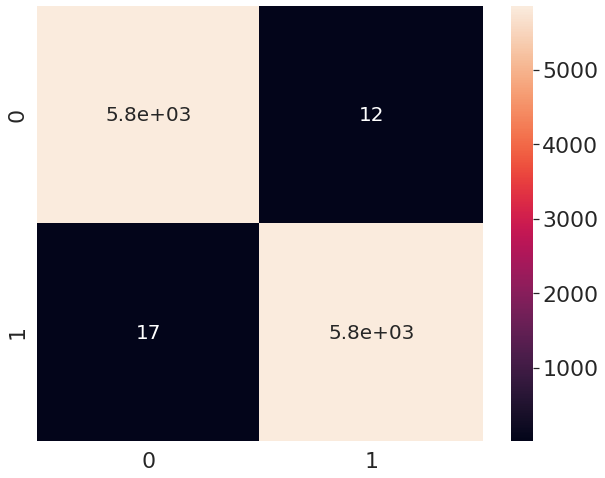

AUC score:  0.9975251749445299


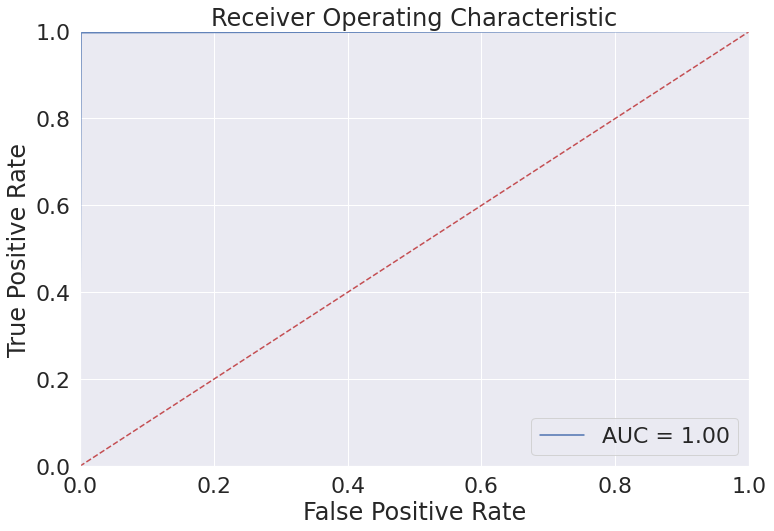

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)


### 1) Algo tpe

### Train

In [74]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 5.14693625e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.90054386e-33  3.69407619e-17]
 [ 2.57355758e-03  8.95522622e-02  6.61641031e-08 ...  2.83924740e-18
   2.02516474e-34  2.13948580e-17]
 [ 2.57355743e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.80506408e-35 -4.13274774e-19]
 ...
 [ 3.72381963e-03  2.02477295e-01  3.15143034e-02 ...  1.32880537e-01
  -4.40647872e-02 -2.93787242e-01]
 [ 5.14440498e-03  4.92537313e-01  2.28092929e-16 ...  7.15314266e-17
  -5.51517196e-21 -2.57815734e-05]
 [ 2.57355763e-03  8.95522695e-02  8.67513334e-08 ...  2.00067898e-18
  -1.24071358e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09515353 0.01821431 0.01632538 ... 1.19417545 1.18506242 1.18506242]
Visualize quantization error


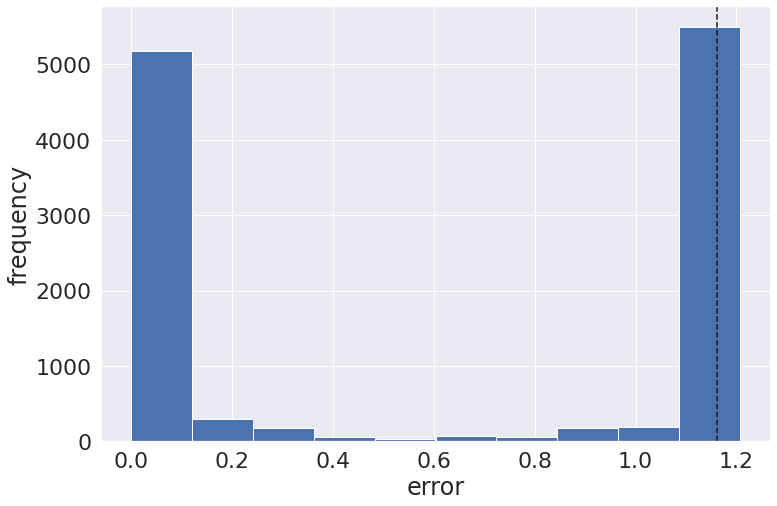

Outliers visualization


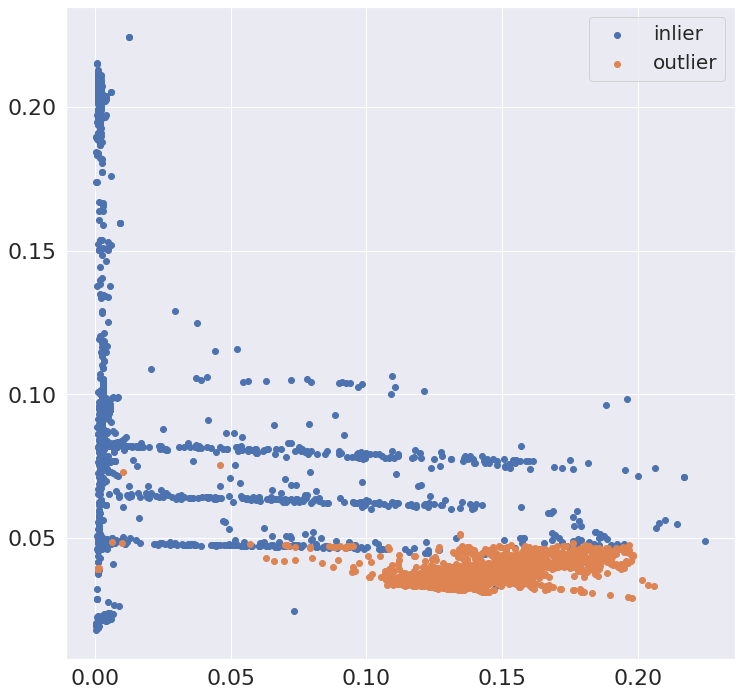

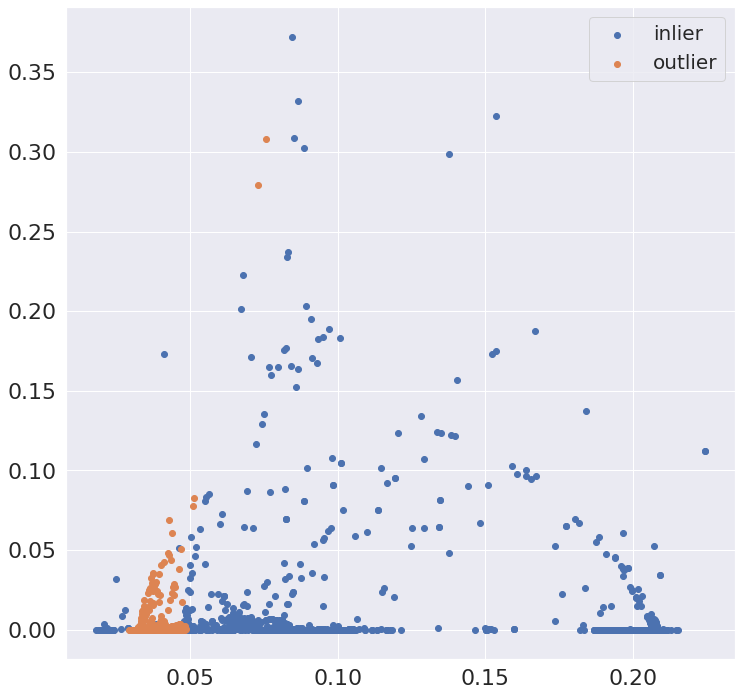

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.922     0.988     0.954      5859
           2      0.987     0.917     0.950      5859

    accuracy                          0.952     11718
   macro avg      0.955     0.952     0.952     11718
weighted avg      0.955     0.952     0.952     11718



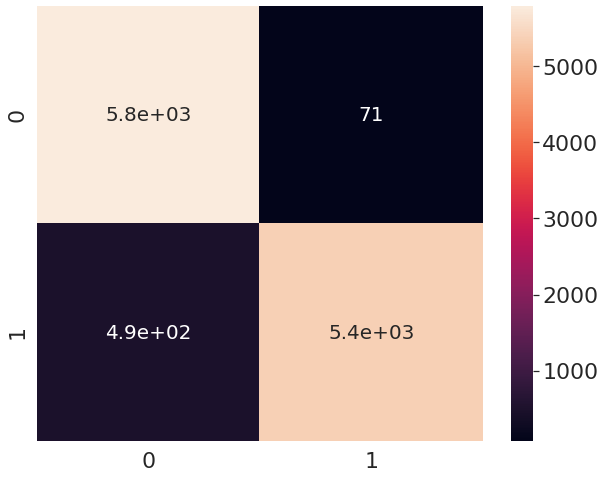

AUC score:  0.95221027479092


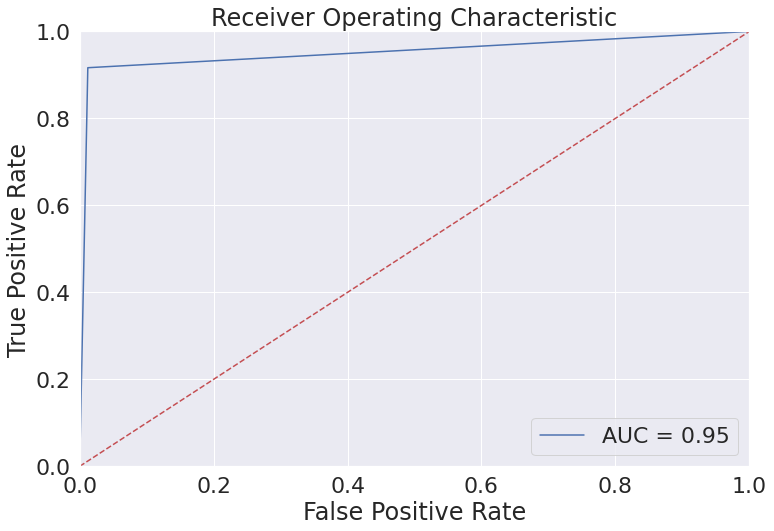

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [75]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09515353 0.01821431 0.01632538 ... 1.17568925 0.58575726 0.44509797]
Visualize quantization error


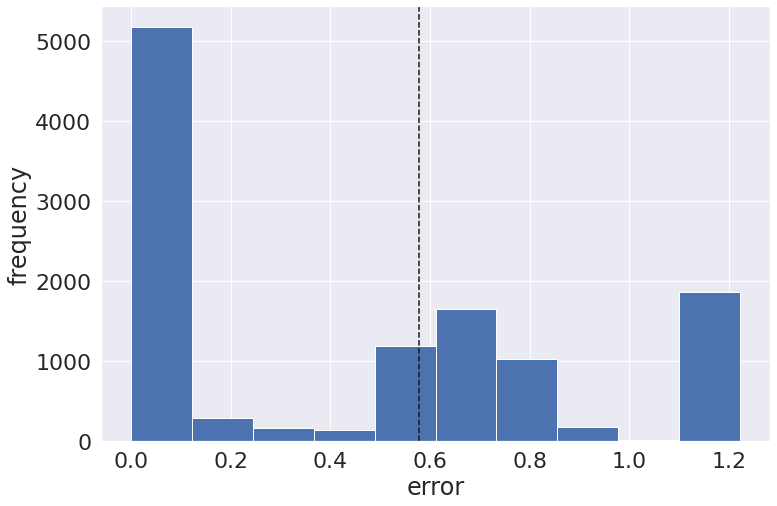

Outliers visualization


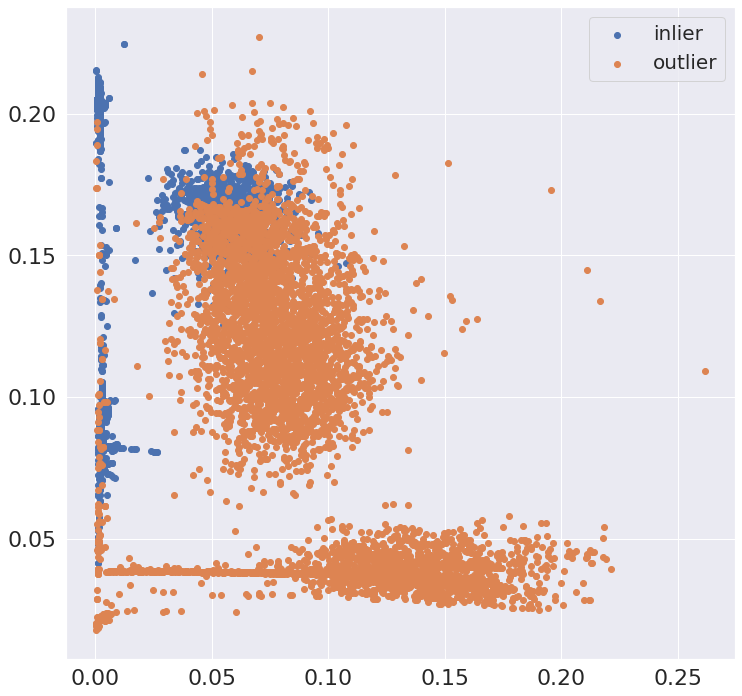

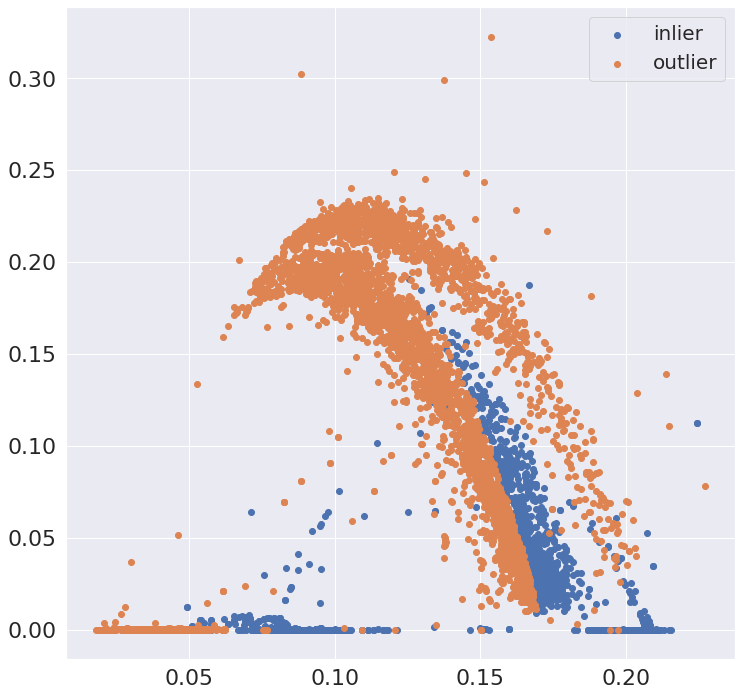

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.988     0.993      5859
           2      0.988     0.998     0.993      5859

    accuracy                          0.993     11718
   macro avg      0.993     0.993     0.993     11718
weighted avg      0.993     0.993     0.993     11718



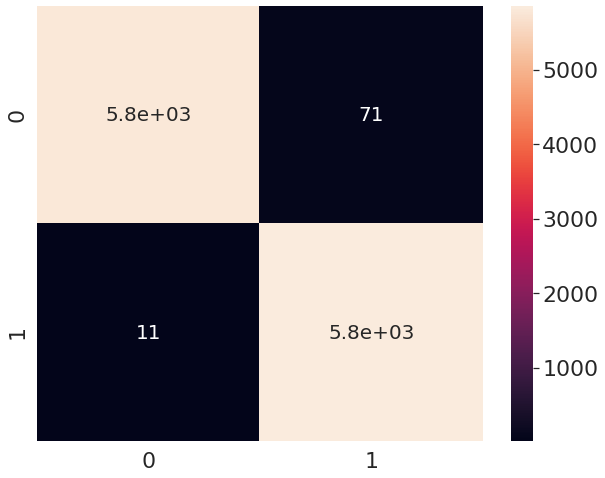

AUC score:  0.9930022188086703


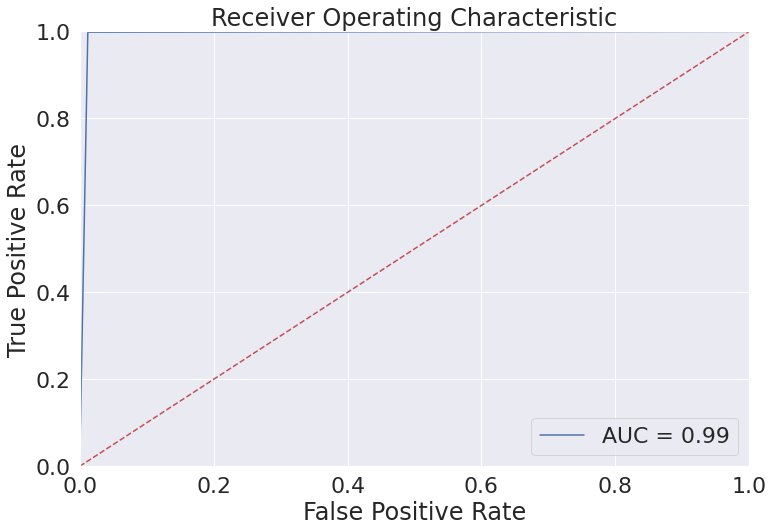

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Algo rand

### Train

In [77]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 5.14693625e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.90054386e-33  3.69407619e-17]
 [ 2.57355758e-03  8.95522622e-02  6.61641031e-08 ...  2.83924740e-18
   2.02516474e-34  2.13948580e-17]
 [ 2.57355743e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.80506408e-35 -4.13274774e-19]
 ...
 [ 3.72381963e-03  2.02477295e-01  3.15143034e-02 ...  1.32880537e-01
  -4.40647872e-02 -2.93787242e-01]
 [ 5.14440498e-03  4.92537313e-01  2.28092929e-16 ...  7.15314266e-17
  -5.51517196e-21 -2.57815734e-05]
 [ 2.57355763e-03  8.95522695e-02  8.67513334e-08 ...  2.00067898e-18
  -1.24071358e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test Gafgyt

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.46249207 0.03039937 0.01566551 ... 1.1686346  0.91032651 0.91032652]
Visualize quantization error


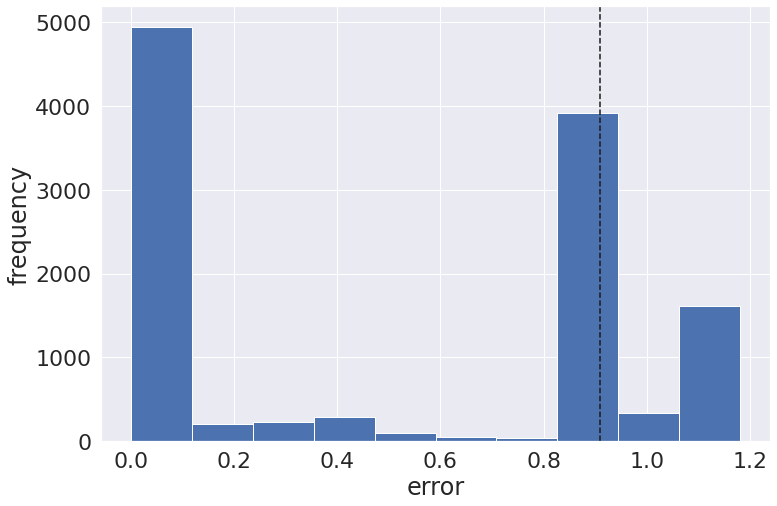

Outliers visualization


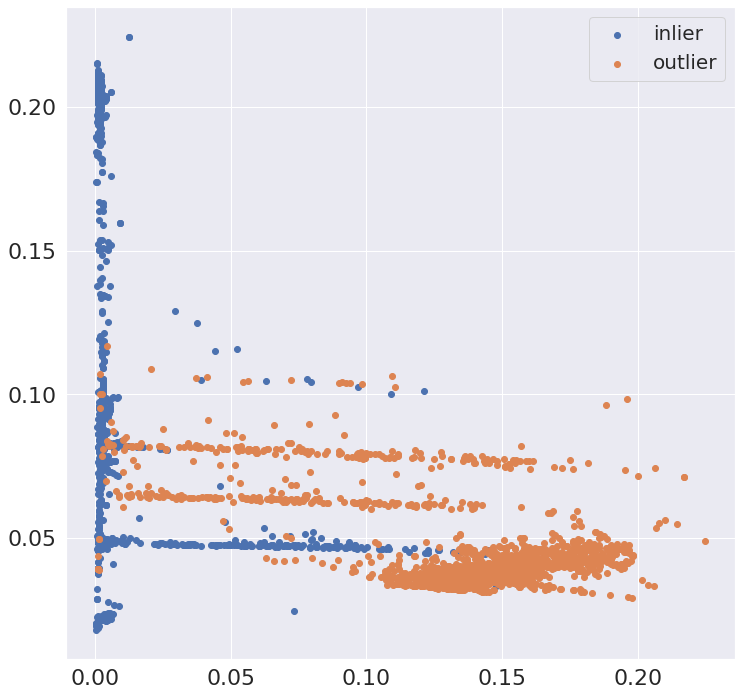

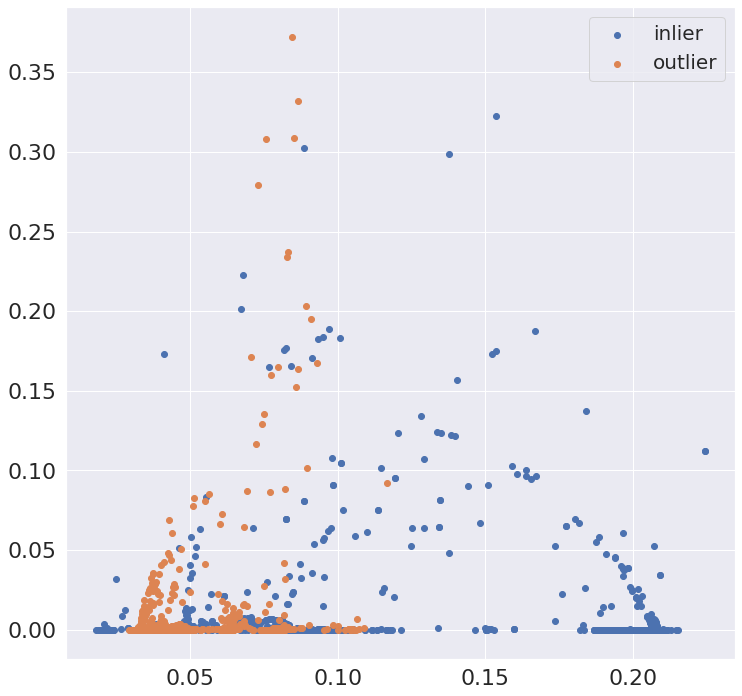

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.963     0.995     0.979      5859
           2      0.995     0.962     0.978      5859

    accuracy                          0.979     11718
   macro avg      0.979     0.979     0.979     11718
weighted avg      0.979     0.979     0.979     11718



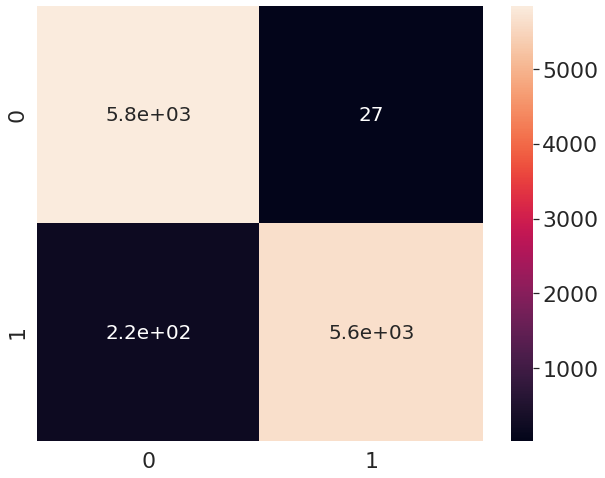

AUC score:  0.9788359788359788


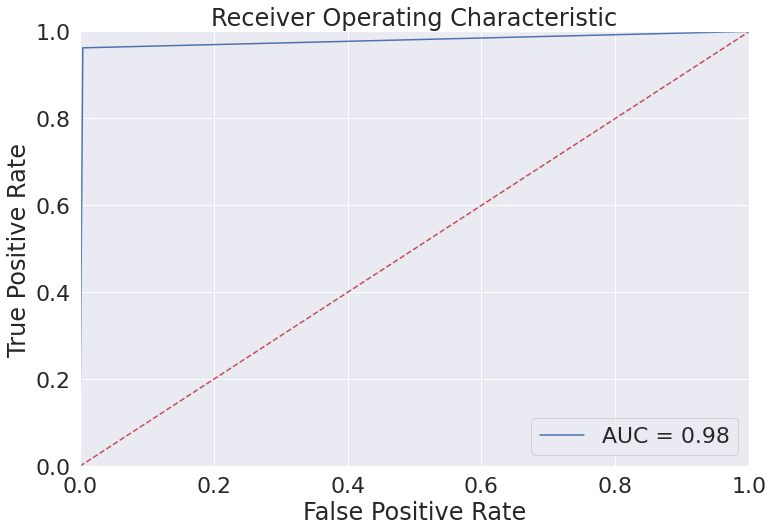

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [78]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### Test Mirai

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.46249207 0.03039937 0.01566551 ... 1.14870817 0.56499597 0.41973638]
Visualize quantization error


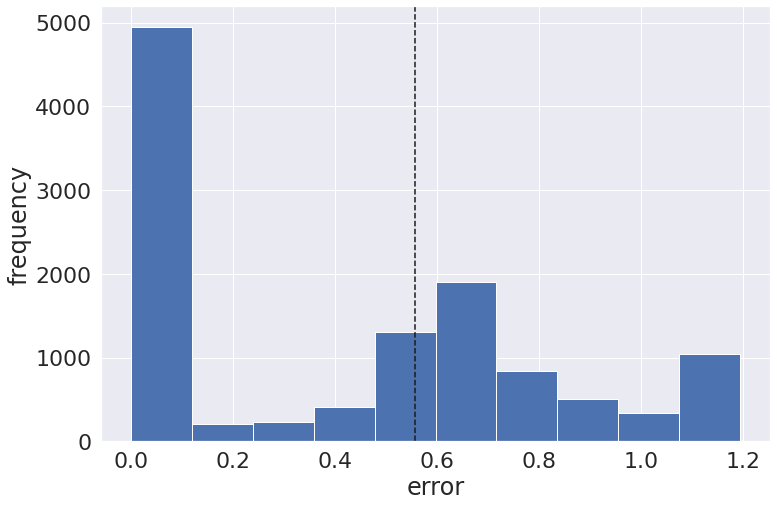

Outliers visualization


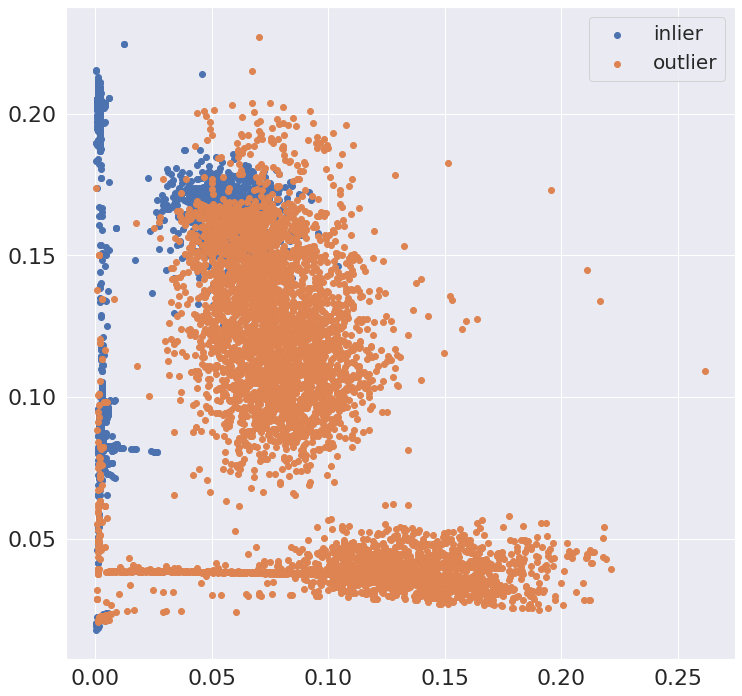

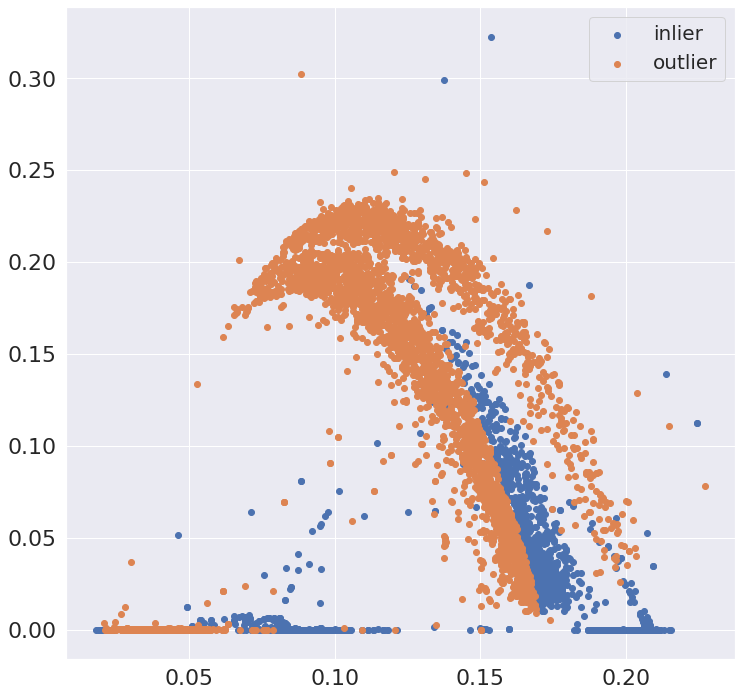

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.995     0.996      5859
           2      0.995     0.997     0.996      5859

    accuracy                          0.996     11718
   macro avg      0.996     0.996     0.996     11718
weighted avg      0.996     0.996     0.996     11718



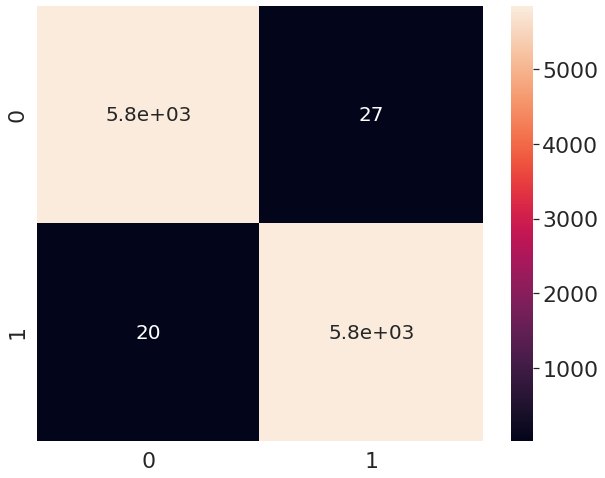

AUC score:  0.9959890766342379


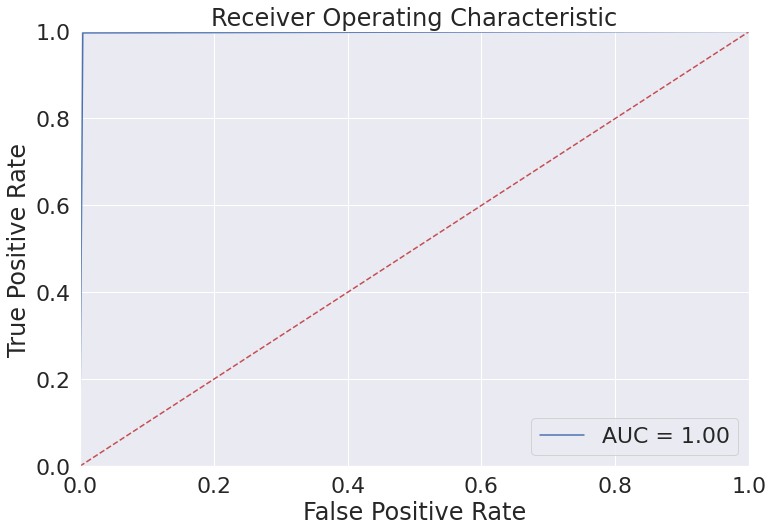

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [79]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Algo atpe

In [80]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 5.14693625e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.90054386e-33  3.69407619e-17]
 [ 2.57355758e-03  8.95522622e-02  6.61641031e-08 ...  2.83924740e-18
   2.02516474e-34  2.13948580e-17]
 [ 2.57355743e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.80506408e-35 -4.13274774e-19]
 ...
 [ 3.72381963e-03  2.02477295e-01  3.15143034e-02 ...  1.32880537e-01
  -4.40647872e-02 -2.93787242e-01]
 [ 5.14440498e-03  4.92537313e-01  2.28092929e-16 ...  7.15314266e-17
  -5.51517196e-21 -2.57815734e-05]
 [ 2.57355763e-03  8.95522695e-02  8.67513334e-08 ...  2.00067898e-18
  -1.24071358e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.01974135 0.01024663 0.01658484 ... 1.15309838 0.30353325 0.30353325]
Visualize quantization error


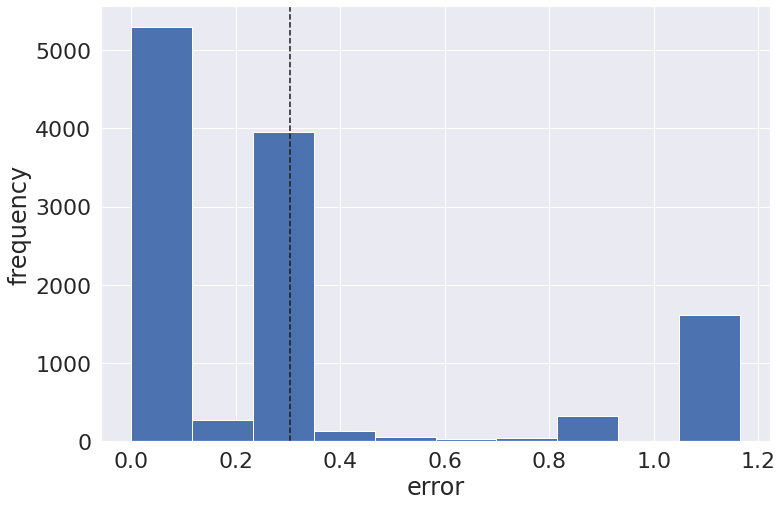

Outliers visualization


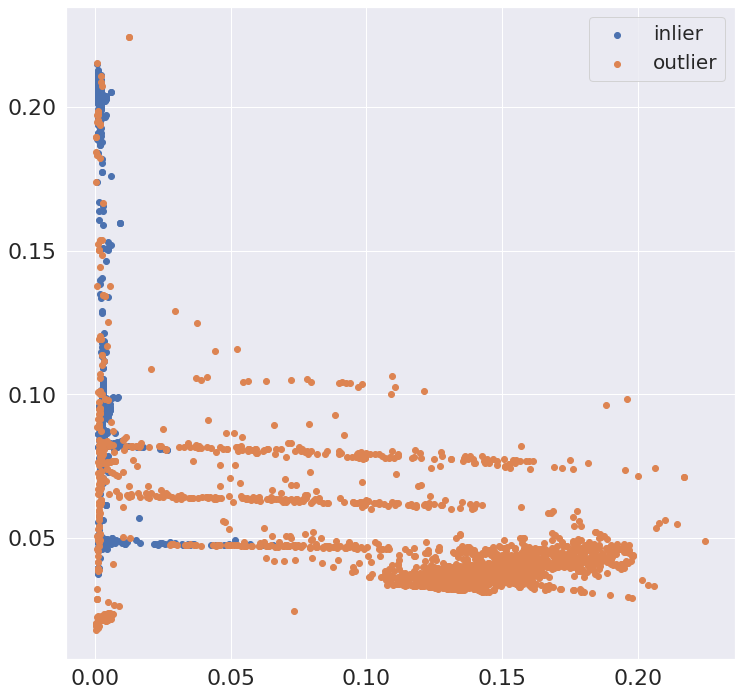

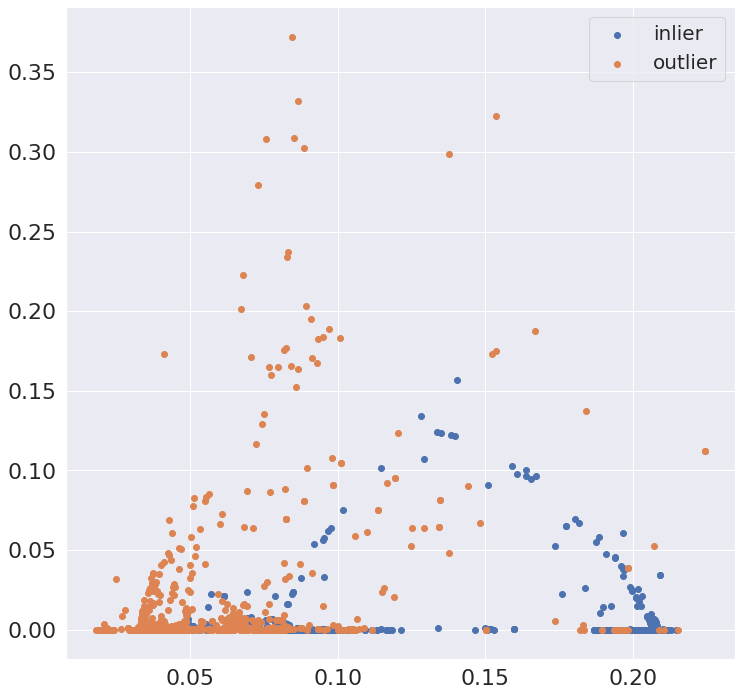

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.940     0.995     0.967      5859
           2      0.995     0.937     0.965      5859

    accuracy                          0.966     11718
   macro avg      0.968     0.966     0.966     11718
weighted avg      0.968     0.966     0.966     11718



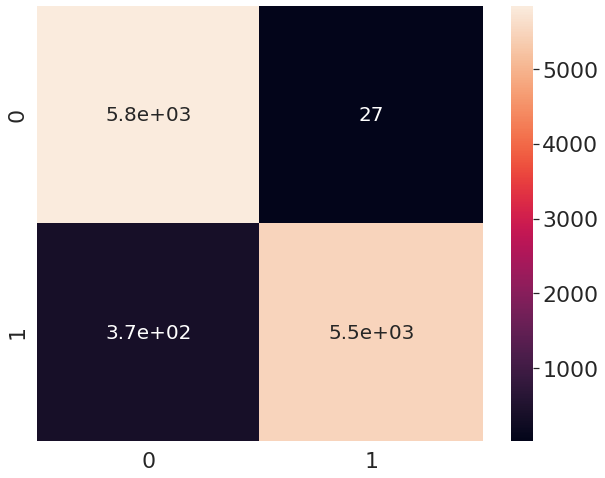

AUC score:  0.966205837173579


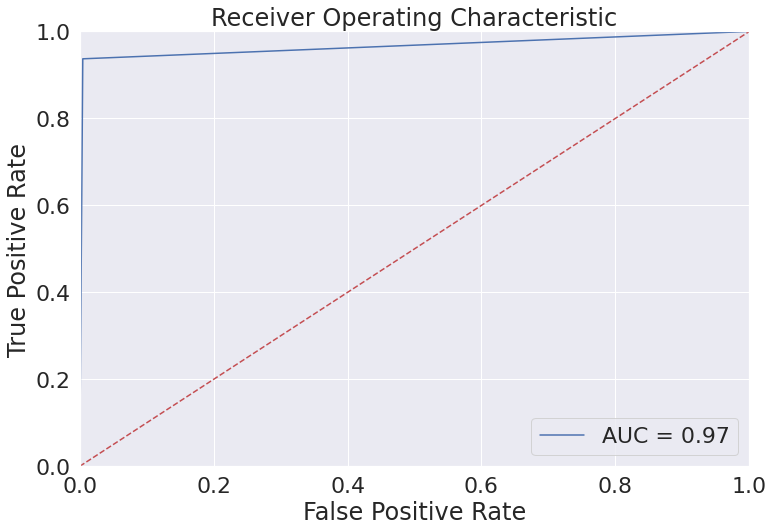

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [81]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.01974135 0.01024663 0.01658484 ... 1.13321044 0.48767569 0.39429953]
Visualize quantization error


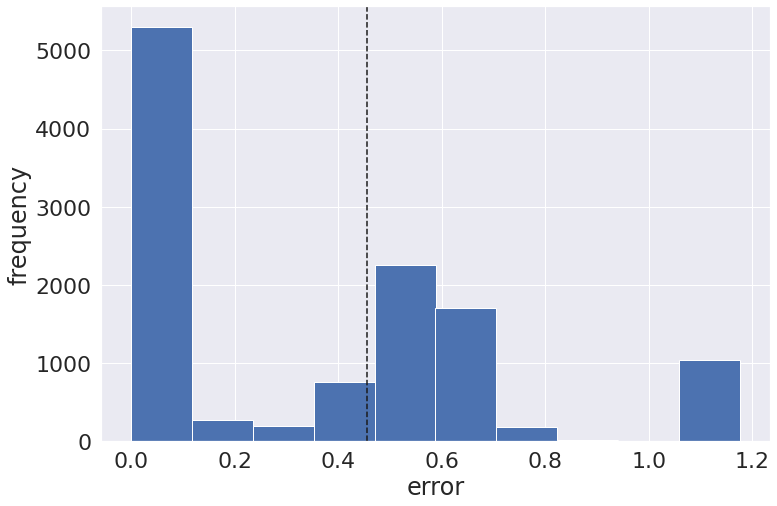

Outliers visualization


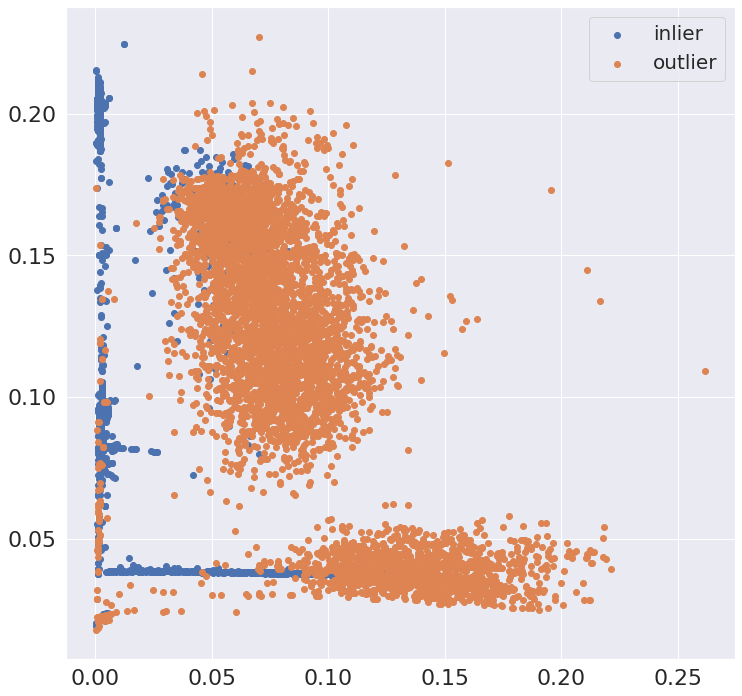

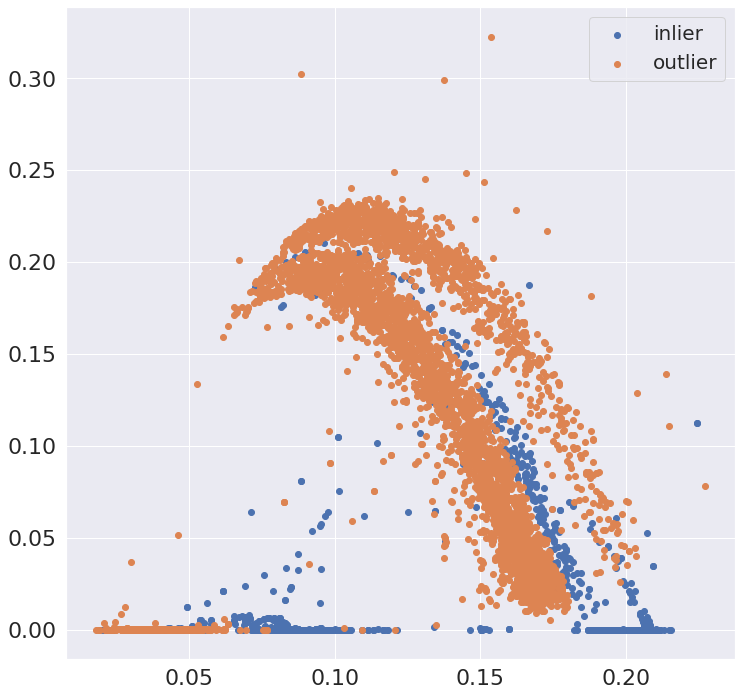

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.995     0.996      5859
           2      0.995     0.997     0.996      5859

    accuracy                          0.996     11718
   macro avg      0.996     0.996     0.996     11718
weighted avg      0.996     0.996     0.996     11718



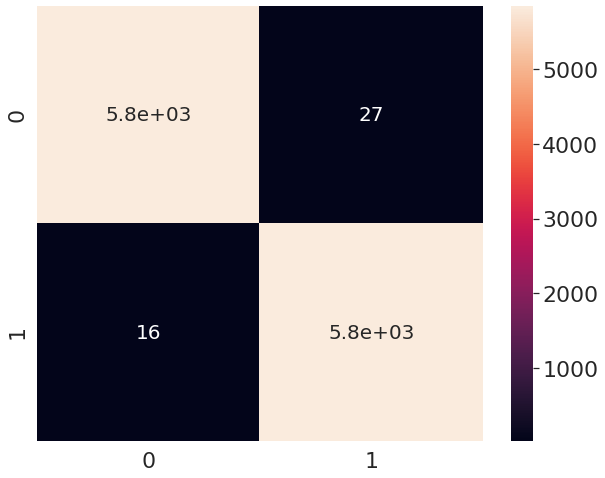

AUC score:  0.9963304318143029


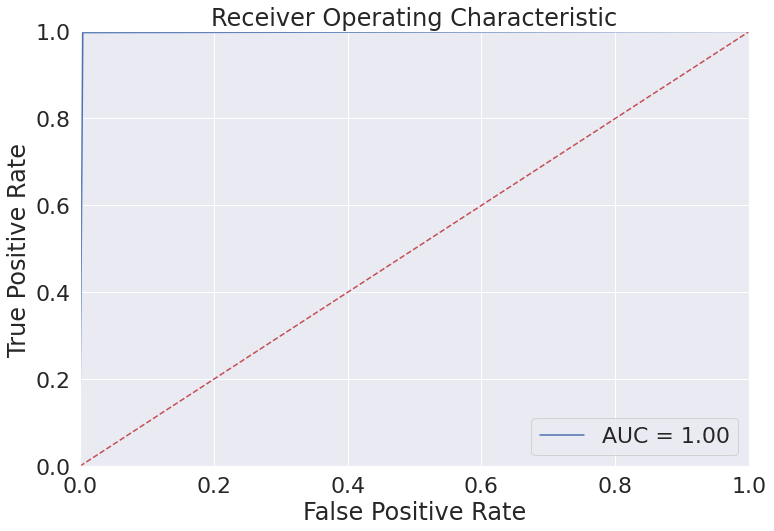

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [82]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Algo anneal

In [83]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 5.14693625e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
   7.90054386e-33  3.69407619e-17]
 [ 2.57355758e-03  8.95522622e-02  6.61641031e-08 ...  2.83924740e-18
   2.02516474e-34  2.13948580e-17]
 [ 2.57355743e-03  4.92537313e-01  0.00000000e+00 ...  7.15314266e-17
  -8.80506408e-35 -4.13274774e-19]
 ...
 [ 3.72381963e-03  2.02477295e-01  3.15143034e-02 ...  1.32880537e-01
  -4.40647872e-02 -2.93787242e-01]
 [ 5.14440498e-03  4.92537313e-01  2.28092929e-16 ...  7.15314266e-17
  -5.51517196e-21 -2.57815734e-05]
 [ 2.57355763e-03  8.95522695e-02  8.67513334e-08 ...  2.00067898e-18
  -1.24071358e-33  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.04053371 0.01371132 0.03174842 ... 1.1328028  0.39135837 0.39135838]
Visualize quantization error


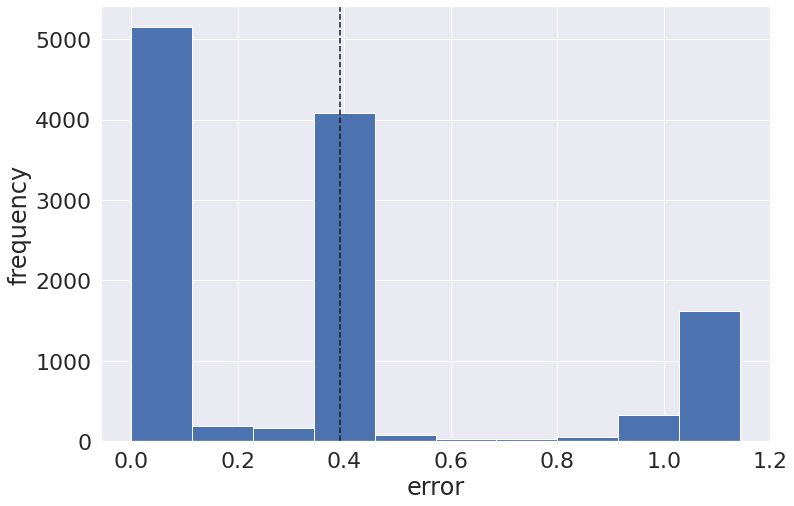

Outliers visualization


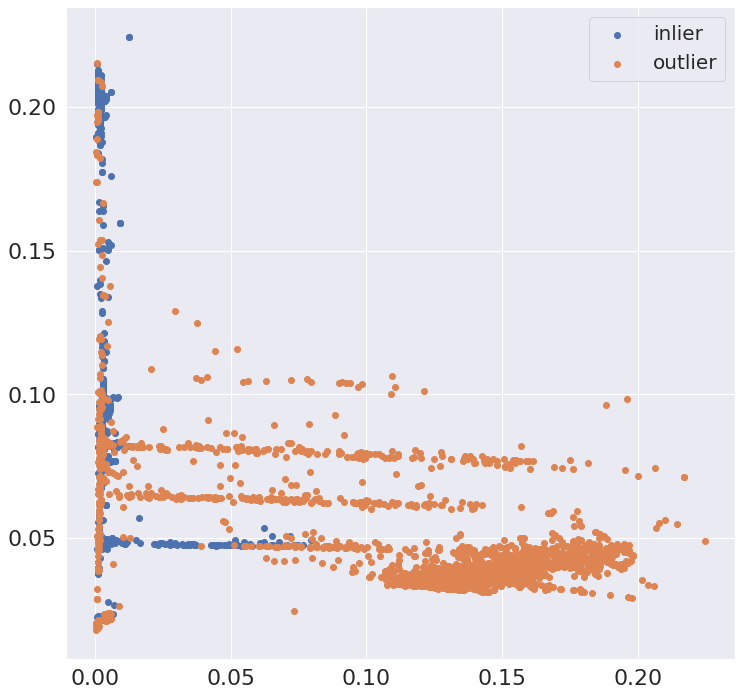

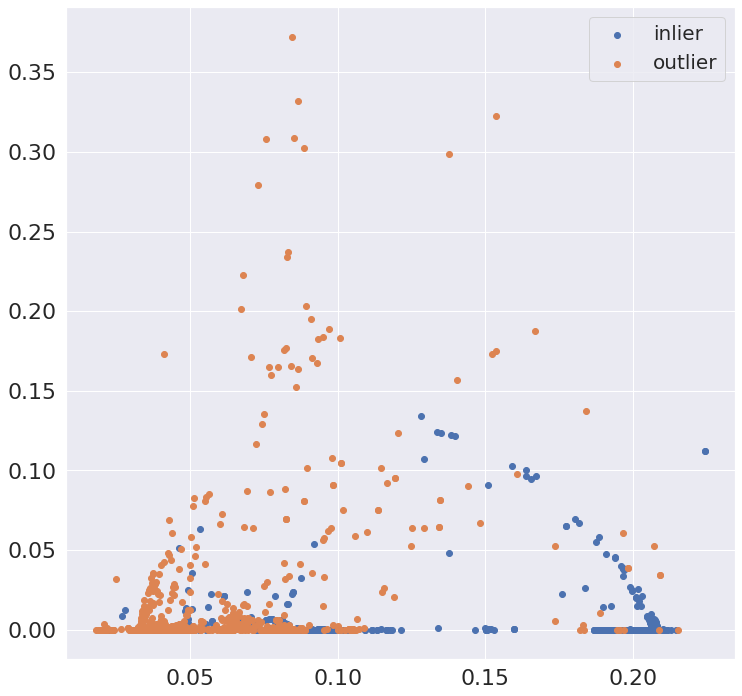

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.941     0.997     0.968      5859
           2      0.997     0.938     0.966      5859

    accuracy                          0.967     11718
   macro avg      0.969     0.967     0.967     11718
weighted avg      0.969     0.967     0.967     11718



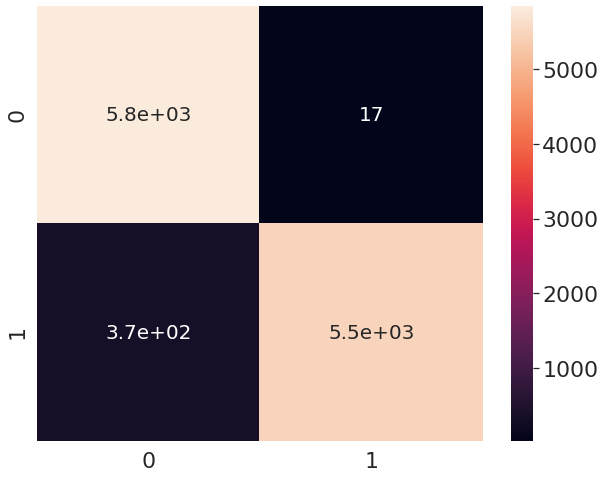

AUC score:  0.96731524150879


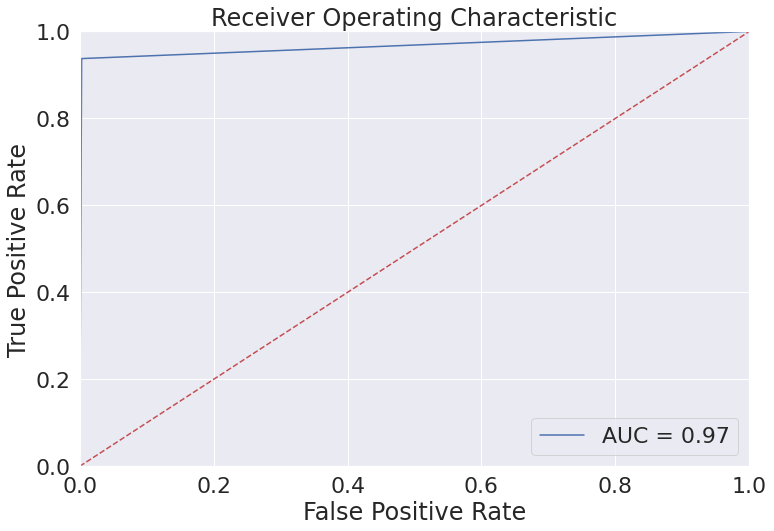

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [84]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (11718, 115) (11718,)
----------------------Test is starting----------------------
Scale data
Shape:  (11718, 115) (11718,)
Shape:  (11718, 115) (11718,)
Normalize data
Shape:  (11718, 115) (11718,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.04053371 0.01371132 0.03174842 ... 1.11781741 0.58130919 0.45315781]
Visualize quantization error


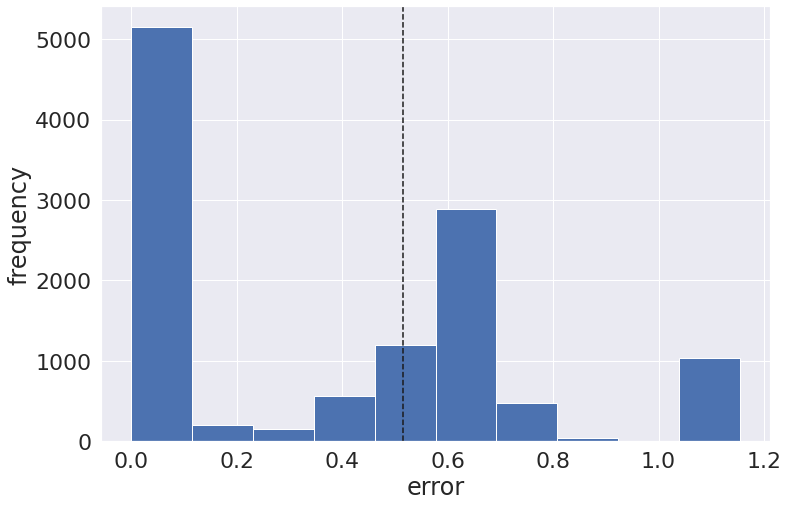

Outliers visualization


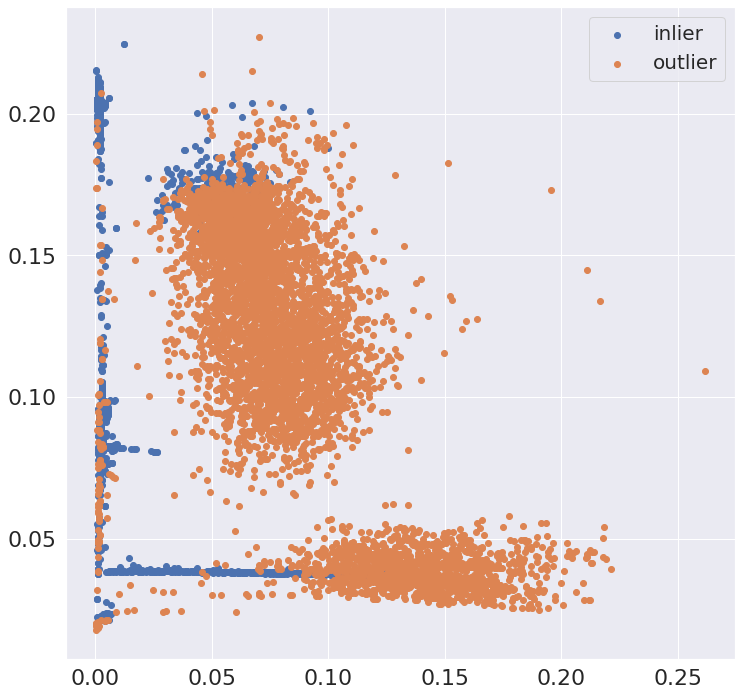

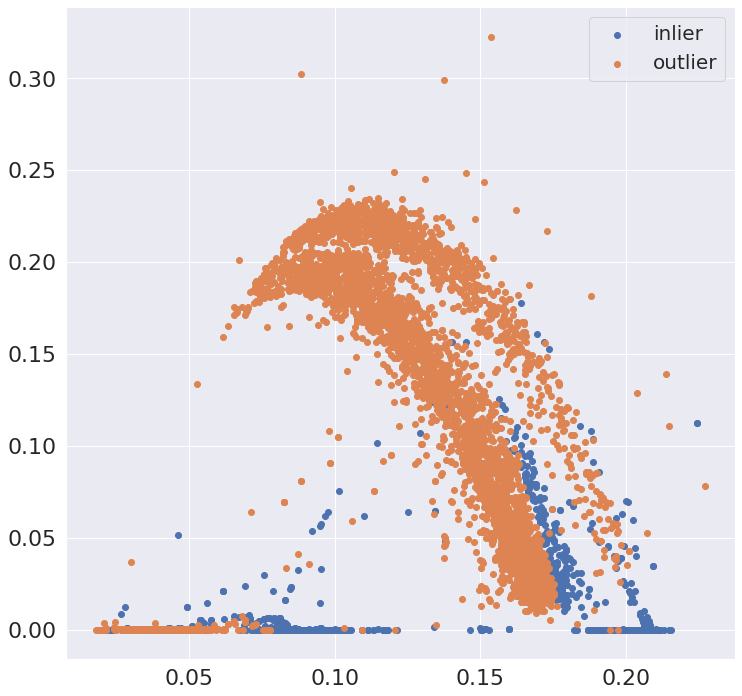

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.995     0.997     0.996      5859
           2      0.997     0.995     0.996      5859

    accuracy                          0.996     11718
   macro avg      0.996     0.996     0.996     11718
weighted avg      0.996     0.996     0.996     11718



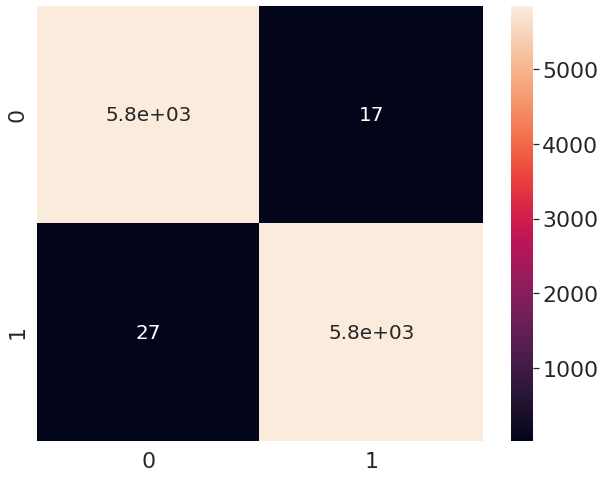

AUC score:  0.9962450930192868


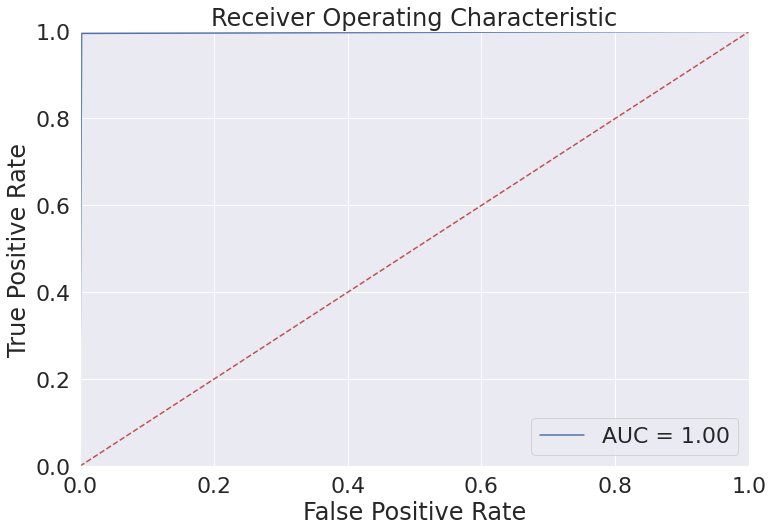

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [85]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

